In [228]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

# IMPORTS

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [230]:
import plotly as py
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# DATA LOADING

In [231]:
data = pd.read_excel('/content/drive/MyDrive/Final_Project_Dataset/cust_data.xlsx')
data.head()

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5    NaN      10       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
0                       0         0     2     0       0    0            0   
1                       0         0     0     0       0    1            0   
2                       0         0     0     0       0    0            0   
3                       0         0     0     0       0    1            0   
4                       0         0     0     0       0    0            1   

   Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  Pop Chips  \
0      0                0       0      0        0             0          0   
1      0                0       0      0        0             2          2   
2      0                0       0      2        0             1          0   
3      0                0       0      0        0             0          1   
4      0                0       5      1        0             3          0   

   Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  Scabal  \
0        0       0       0    0         0   0   0     0       0   
1        1       0       0    0         6   4   0     1       0   
2        0       0       0    0         0   0   0     0       0   
3        0       0       0    0         0   0   0     0       0   
4        1       0       0    0         1   0   0     0       2   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0               0          0           0         0          0          0   
1               0          0           0         0          0          0   
2               0          0           0         0          1          0   
3               0          0           0         0          0          0   
4               0          0           0         0          0          1   

   Kraft  
0      0  
1      0  
2      0  
3      0  
4      1

In [232]:
df = data.copy()

In [233]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [234]:
df.head()

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5    NaN      10       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
0                       0         0     2     0       0    0            0   
1                       0         0     0     0       0    1            0   
2                       0         0     0     0       0    0            0   
3                       0         0     0     0       0    1            0   
4                       0         0     0     0       0    0            1   

   Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  Pop Chips  \
0      0                0       0      0        0             0          0   
1      0                0       0      0        0             2          2   
2      0                0       0      2        0             1          0   
3      0                0       0      0        0             0          1   
4      0                0       5      1        0             3          0   

   Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  Scabal  \
0        0       0       0    0         0   0   0     0       0   
1        1       0       0    0         6   4   0     1       0   
2        0       0       0    0         0   0   0     0       0   
3        0       0       0    0         0   0   0     0       0   
4        1       0       0    0         1   0   0     0       2   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0               0          0           0         0          0          0   
1               0          0           0         0          0          0   
2               0          0           0         0          1          0   
3               0          0           0         0          0          0   
4               0          0           0         0          0          1   

   Kraft  
0      0  
1      0  
2      0  
3      0  
4      1

In [235]:
df.tail()

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
29995    29996      M       0       0         0        0     0     0   
29996    29997      M       1       0         1        0     0     0   
29997    29998      M       0       0         1        0     0     0   
29998    29999      M       0       0         0        0     0     0   
29999    30000      F       3       2         0        0     1     0   

       Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
29995                       0         0     0     0       1    0            0   
29996                       0         0     0     0       0    0            0   
29997                       0         0     1     0       0    0            0   
29998                       0         0     0     0       0    0            0   
29999                       0         0     0     0       0    0            0   

       Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
29995      0                0       0      0        0             0   
29996      0                0       0      0        0             0   
29997      0                0       0      0        0             0   
29998      0                0       0      0        0             0   
29999      0                0       0      0        0             2   

       Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  \
29995          0        0       0       0    0         0   0   0     0   
29996          0        0       0       0    0         0   0   0     0   
29997          0        0       0       0    0         0   0   0     0   
29998          1        0       0       0    0         0   0   0     0   
29999          0        0       0       0    0         0   0   0     0   

       Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
29995       0               0          0           0         0          0   
29996       0               0          0           0         0          0   
29997       0               0          0           0         0          0   
29998       0               0          0           0         0          0   
29999       0               0          0           0         0          0   

       Jiffy mix  Kraft  
29995          0      0  
29996          0      0  
29997          0      0  
29998          0      0  
29999          0      0

# EDA

In [236]:
df.shape

(30000, 38)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [238]:
df.isnull().sum()

Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy Hilfiger               0
Holliste

In [239]:
df.nunique()

Cust_ID                   30000
Gender                        2
Orders                       13
Jordan                       16
Gatorade                     13
Samsung                      20
Asus                         17
Udis                         13
Mondelez International       13
Wrangler                     10
Vans                         16
Fila                         15
Brooks                       10
H&M                          16
Dairy Queen                  24
Fendi                        14
Hewlett Packard              10
Pladis                       11
Asics                        25
Siemens                      11
J.M. Smucker                 27
Pop Chips                    17
Juniper                      29
Huawei                       16
Compaq                       19
IBM                           9
Burberry                     21
Mi                            9
LG                           13
Dior                         12
Scabal                       11
Tommy Hi

In [240]:
df.describe()

Cust_ID        Orders        Jordan      Gatorade       Samsung  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000      4.169800      0.267433      0.252333      0.222933   
std     8660.398374      3.590311      0.804778      0.705368      0.917494   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%     7500.750000      1.000000      0.000000      0.000000      0.000000   
50%    15000.500000      4.000000      0.000000      0.000000      0.000000   
75%    22500.250000      7.000000      0.000000      0.000000      0.000000   
max    30000.000000     12.000000     24.000000     15.000000     27.000000   

               Asus          Udis  Mondelez International      Wrangler  \
count  30000.000000  30000.000000            30000.000000  30000.000000   
mean       0.161333      0.143533                0.139767      0.106933   
std        0.740038      0.641258                0.525840      0.515921   
min        0.000000      0.000000                0.000000      0.000000   
25%        0.000000      0.000000                0.000000      0.000000   
50%        0.000000      0.000000                0.000000      0.000000   
75%        0.000000      0.000000                0.000000      0.000000   
max       17.000000     14.000000               31.000000      9.000000   

               Vans          Fila        Brooks           H&M   Dairy Queen  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.111433      0.094267      0.140133      0.328200      0.209333   
std        0.547990      0.531592      0.471278      0.807655      1.116820   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     15.000000     12.000000     18.000000    114.000000   

              Fendi  Hewlett Packard        Pladis         Asics  \
count  30000.000000     30000.000000  30000.000000  30000.000000   
mean       0.141467         0.161100      0.106100      0.300233   
std        0.529210         0.604835      0.516512      1.119167   
min        0.000000         0.000000      0.000000      0.000000   
25%        0.000000         0.000000      0.000000      0.000000   
50%        0.000000         0.000000      0.000000      0.000000   
75%        0.000000         0.000000      0.000000      0.000000   
max       18.000000        10.000000     26.000000     66.000000   

            Siemens  J.M. Smucker     Pop Chips       Juniper        Huawei  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.048067      0.754800      0.247900      0.470833      0.258000   
std        0.338763      1.262166      0.724106      1.346159      0.848288   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      0.000000      1.000000      0.000000   
max       11.000000     64.000000     21.000000     79.000000     44.000000   

             Compaq           IBM      Burberry            Mi            LG  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean       0.118767      0.031967      0.428033      0.121333      0.102533   
std        0.597612      0.264475      1.098876      0.478977      0.486376   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000 

In [241]:
dups = df.duplicated()
sum(dups)

0

The code snippet dups = df.duplicated() checks for duplicate rows in the DataFrame df and assigns a boolean Series to the variable dups. The sum of dups using sum(dups) gives the count of duplicate rows in the DataFrame.

# HANDLING MISSING VALUES

In [242]:
df1 = df.copy()


In [243]:
df1['Gender'].isnull().sum()

2724

In [244]:
df1['Gender'] = df1['Gender'].fillna(df1['Gender'].mode()[0])

In [245]:
df1['Gender'].isnull().sum()

0

In [246]:
df1.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

In [247]:
df1.head()

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1      M       7       0         0        0     0     0   
1        2      F       0       0         1        0     0     0   
2        3      M       7       0         1        0     0     0   
3        4      F       0       0         0        0     0     0   
4        5      F      10       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
0                       0         0     2     0       0    0            0   
1                       0         0     0     0       0    1            0   
2                       0         0     0     0       0    0            0   
3                       0         0     0     0       0    1            0   
4                       0         0     0     0       0    0            1   

   Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  Pop Chips  \
0      0                0       0      0        0             0          0   
1      0                0       0      0        0             2          2   
2      0                0       0      2        0             1          0   
3      0                0       0      0        0             0          1   
4      0                0       5      1        0             3          0   

   Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  Scabal  \
0        0       0       0    0         0   0   0     0       0   
1        1       0       0    0         6   4   0     1       0   
2        0       0       0    0         0   0   0     0       0   
3        0       0       0    0         0   0   0     0       0   
4        1       0       0    0         1   0   0     0       2   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0               0          0           0         0          0          0   
1               0          0           0         0          0          0   
2               0          0           0         0          1          0   
3               0          0           0         0          0          0   
4               0          0           0         0          0          1   

   Kraft  
0      0  
1      0  
2      0  
3      0  
4      1

In [248]:
df1.tail()

Cust_ID Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
29995    29996      M       0       0         0        0     0     0   
29996    29997      M       1       0         1        0     0     0   
29997    29998      M       0       0         1        0     0     0   
29998    29999      M       0       0         0        0     0     0   
29999    30000      F       3       2         0        0     1     0   

       Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
29995                       0         0     0     0       1    0            0   
29996                       0         0     0     0       0    0            0   
29997                       0         0     1     0       0    0            0   
29998                       0         0     0     0       0    0            0   
29999                       0         0     0     0       0    0            0   

       Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
29995      0                0       0      0        0             0   
29996      0                0       0      0        0             0   
29997      0                0       0      0        0             0   
29998      0                0       0      0        0             0   
29999      0                0       0      0        0             2   

       Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  \
29995          0        0       0       0    0         0   0   0     0   
29996          0        0       0       0    0         0   0   0     0   
29997          0        0       0       0    0         0   0   0     0   
29998          1        0       0       0    0         0   0   0     0   
29999          0        0       0       0    0         0   0   0     0   

       Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
29995       0               0          0           0         0          0   
29996       0               0          0           0         0          0   
29997       0               0          0           0         0          0   
29998       0               0          0           0         0          0   
29999       0               0          0           0         0          0   

       Jiffy mix  Kraft  
29995          0      0  
29996          0      0  
29997          0      0  
29998          0      0  
29999          0      0

In [249]:
df1['Gender'].value_counts()

F    24778
M     5222
Name: Gender, dtype: int64

# ENCODING CATEGORICAL VARIABLES

In [250]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1['Gender'] = label_encoder.fit_transform(df1['Gender'])


The code snippet uses LabelEncoder from scikit-learn to encode the categorical variable 'Gender' in the DataFrame df1. It converts the 'Gender' column values to numerical labels, allowing easier handling of categorical data in machine learning algorithms.

In [251]:
df1['Gender'].unique()

array([1, 0])

In [252]:
df1['Gender'].value_counts()

0    24778
1     5222
Name: Gender, dtype: int64

In [253]:
df1.corr()

Cust_ID    Gender    Orders    Jordan  Gatorade  \
Cust_ID                 1.000000 -0.060798  0.029132  0.064277  0.021821   
Gender                 -0.060798  1.000000  0.016879  0.027470  0.127665   
Orders                  0.029132  0.016879  1.000000  0.016090  0.034310   
Jordan                  0.064277  0.027470  0.016090  1.000000  0.177254   
Gatorade                0.021821  0.127665  0.034310  0.177254  1.000000   
Samsung                 0.057206 -0.006435  0.017885  0.071258  0.063890   
Asus                    0.049191 -0.094381  0.015584  0.123731  0.046215   
Udis                    0.060677 -0.077943  0.009018  0.135673  0.058180   
Mondelez International  0.035560 -0.045117  0.008741  0.021950  0.031272   
Wrangler                0.043043 -0.087144  0.003856  0.040710  0.088166   
Vans                    0.002158  0.140070  0.006343  0.115796  0.170620   
Fila                   -0.000450  0.016825 -0.009627  0.031611  0.026350   
Brooks                  0.039574  0.058243  0.015389  0.165471  0.154345   
H&M                     0.023426 -0.143123  0.030833  0.038302  0.066794   
Dairy Queen            -0.005785 -0.019533 -0.002705  0.043857  0.055532   
Fendi                   0.044053 -0.050790  0.017077  0.030369  0.029120   
Hewlett Packard         0.048083 -0.052656  0.006867  0.008800  0.016680   
Pladis                  0.012790 -0.038306 -0.000602  0.062050  0.062749   
Asics                   0.000715  0.021538  0.022064  0.009816  0.042912   
Siemens                -0.039673  0.011677  0.007843 -0.011082  0.006296   
J.M. Smucker            0.011654 -0.014875  0.030807  0.054025  0.060775   
Pop Chips               0.046623  0.006006  0.018774  0.081462  0.087545   
Juniper                -0.015516 -0.013498 -0.002741  0.025708  0.030956   
Huawei                  0.018493 -0.028321  0.008031  0.051468  0.042281   
Compaq                 -0.009158  0.015711  0.002765  0.007495  0.008773   
IBM                    -0.026589  0.020965 -0.007647  0.001963 -0.009290   
Burberry                0.061117 -0.100819  0.015813  0.096492  0.102216   
Mi                     -0.031839 -0.072978  0.010369  0.022963  0.033103   
LG                      0.029693 -0.052857 -0.006382  0.070205  0.066443   
Dior                    0.062489 -0.074158  0.009027  0.061185  0.056571   
Scabal                  0.057356 -0.180412  0.020050  0.062582  0.045958   
Tommy Hilfiger          0.016463 -0.066491  0.003550  0.063739  0.058190   
Hollister               0.084793 -0.040492  0.001680  0.026350  0.050302   
Forever 21              0.049231 -0.047283 -0.003436  0.024710  0.031495   
Colavita                0.002061  0.000320  0.007455  0.015564  0.018279   
Microsoft              -0.005614 -0.010368  0.015307  0.015804  0.016625   
Jiffy mix              -0.019145 -0.014688  0.011268  0.021651  0.038655   
Kraft                   0.022508 -0.004587 -0.007160  0.018918  0.018553   

                         Samsung      Asus      Udis  Mondelez International  \
Cust_ID                 0.057206  0.049191  0.060677                0.035560   
Gender                 -0.006435 -0.094381 -0.077943               -0.045117   
Orders                  0.017885  0.015584  0.009018                0.008741   
Jordan                  0.071258  0.123731  0.135673                0.021950   
Gatorade                0.063890  0.046215  0.058180                0.031272   
Samsung                 1.000000  0.012274  0.028785                0.035807   
Asus                    0.012274  1.000000  0.114588                0.018120   
Udis                    0.028785  0.114588  1.000000                0.040251   
Mondelez International  0.035807  0.018120  0.040251                1.000000   
Wrangler                0.014565  0.026668  0.023128                0.021211   
Vans                    0.029155  0.046990  0.020696                0.020795   
Fila                    0.024847 -0.004766  0.021717                0.026681   
Brooks              

# DATA VISUALIZATIONS


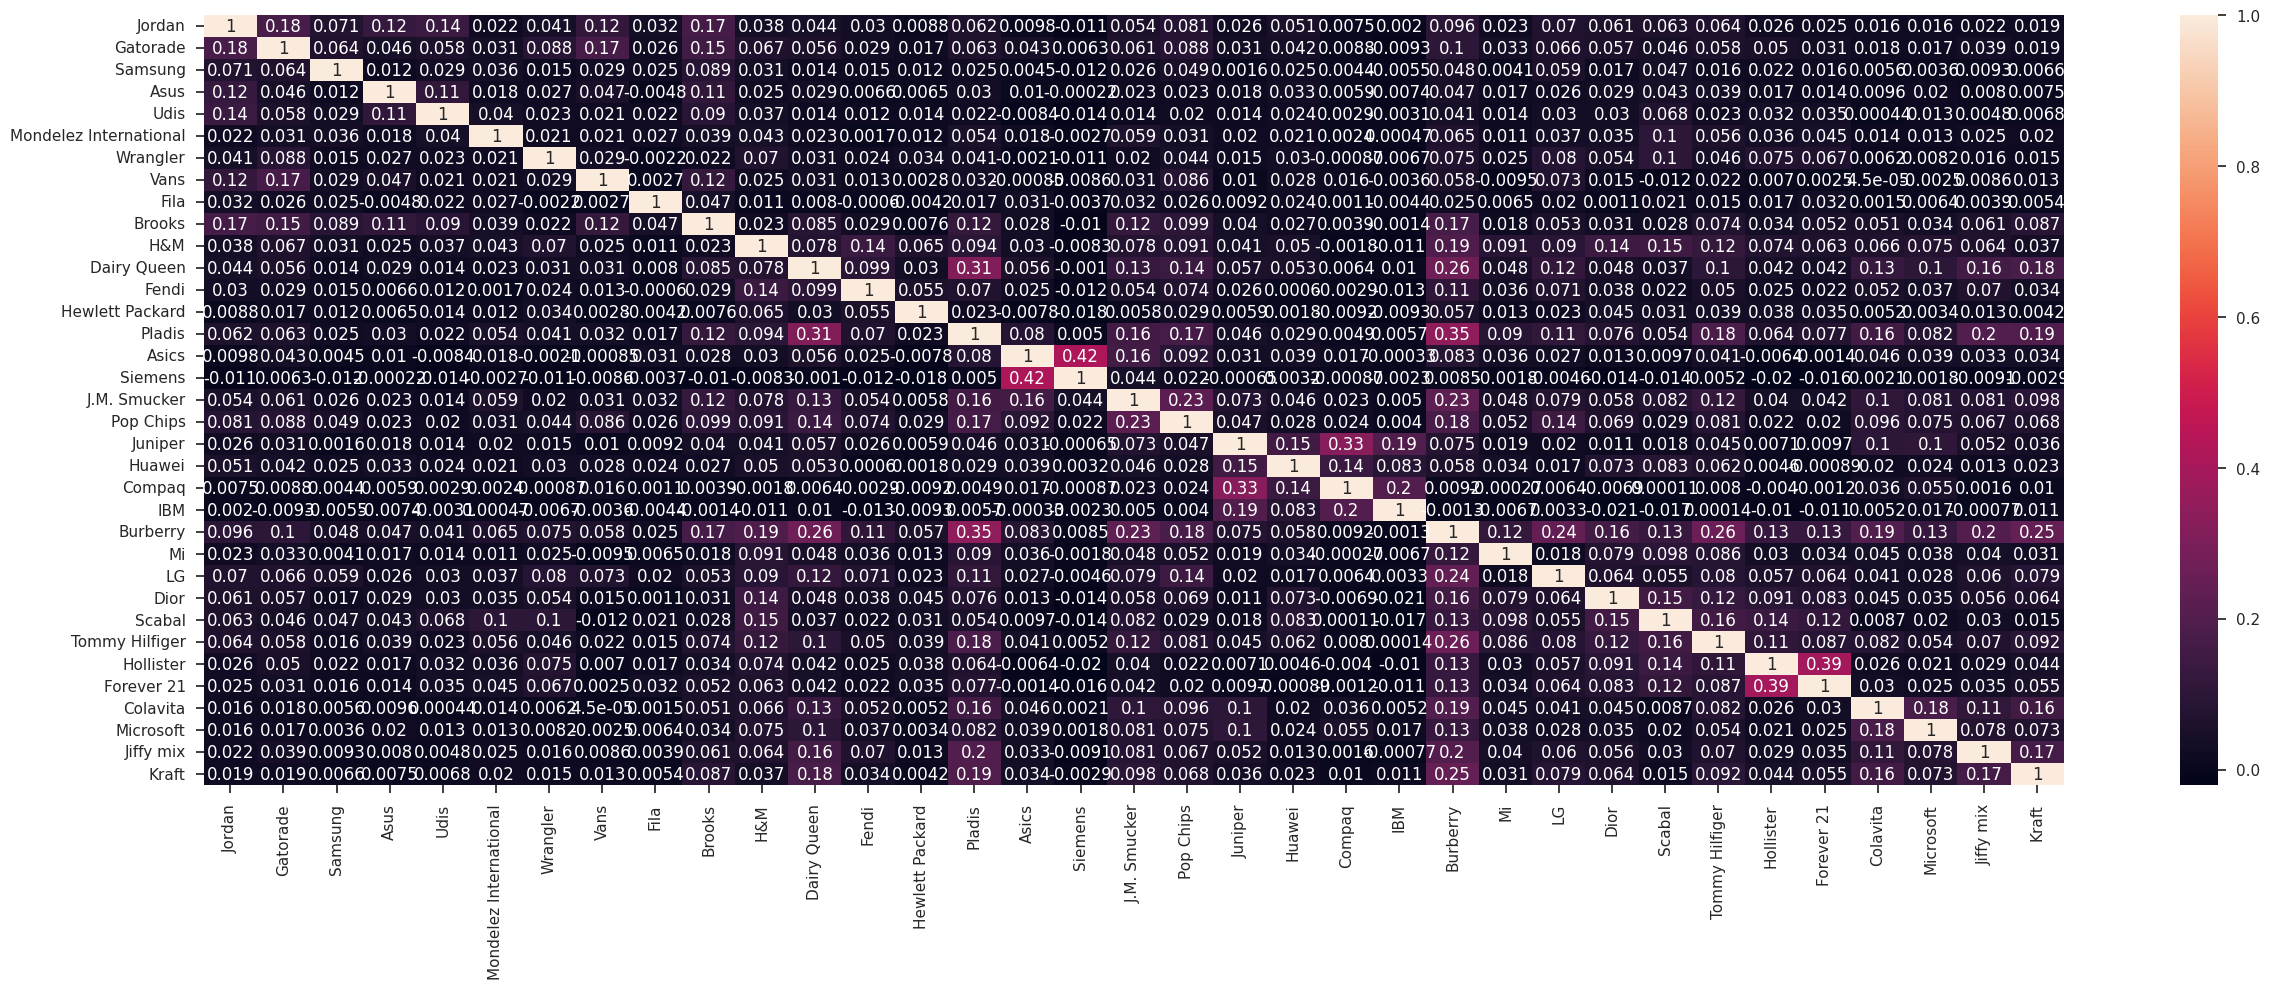

In [254]:
plt.figure(figsize=(30, 10))
sns.heatmap(df1.iloc[:,3: ].corr(), annot=True)
plt.show()

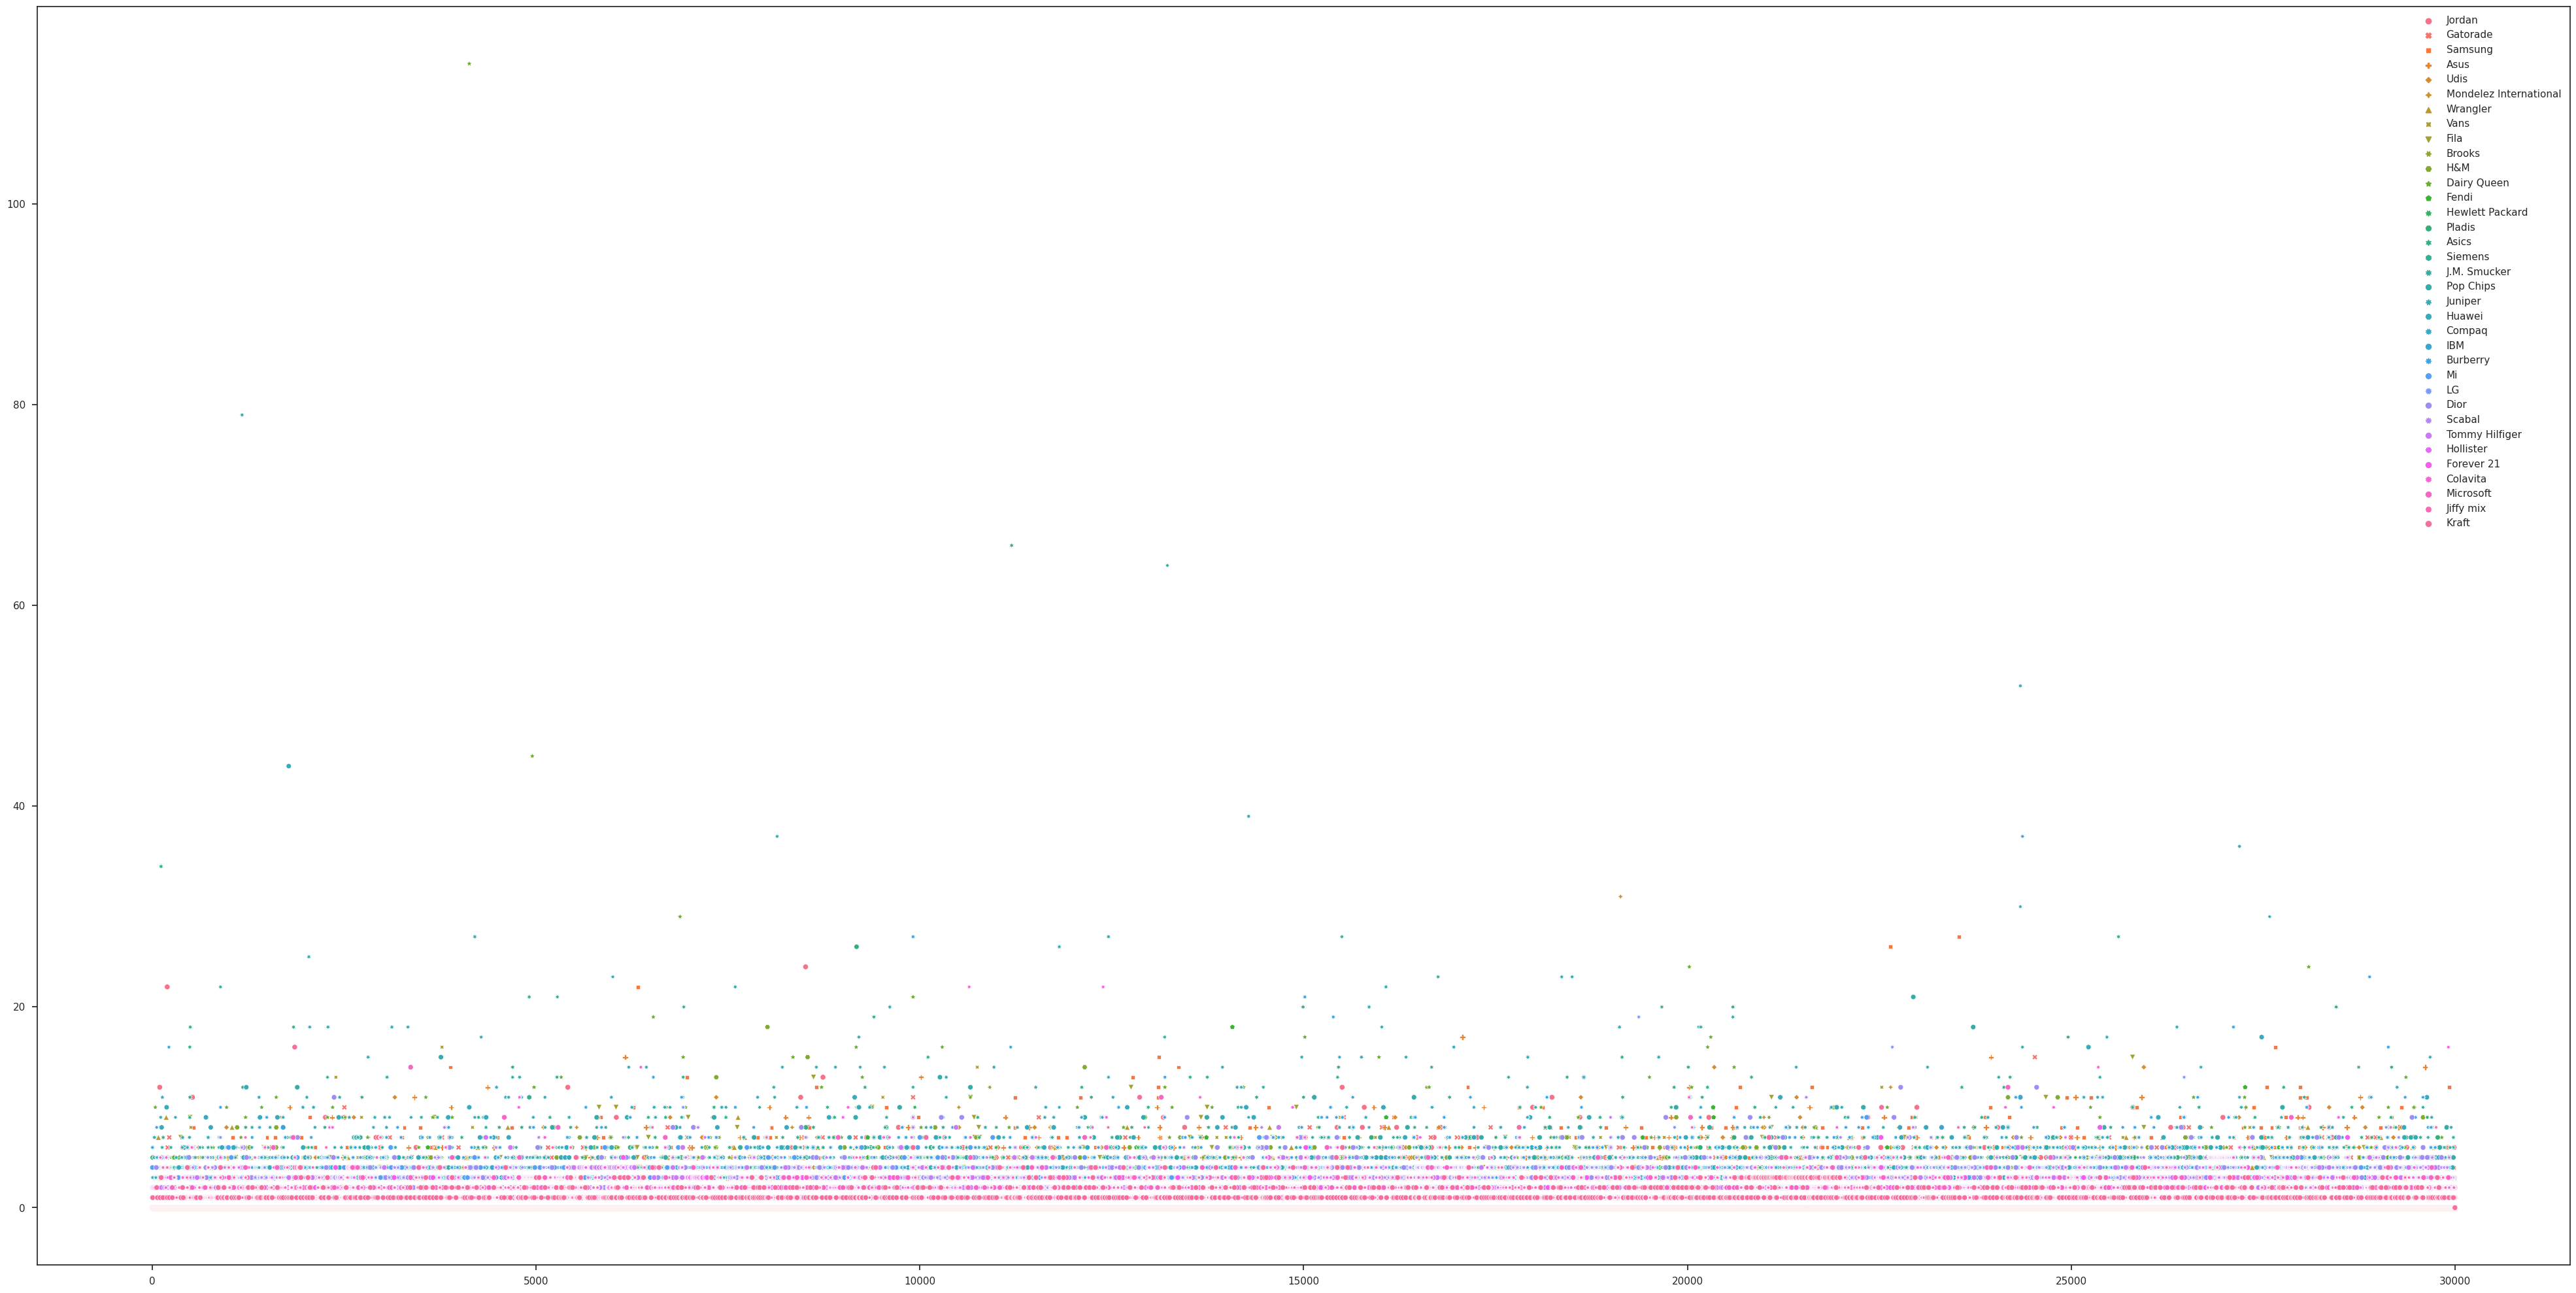

In [255]:
plt.figure(figsize=(50, 25))
sns.scatterplot(data=df1.iloc[:, 3:])
plt.show()

<Axes: xlabel='count', ylabel='Orders'>

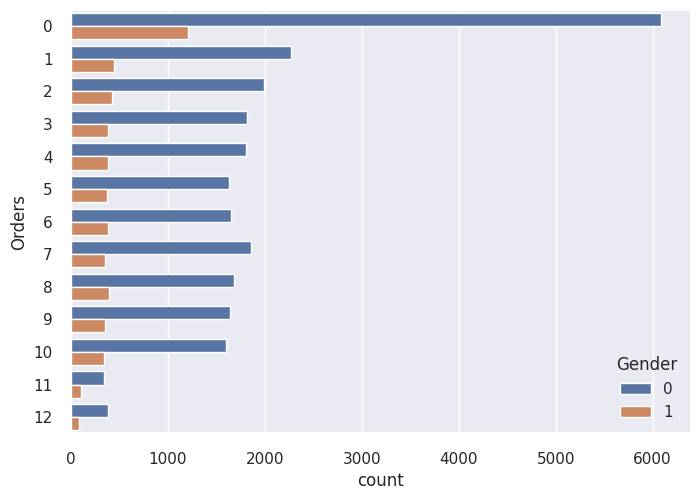

In [256]:
# Orders Genderwise Visualization
sns.set(style="darkgrid")

sns.countplot(data=df1, hue="Gender", y='Orders')


<Axes: xlabel='count', ylabel='Gender'>

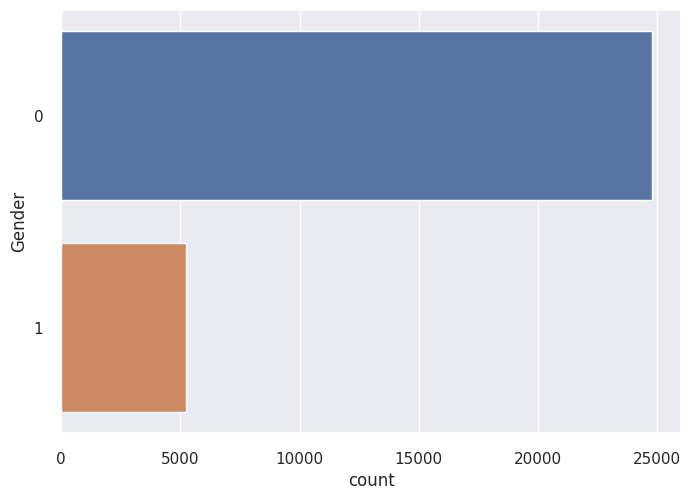

In [257]:
# Gender Count Visualization
sns.set(style="darkgrid")

sns.countplot(data=df1, y="Gender")


<Axes: xlabel='Orders', ylabel='count'>

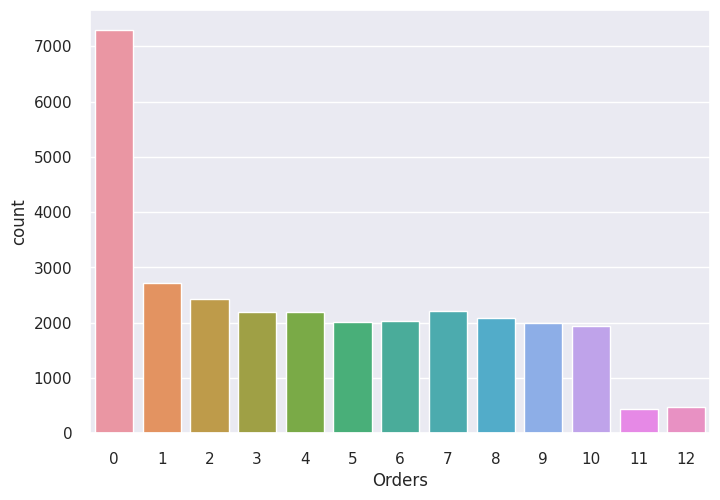

In [258]:
# Orders Count
sns.countplot(df1, x="Orders")

<Axes: xlabel='Orders', ylabel='count'>

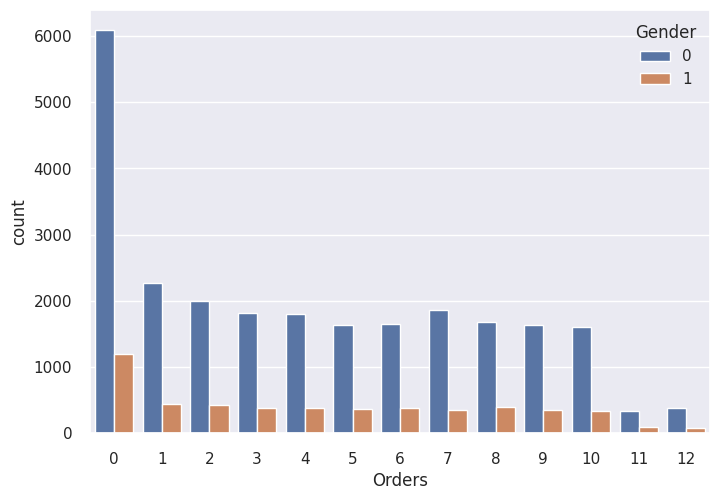

In [259]:
# Orders Genderwise
sns.countplot(df1, x="Orders", hue="Gender")

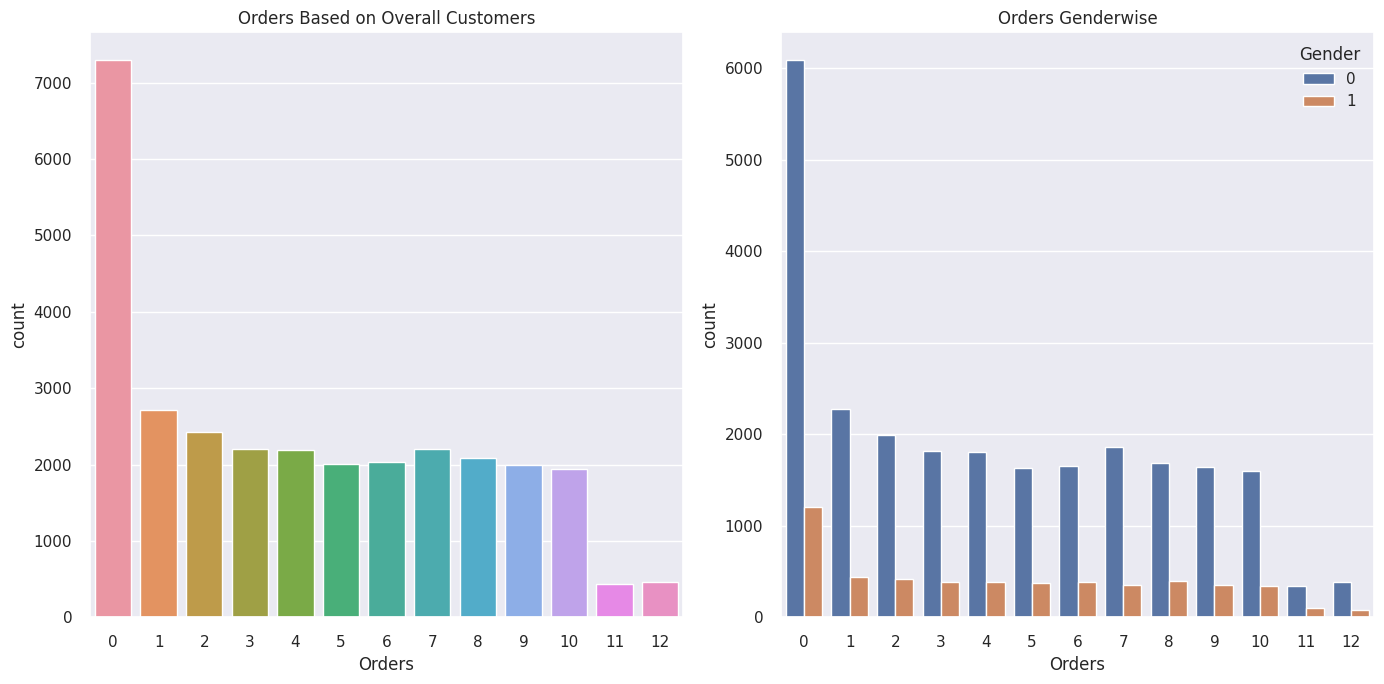

In [260]:

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot countplot without hue
sns.countplot(data=df1, x="Orders", ax=axes[0])
axes[0].set_title("Orders Based on Overall Customers")

# Plot countplot with hue
sns.countplot(data=df1, x="Orders", hue="Gender", ax=axes[1])
axes[1].set_title("Orders Genderwise")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

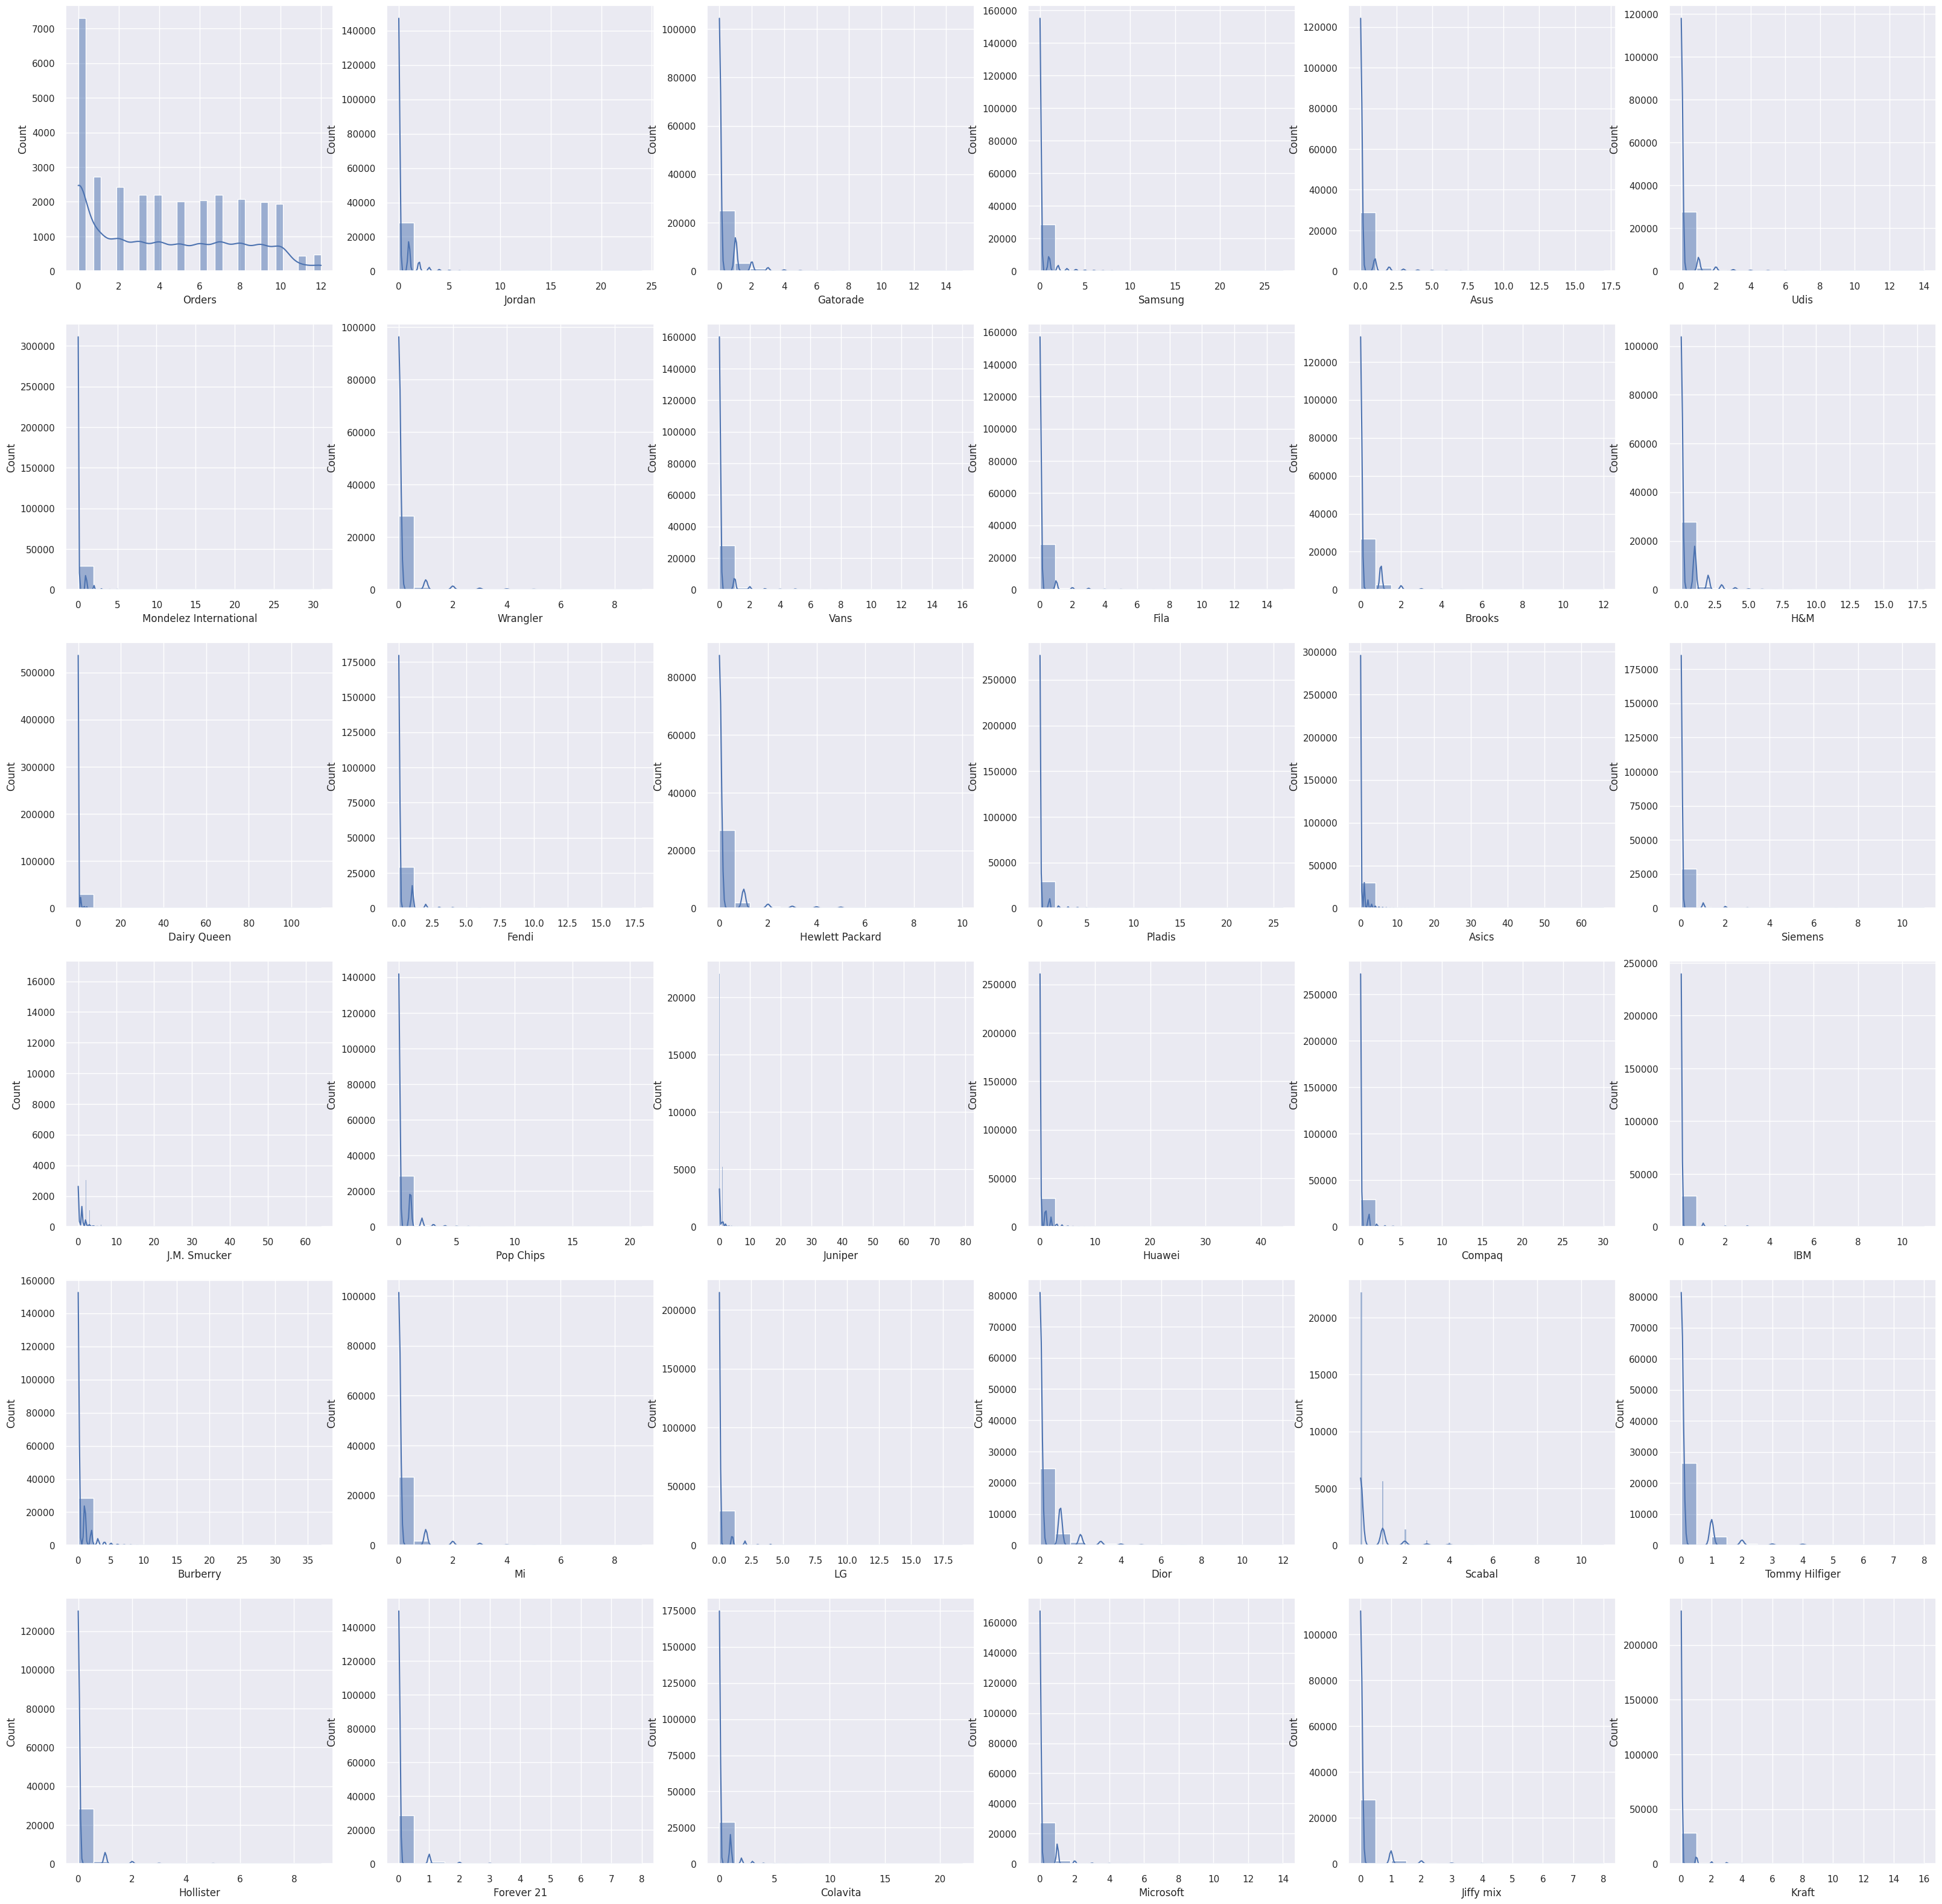

In [261]:
cols = list(df1.columns[2:])

def dist_list(lst):
    plt.figure(figsize=(40, 40))
    for i, col in enumerate(lst, 1):
        plt.subplot(6, 6, i)
        sns.histplot(data=df1, x=df1[col], kde=True)
        plt.xlabel(col)  # Set the x-axis label
        plt.ylabel('Count')  # Set the y-axis label

dist_list(cols)

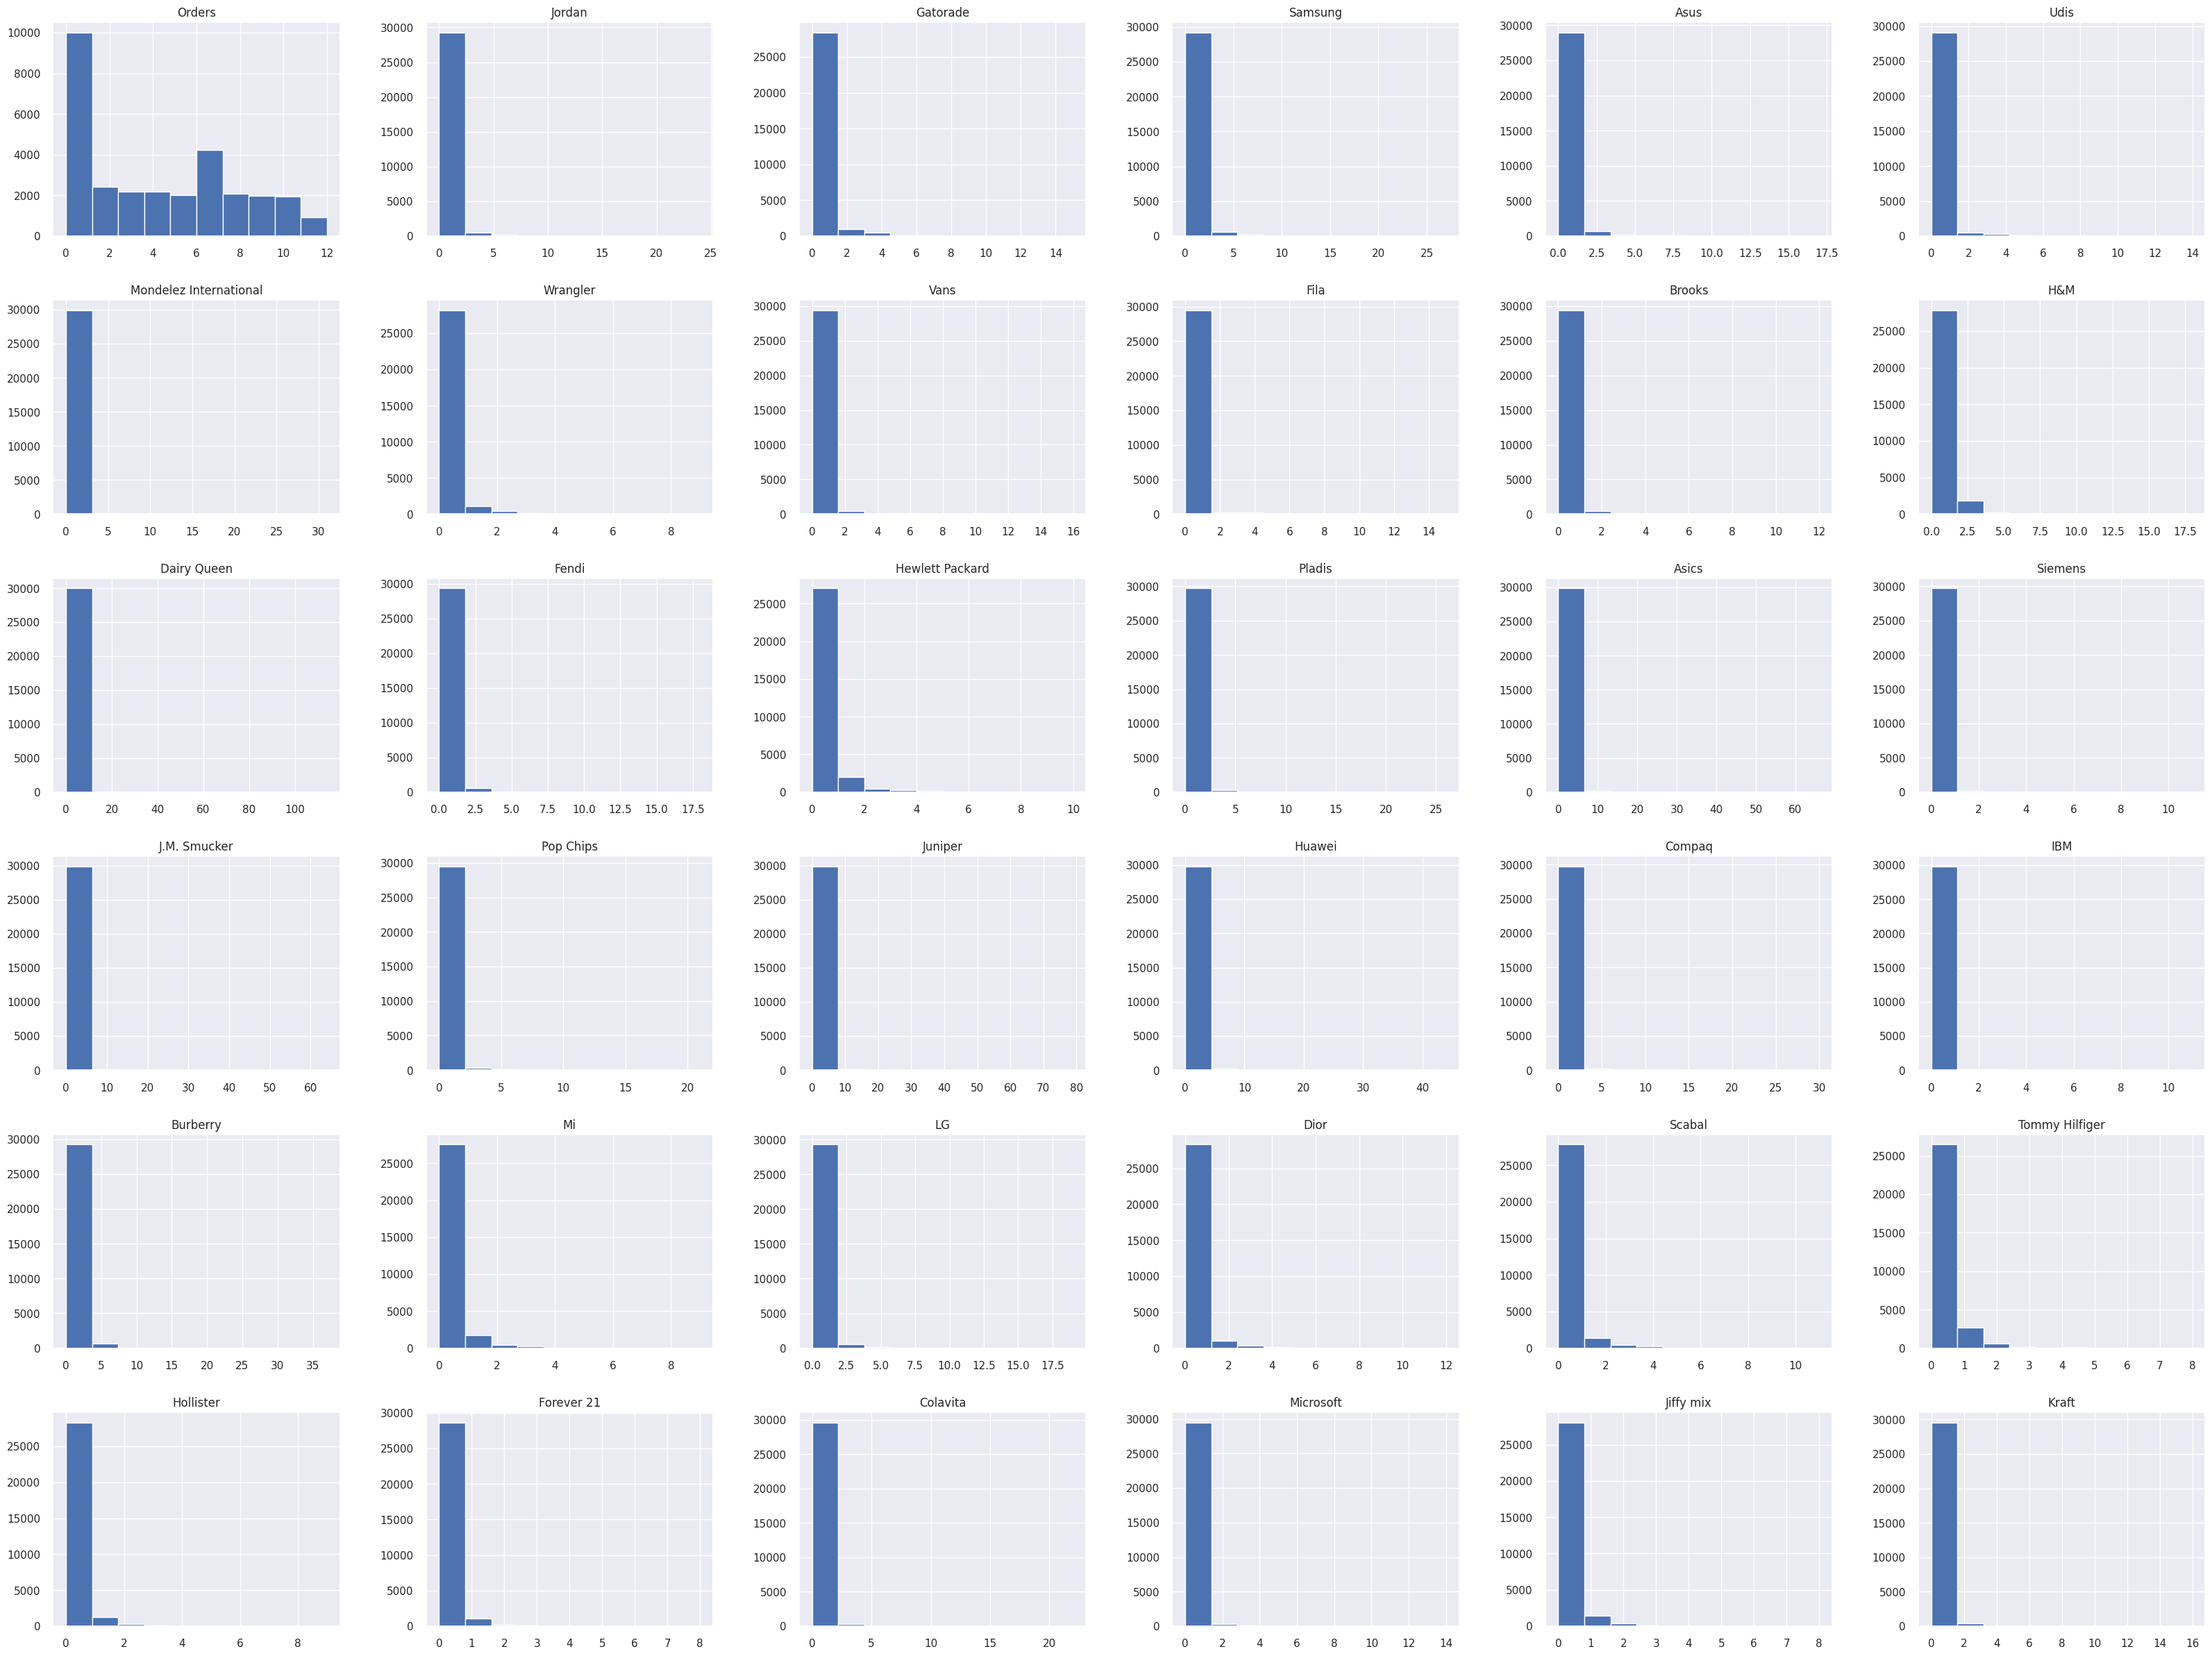

In [262]:
df1.iloc[:,2:].hist(figsize=(40,30))
plt.show()


# FEATURE HANDLING


In [263]:
df2 = df1.copy()

In [264]:
df2['Total Brands Search'] = df2.iloc[:,3:].sum(axis=1)

The code snippet df2['Total Brands Search'] = df2.iloc[:,3:].sum(axis=1) calculates the sum of values across each row in columns starting from the fourth column (iloc[:,3:]) of the DataFrame df2 and assigns the result to a new column called 'Total Brands Search'.

In summary, the code calculates the sum of values across each row for a subset of columns in df2 and stores the result in a new column 'Total Brands Search'. This can be useful for aggregating information or calculating row-wise totals based on specific columns in a DataFrame.


In [265]:
df2.head()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1       1       7       0         0        0     0     0   
1        2       0       0       0         1        0     0     0   
2        3       1       7       0         1        0     0     0   
3        4       0       0       0         0        0     0     0   
4        5       0      10       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
0                       0         0     2     0       0    0            0   
1                       0         0     0     0       0    1            0   
2                       0         0     0     0       0    0            0   
3                       0         0     0     0       0    1            0   
4                       0         0     0     0       0    0            1   

   Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  Pop Chips  \
0      0                0       0      0        0             0          0   
1      0                0       0      0        0             2          2   
2      0                0       0      2        0             1          0   
3      0                0       0      0        0             0          1   
4      0                0       5      1        0             3          0   

   Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  Scabal  \
0        0       0       0    0         0   0   0     0       0   
1        1       0       0    0         6   4   0     1       0   
2        0       0       0    0         0   0   0     0       0   
3        0       0       0    0         0   0   0     0       0   
4        1       0       0    0         1   0   0     0       2   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0               0          0           0         0          0          0   
1               0          0           0         0          0          0   
2               0          0           0         0          1          0   
3               0          0           0         0          0          0   
4               0          0           0         0          0          1   

   Kraft  Total Brands Search  
0      0                    2  
1      0                   18  
2      0                    5  
3      0                    2  
4      1                   16

In [266]:
df2.tail()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
29995    29996       1       0       0         0        0     0     0   
29996    29997       1       1       0         1        0     0     0   
29997    29998       1       0       0         1        0     0     0   
29998    29999       1       0       0         0        0     0     0   
29999    30000       0       3       2         0        0     1     0   

       Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
29995                       0         0     0     0       1    0            0   
29996                       0         0     0     0       0    0            0   
29997                       0         0     1     0       0    0            0   
29998                       0         0     0     0       0    0            0   
29999                       0         0     0     0       0    0            0   

       Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
29995      0                0       0      0        0             0   
29996      0                0       0      0        0             0   
29997      0                0       0      0        0             0   
29998      0                0       0      0        0             0   
29999      0                0       0      0        0             2   

       Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  \
29995          0        0       0       0    0         0   0   0     0   
29996          0        0       0       0    0         0   0   0     0   
29997          0        0       0       0    0         0   0   0     0   
29998          1        0       0       0    0         0   0   0     0   
29999          0        0       0       0    0         0   0   0     0   

       Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
29995       0               0          0           0         0          0   
29996       0               0          0           0         0          0   
29997       0               0          0           0         0          0   
29998       0               0          0           0         0          0   
29999       0               0          0           0         0          0   

       Jiffy mix  Kraft  Total Brands Search  
29995          0      0                    1  
29996          0      0                    1  
29997          0      0                    2  
29998          0      0                    1  
29999          0      0                    5

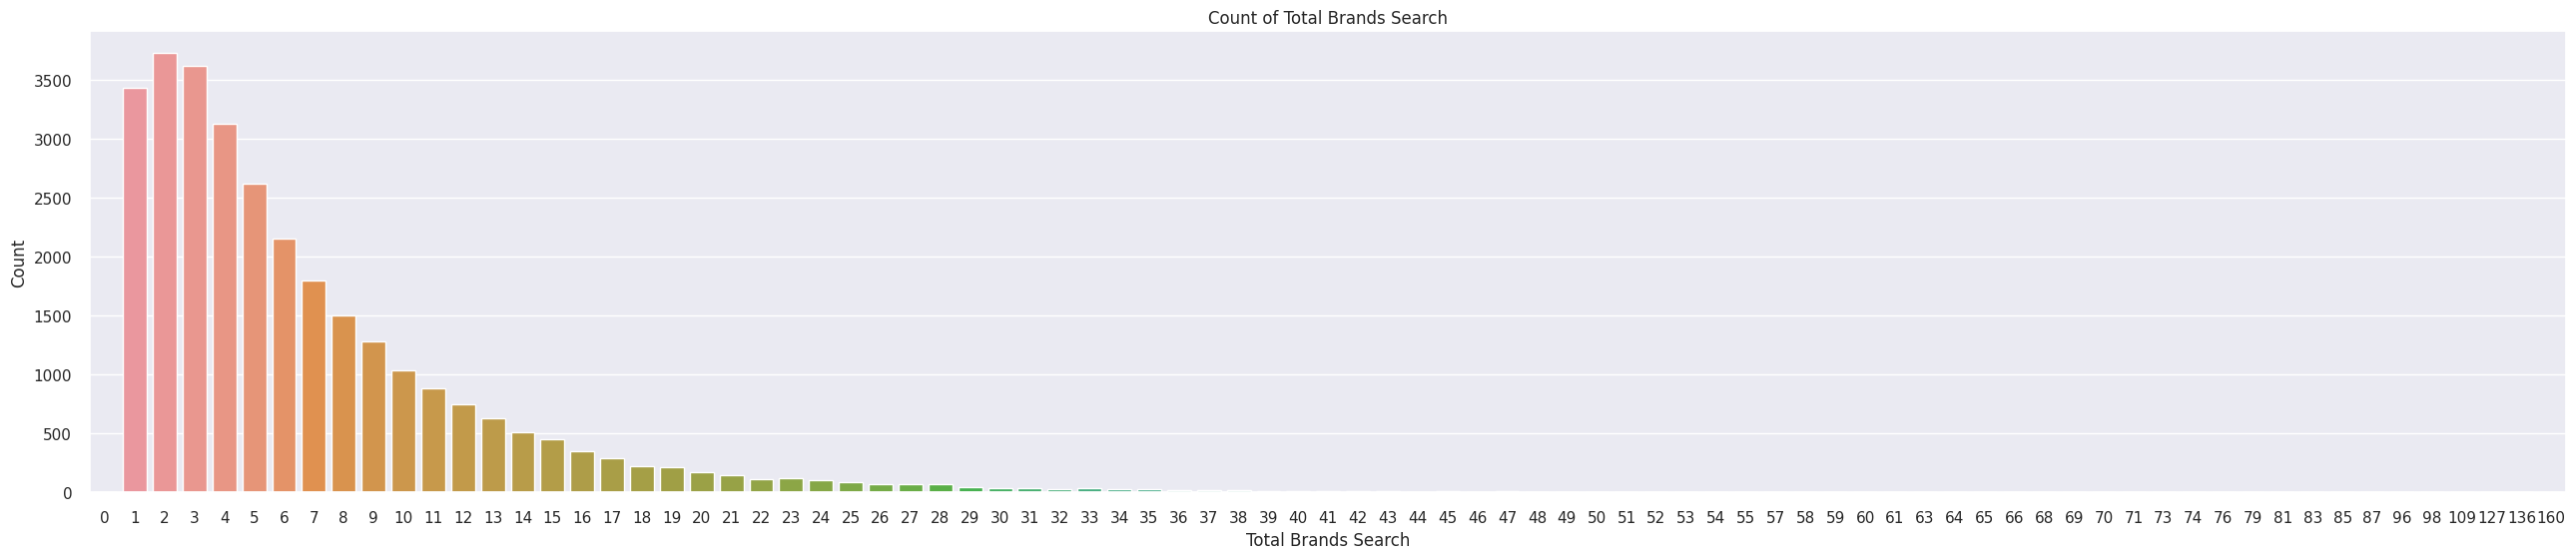

In [267]:
plt.figure(figsize=(32, 6))  # Set the figure size

sns.countplot(data=df2, x="Total Brands Search")

plt.xlabel("Total Brands Search")  # Set the x-axis label
plt.ylabel("Count")  # Set the y-axis label
plt.title("Count of Total Brands Search")  # Set the title of the plot

plt.show()

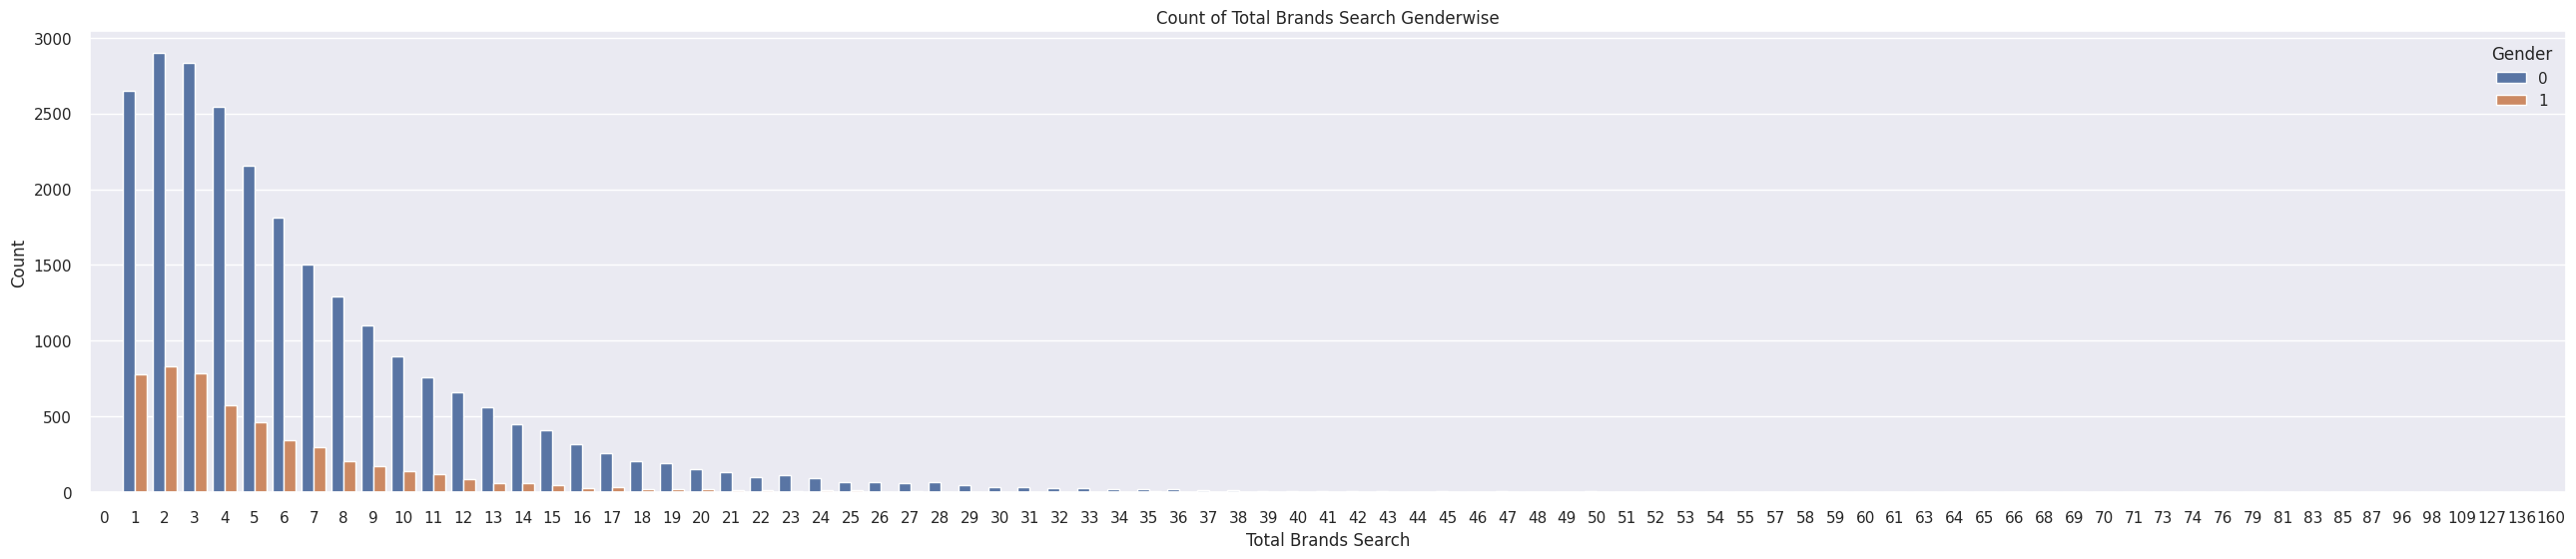

In [268]:
plt.figure(figsize=(32, 6))  # Set the figure size

sns.countplot(data=df2, x="Total Brands Search", hue="Gender")

plt.xlabel("Total Brands Search")  # Set the x-axis label
plt.ylabel("Count")  # Set the y-axis label
plt.title("Count of Total Brands Search Genderwise")  # Set the title of the plot

plt.show()

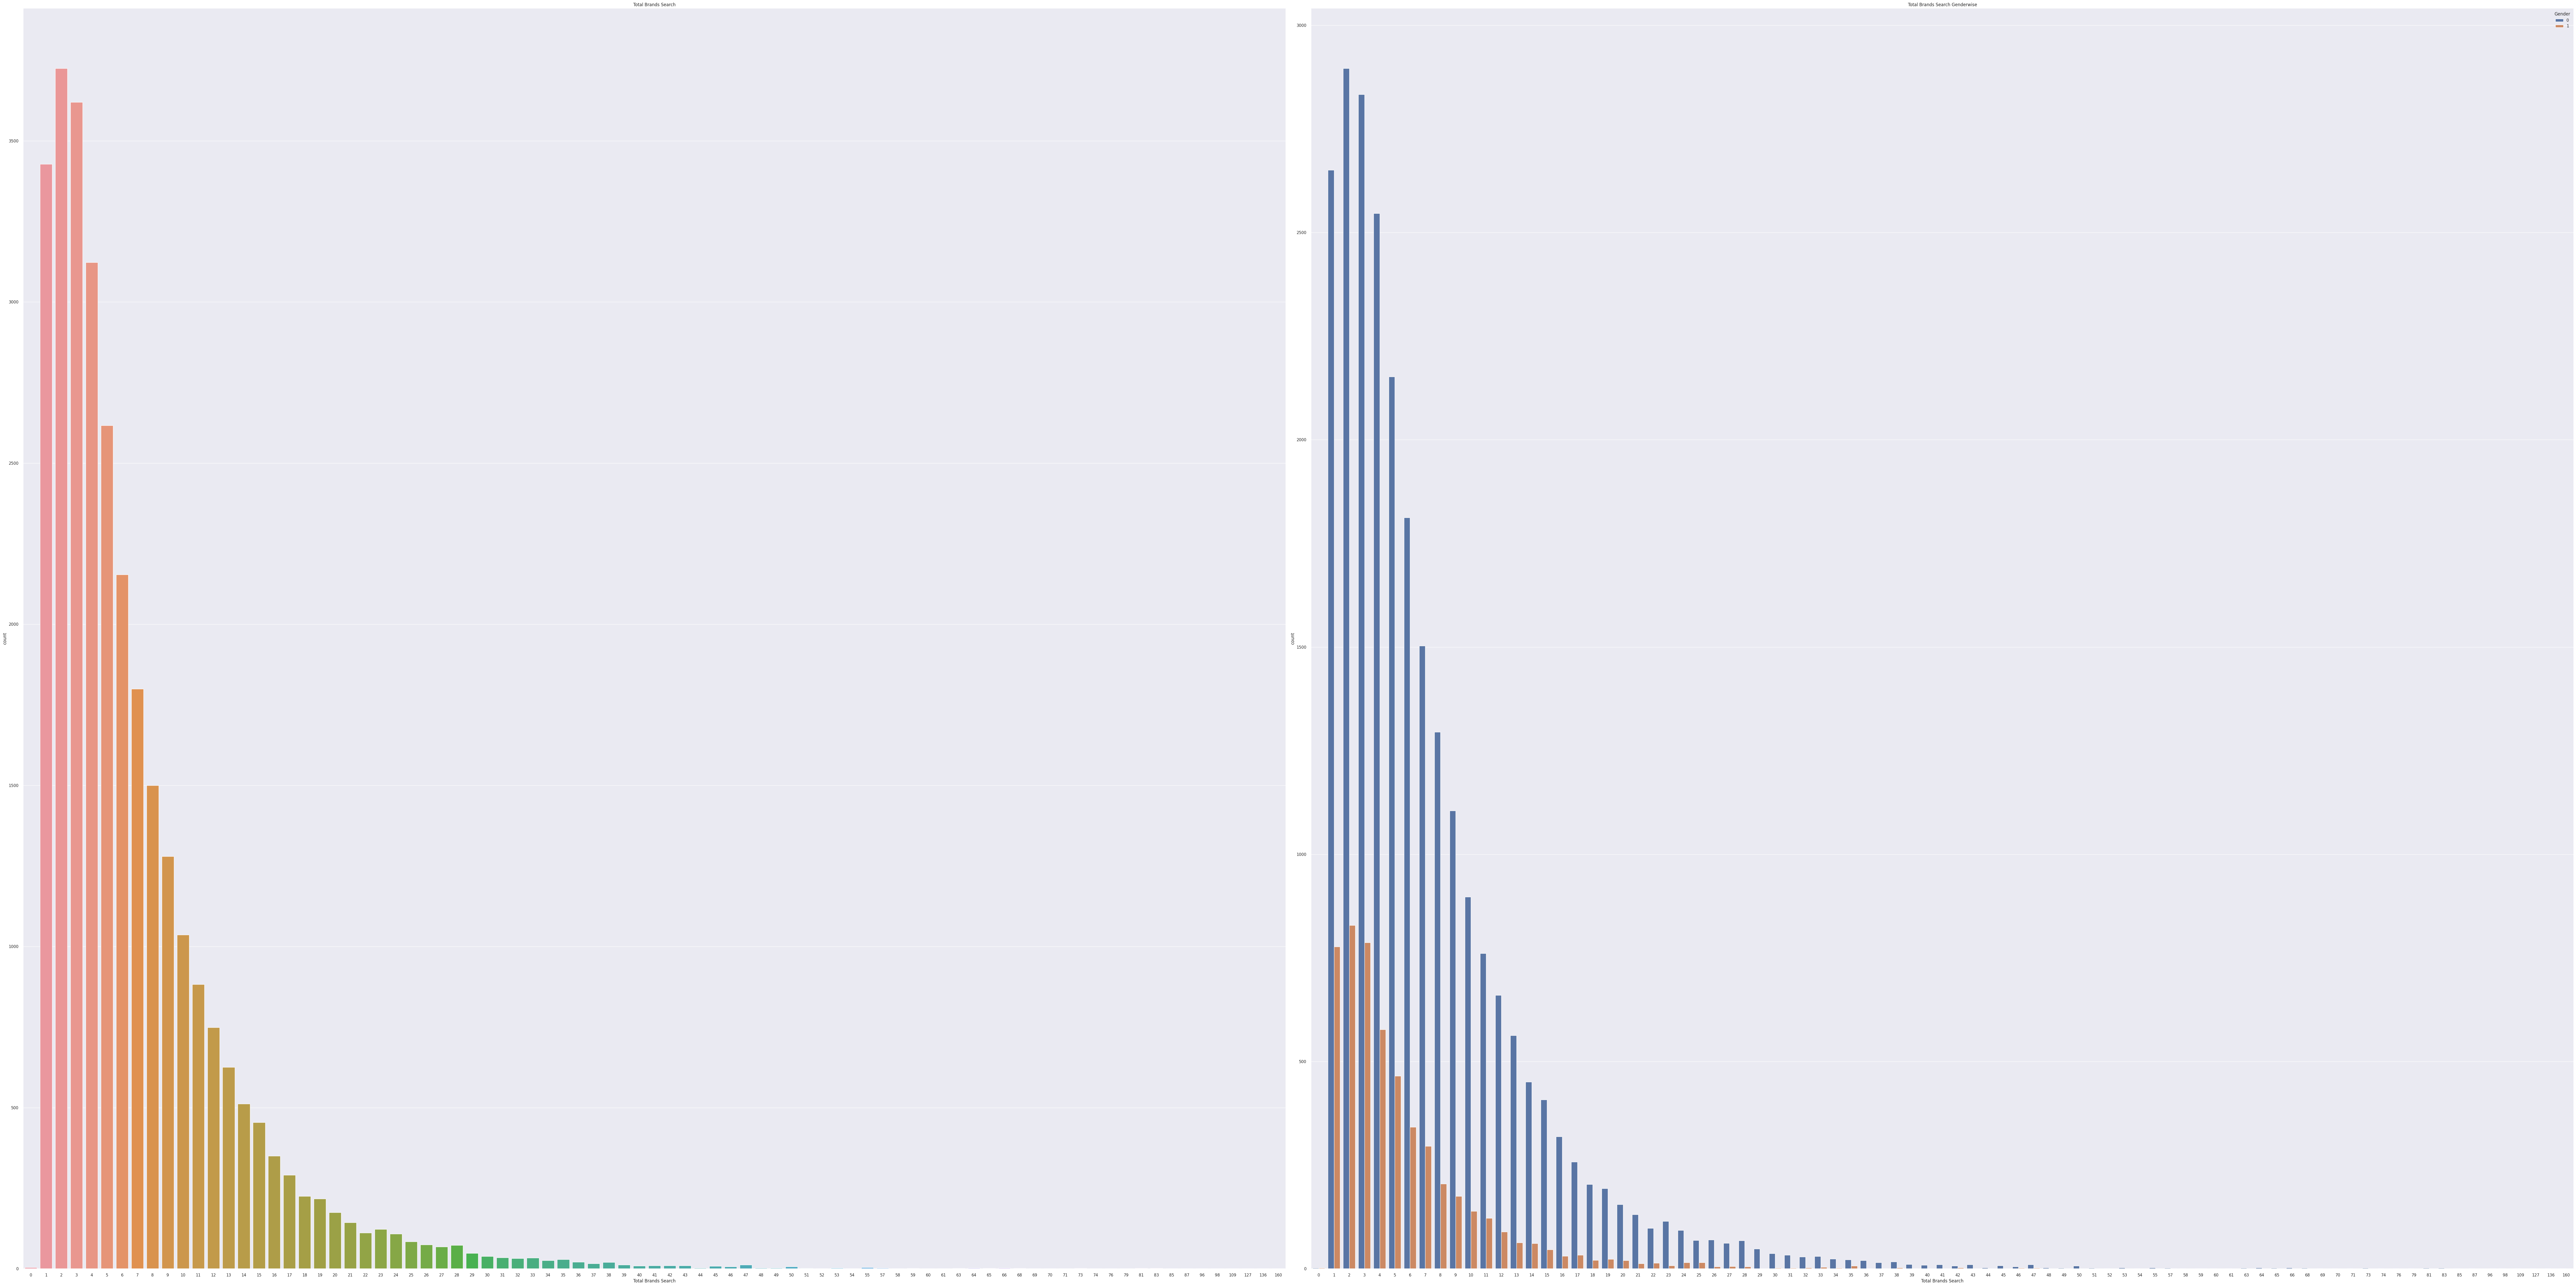

In [269]:

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(100, 50))

# Plot countplot with hue
sns.countplot(data=df2, x="Total Brands Search", hue="Gender", ax=axes[1])
axes[1].set_title("Total Brands Search Genderwise")

# Plot countplot without hue
sns.countplot(data=df2, x="Total Brands Search", ax=axes[0])
axes[0].set_title("Total Brands Search")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [270]:
df2.head()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1       1       7       0         0        0     0     0   
1        2       0       0       0         1        0     0     0   
2        3       1       7       0         1        0     0     0   
3        4       0       0       0         0        0     0     0   
4        5       0      10       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
0                       0         0     2     0       0    0            0   
1                       0         0     0     0       0    1            0   
2                       0         0     0     0       0    0            0   
3                       0         0     0     0       0    1            0   
4                       0         0     0     0       0    0            1   

   Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  Pop Chips  \
0      0                0       0      0        0             0          0   
1      0                0       0      0        0             2          2   
2      0                0       0      2        0             1          0   
3      0                0       0      0        0             0          1   
4      0                0       5      1        0             3          0   

   Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  Scabal  \
0        0       0       0    0         0   0   0     0       0   
1        1       0       0    0         6   4   0     1       0   
2        0       0       0    0         0   0   0     0       0   
3        0       0       0    0         0   0   0     0       0   
4        1       0       0    0         1   0   0     0       2   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0               0          0           0         0          0          0   
1               0          0           0         0          0          0   
2               0          0           0         0          1          0   
3               0          0           0         0          0          0   
4               0          0           0         0          0          1   

   Kraft  Total Brands Search  
0      0                    2  
1      0                   18  
2      0                    5  
3      0                    2  
4      1                   16

# ANALYSIS BASED ON ORDERS

In [271]:
X = df2.iloc[:,2:3].values

The code X = df2.iloc[:,2:3].values extracts a subset of data from the DataFrame df2 and assigns it to the variable X. Here's an explanation of what each part of the code does:

df2.iloc[:,2:3]: This uses the iloc indexer to select all rows (:) and a specific range of columns (2:3) in df2. The range 2:3 selects the third column of df2, including the column with index 2 and excluding the column with index 3. The result is a DataFrame containing only the selected column(s).

.values: This converts the selected column(s) from a DataFrame to a NumPy array. The values attribute of a DataFrame returns the underlying data as a NumPy array.

X = ...: This assigns the extracted values to the variable X. The variable X now holds the extracted data as a NumPy array.

In [272]:
X

array([[7],
       [0],
       [7],
       ...,
       [0],
       [0],
       [3]])

In [273]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(X)

The code snippet above demonstrates the use of MinMaxScaler from the sklearn.preprocessing module to perform data scaling. Here's a breakdown of what each part of the code does:

from sklearn.preprocessing import MinMaxScaler: This imports the MinMaxScaler class from the sklearn.preprocessing module.

scaler = MinMaxScaler(): This creates an instance of the MinMaxScaler class and assigns it to the variable scaler.

scaled_data = scaler.fit_transform(X): This line scales the data in the variable X using the fit_transform() method of the scaler object. The fit_transform() method fits the scaler to the data and then transforms it. The result is assigned to the variable scaled_data.

In summary, the code creates a MinMaxScaler object, fits it to the data in X, and then applies the scaling transformation to produce scaled_data. The MinMaxScaler scales the data to a specific range, typically between 0 and 1, preserving the relative relationships between the data points.

In [274]:
scaled_data

array([[0.58333333],
       [0.        ],
       [0.58333333],
       ...,
       [0.        ],
       [0.        ],
       [0.25      ]])

**ELBOW METHOD**

In [275]:
inertia=[]
for n in range(1,10):
  algm=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  algm.fit(X)
  inertia.append(algm.inertia_)

The code snippet provided calculates the inertia for different numbers of clusters in the K-means clustering algorithm. Here's a breakdown of what each part of the code does:

inertia = []: This initializes an empty list called inertia to store the inertia values.

for n in range(1, 10): This loop iterates over a range of numbers from 1 to 9, representing the number of clusters to evaluate.

algm = (KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, random_state=100)): This line creates an instance of the KMeans class from scikit-learn's cluster module. The n_clusters parameter specifies the number of clusters to create, init='k-means++' indicates the initialization method, n_init=10 sets the number of times the algm will be run with different centroid seeds, max_iter=300 limits the maximum number of iterations, and random_state=100 sets the random seed for reproducibility.

algm.fit(X): This fits the K-means algm to the data X using the fit() method of the algm object. It performs the clustering based on the specified number of clusters and other parameters.

inertia.append(algm.inertia_): This line adds the inertia value of the fitted algm to the inertia list. The inertia represents the sum of squared distances between each data point and its closest centroid, serving as a measure of compactness within the clusters.

The purpose of this code is to evaluate the inertia for different numbers of clusters in K-means clustering. By looping over a range of cluster numbers and fitting the algm to the data, the inertia values are computed and stored in the inertia list. This can help determine the optimal number of clusters by analyzing the inertia values and selecting a point where further increasing the number of clusters provides diminishing returns in terms of reducing inertia.

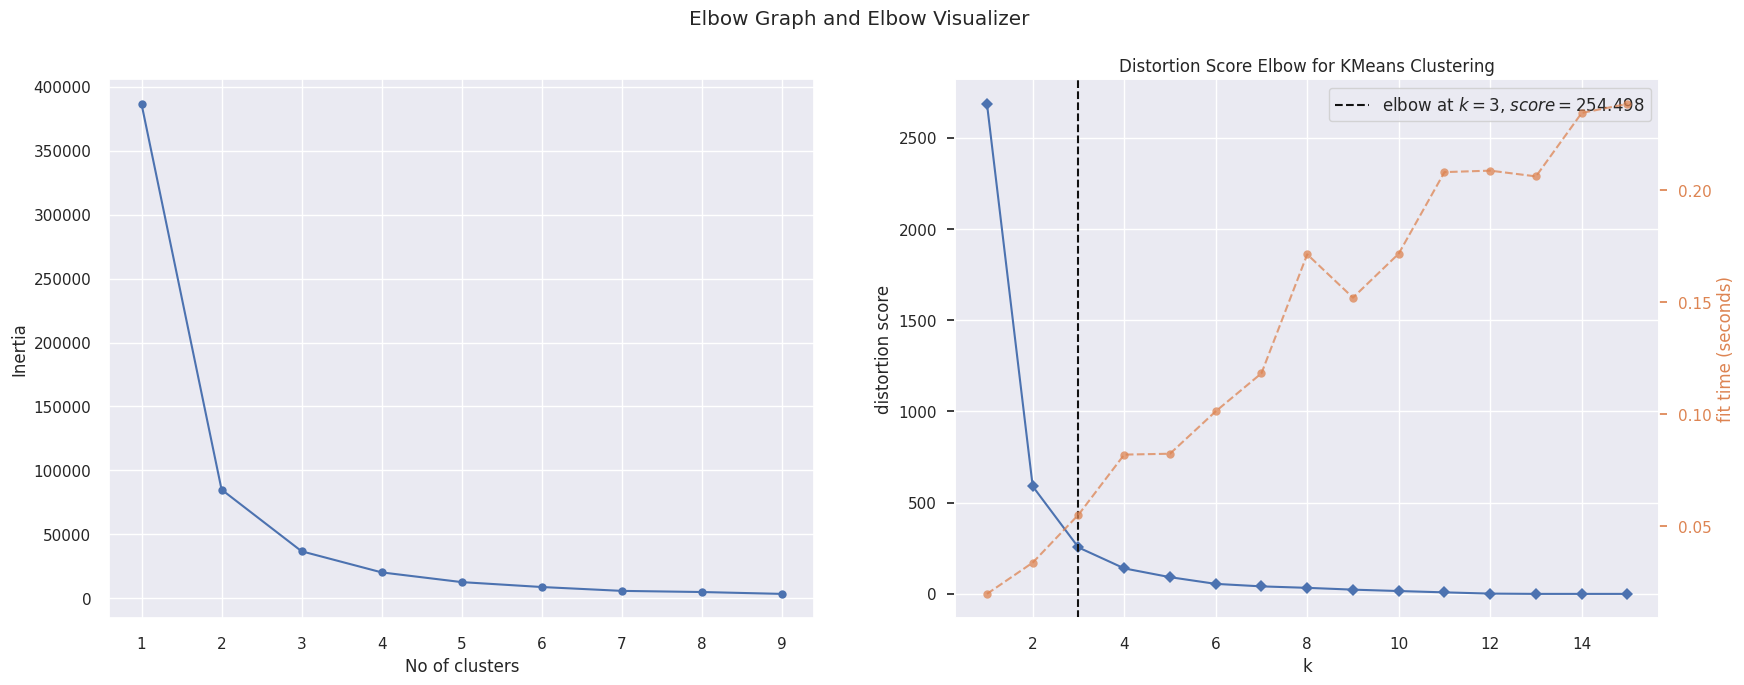

In [276]:
# elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,10), inertia, 'bo-')
plt.xlabel('No of clusters'), plt.ylabel('Inertia')

# Kelbow visualizer
plt.subplot(1,2,2)
kmeans = KMeans()
visualize = KElbowVisualizer(kmeans,k=(1,16))
visualize.fit(scaled_data)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()


The code provided generates an elbow graph and uses the KElbowVisualizer to visualize the optimal number of clusters. The elbow graph plots the inertia values against different numbers of clusters. The KElbowVisualizer is a visual tool that helps determine the elbow point by fitting a KMeans clustering model to the data. The graph and visualizer are displayed using plt.show(). The purpose is to find the optimal number of clusters based on the elbow method.

**Silhouette Analysis for optimal K value**

In [277]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
for n in range(2,6):
  cluster_labels=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  cluster_labels=cluster_labels.fit_predict(X)
  silhouette_avg.append(silhouette_score(X,cluster_labels))


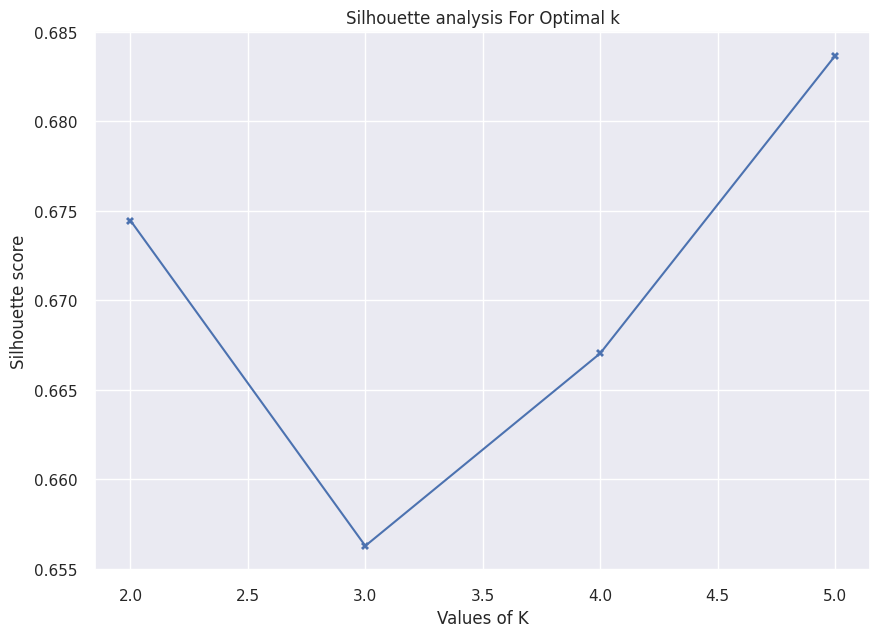

In [278]:
plt.figure(figsize=(10,7))
plt.plot(range(2,6),silhouette_avg,'bX-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [279]:
model = KMeans(n_clusters=3)
model = model.fit(scaled_data)
mp1 = model.predict(scaled_data)
centers = model.cluster_centers_ 

df2['Cluster_A'] = pd.DataFrame(mp1)



In [280]:
df2['Cluster_A'].value_counts()

0    12432
1     9128
2     8440
Name: Cluster_A, dtype: int64

Customer Counts on each Clusters

<function matplotlib.pyplot.show(close=None, block=None)>

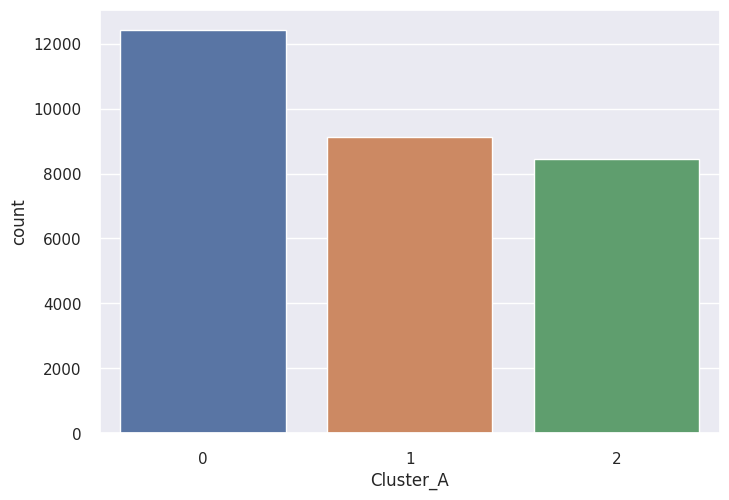

In [281]:
sns.countplot(data=df2,x='Cluster_A')
plt.show

In [282]:
df3 = df2.copy()

In [283]:
df3.columns

Index(['Cust_ID', 'Gender', 'Orders', 'Jordan', 'Gatorade', 'Samsung', 'Asus',
       'Udis', 'Mondelez International', 'Wrangler', 'Vans', 'Fila', 'Brooks',
       'H&M', 'Dairy Queen', 'Fendi', 'Hewlett Packard', 'Pladis', 'Asics',
       'Siemens', 'J.M. Smucker', 'Pop Chips', 'Juniper', 'Huawei', 'Compaq',
       'IBM', 'Burberry', 'Mi', 'LG', 'Dior', 'Scabal', 'Tommy Hilfiger',
       'Hollister', 'Forever 21', 'Colavita', 'Microsoft', 'Jiffy mix',
       'Kraft', 'Total Brands Search', 'Cluster_A'],
      dtype='object')

**CLUSTER 0**

In [284]:
clust_0 = df3.groupby(['Cluster_A','Gender'],as_index=False).sum()
clust_0 = clust_0.loc[clust_0['Cluster_A'] == 0]

In [285]:
clust_0

Cluster_A  Gender    Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0       0  154699357    6269    2470      1947     2086  1813   
1          0       1   28245384    1291     601       777      435    12   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  1632                    1480      1266   802   999    1265  3534   
1    75                     162        17   515   267     419   159   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         2372   1463             1744    1190   2682      454          7497   
1          368    169              216     130    610       95          1319   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       2421     4902    2584    1184  323      4690  1349  1239  3041   
1        506      902     437     269   89       382    88   126   283   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    4194            1807        847         654      1960       1153   
1     175             172         83          55       386        186   

   Jiffy mix  Kraft  Total Brands Search  
0        870    776                70690  
1        160    142                10787

Text(0.5, 1.0, 'Customers count')

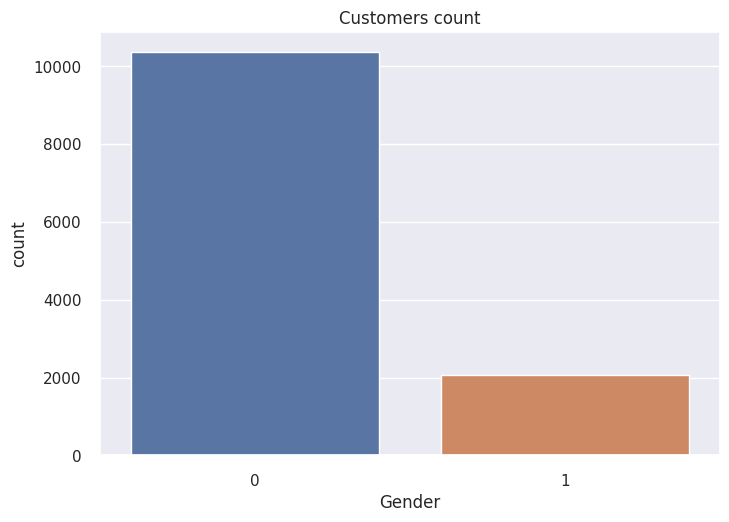

In [286]:
sns.countplot(data=df3.query('Cluster_A == 0') , x='Gender')
plt.title('Customers count')


In [287]:
import plotly.graph_objects as go

# Create bar plot using Plotly
fig = go.Figure(data=go.Bar(x=df3.query('Cluster_A == 0')['Gender'].value_counts().index,
                           y=df3.query('Cluster_A == 0')['Gender'].value_counts().values))

# Update layout
fig.update_layout(title='Customers count',
                  xaxis_title='Gender',
                  yaxis_title='Count')

# Show the figure
fig.show()


Text(0.5, 1.0, 'Genderwise Orders Placed')

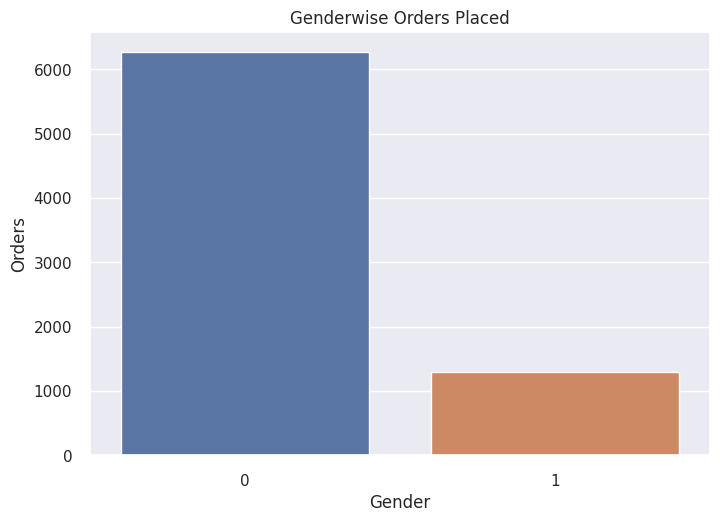

In [288]:
sns.barplot(data=clust_0.query('Cluster_A == 0') , x='Gender', y='Orders')
plt.title('Genderwise Orders Placed')


Text(0.5, 1.0, 'Genderwise Brands Searched')

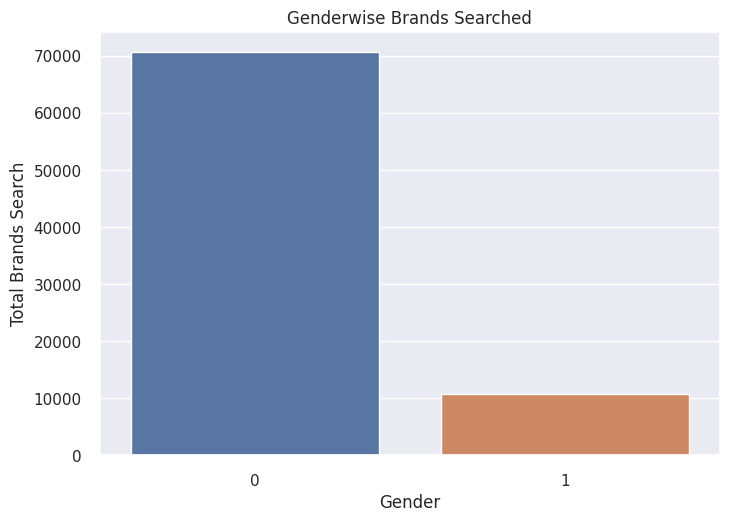

In [289]:
sns.barplot(data=clust_0.query('Cluster_A == 0') , x='Gender', y='Total Brands Search')
plt.title('Genderwise Brands Searched')


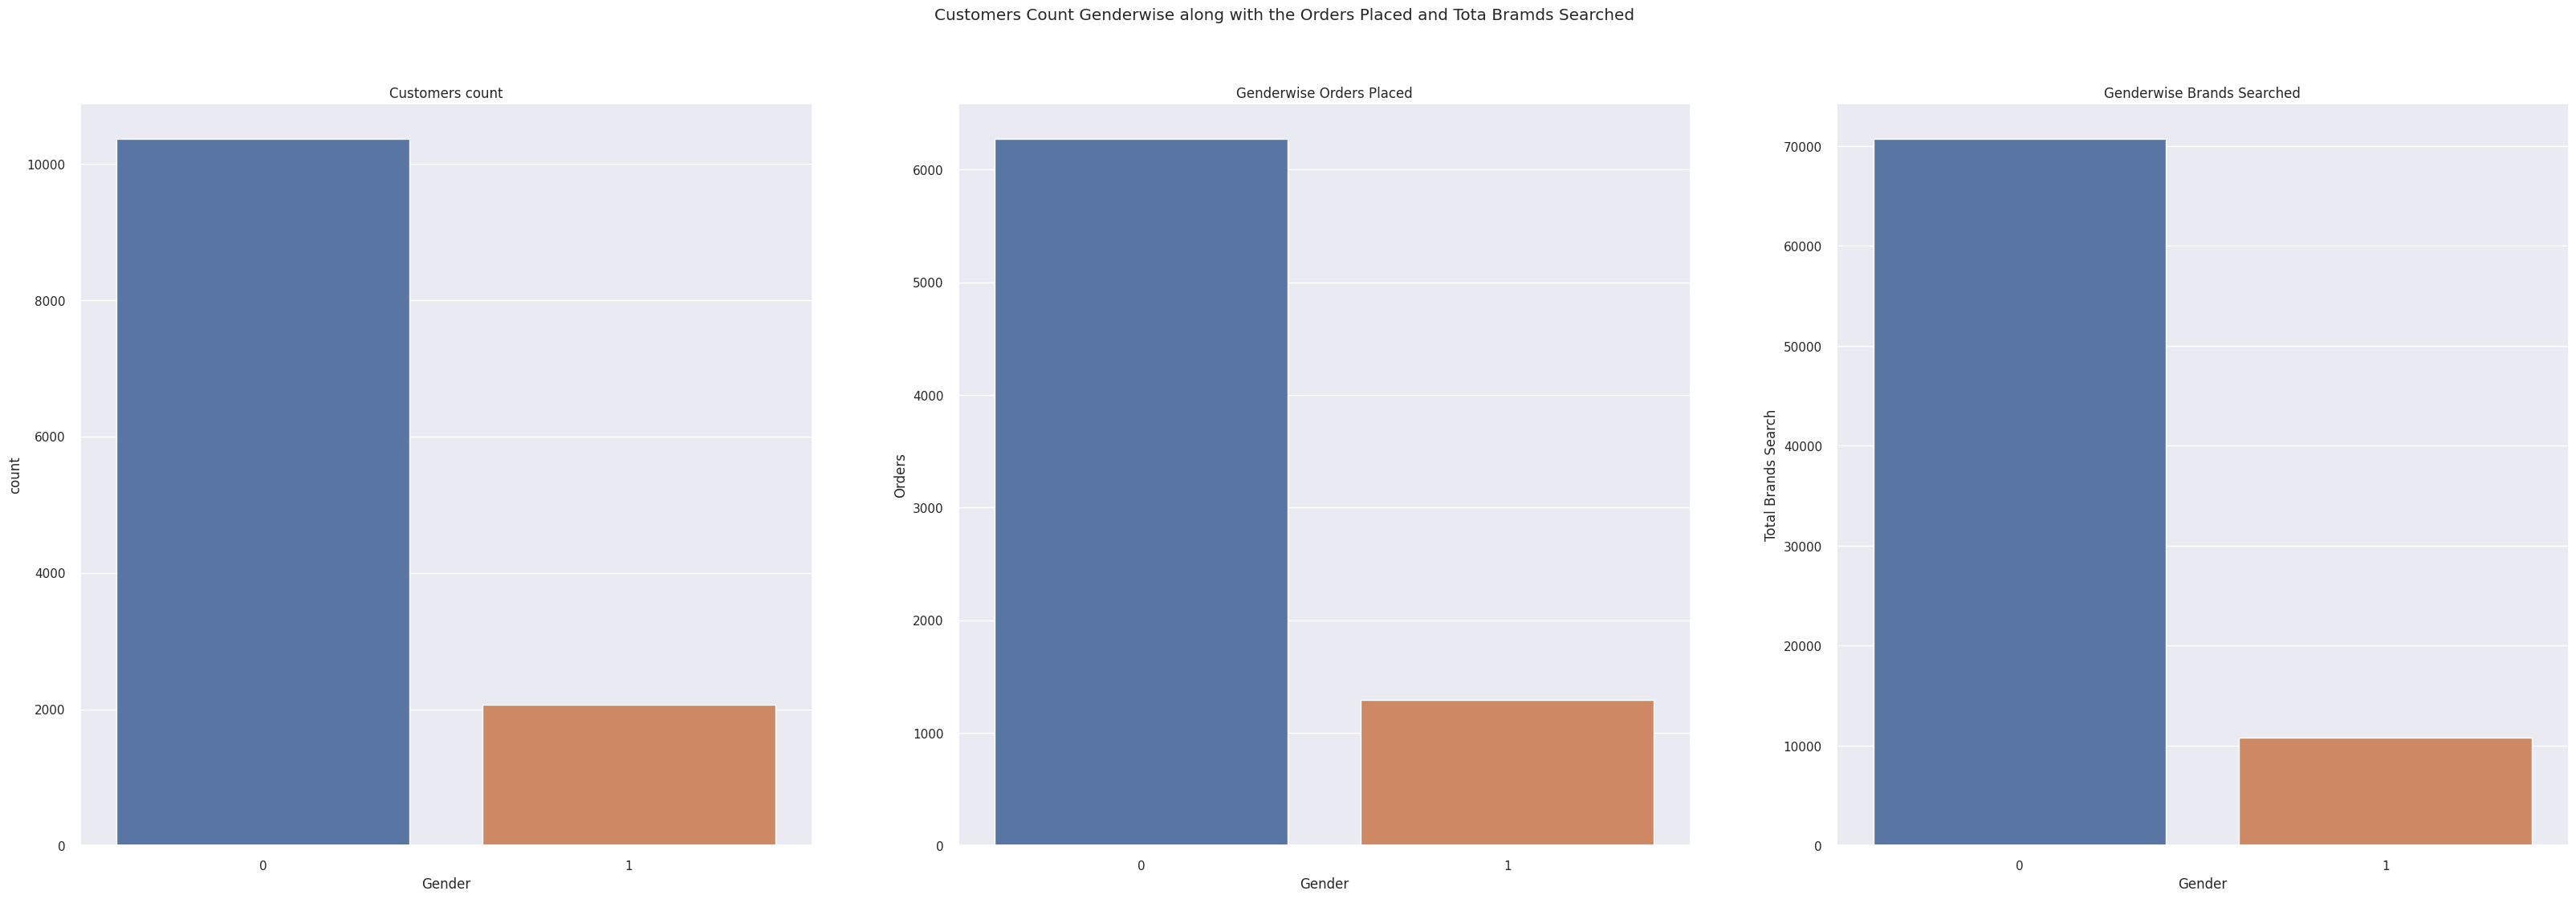

In [290]:
plt.figure(figsize=(40,12))
plt.subplot(1,3,1)
sns.countplot(data=df3.query('Cluster_A == 0') , x='Gender')
plt.title('Customers count')

plt.subplot(1,3,2)
sns.barplot(data=clust_0.query('Cluster_A == 0') , x='Gender', y='Orders')
plt.title('Genderwise Orders Placed')

plt.subplot(1,3,3)
sns.barplot(data=clust_0.query('Cluster_A == 0') , x='Gender', y='Total Brands Search')
plt.title('Genderwise Brands Searched')
plt.suptitle('Customers Count Genderwise along with the Orders Placed and Tota Bramds Searched')
plt.show()

In [291]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# First Graph - Countplot
fig1 = go.Figure(data=go.Bar(x=df3.query('Cluster_A == 0')['Gender'].value_counts().index,
                            y=df3.query('Cluster_A == 0')['Gender'].value_counts().values))
fig1.update_layout(title='Customers Count', xaxis_title='Gender')

# Second Graph - Barplot for Orders Placed
fig2 = go.Figure(data=go.Bar(x=clust_0.query('Cluster_A == 0')['Gender'],
                            y=clust_0.query('Cluster_A == 0')['Orders']))
fig2.update_layout(title='Genderwise Orders Placed', xaxis_title='Gender', yaxis_title='Orders')

# Third Graph - Barplot for Brands Searched
fig3 = go.Figure(data=go.Bar(x=clust_0.query('Cluster_A == 0')['Gender'],
                            y=clust_0.query('Cluster_A == 0')['Total Brands Search']))
fig3.update_layout(title='Genderwise Brands Searched', xaxis_title='Gender', yaxis_title='Total Brands Search')

# Create Subplots
fig = make_subplots(rows=1, cols=3, subplot_titles=['Customers Count', 'Genderwise Orders Placed', 'Genderwise Brands Searched'])

fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=1, col=3)

fig.update_layout(height=500, width=1200, title='Customers Count Genderwise along with the Orders Placed and Total Brands Searched')
fig.show()


**CLUSTER 1**


In [292]:
clust_1 = df3.groupby(['Cluster_A','Gender'],as_index=False).sum()
clust_1 = clust_1.loc[clust_1['Cluster_A'] == 0]

In [293]:
clust_1

Cluster_A  Gender    Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0       0  154699357    6269    2470      1947     2086  1813   
1          0       1   28245384    1291     601       777      435    12   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  1632                    1480      1266   802   999    1265  3534   
1    75                     162        17   515   267     419   159   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         2372   1463             1744    1190   2682      454          7497   
1          368    169              216     130    610       95          1319   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       2421     4902    2584    1184  323      4690  1349  1239  3041   
1        506      902     437     269   89       382    88   126   283   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    4194            1807        847         654      1960       1153   
1     175             172         83          55       386        186   

   Jiffy mix  Kraft  Total Brands Search  
0        870    776                70690  
1        160    142                10787

Text(0.5, 1.0, 'Customers count')

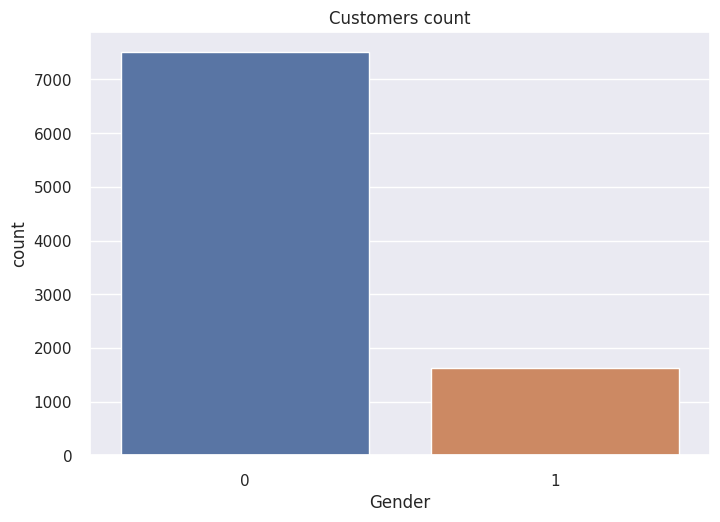

In [294]:
sns.countplot(data=df3.query('Cluster_A == 1') , x='Gender')
plt.title('Customers count')


Text(0.5, 1.0, 'Genderwise Orders Placed')

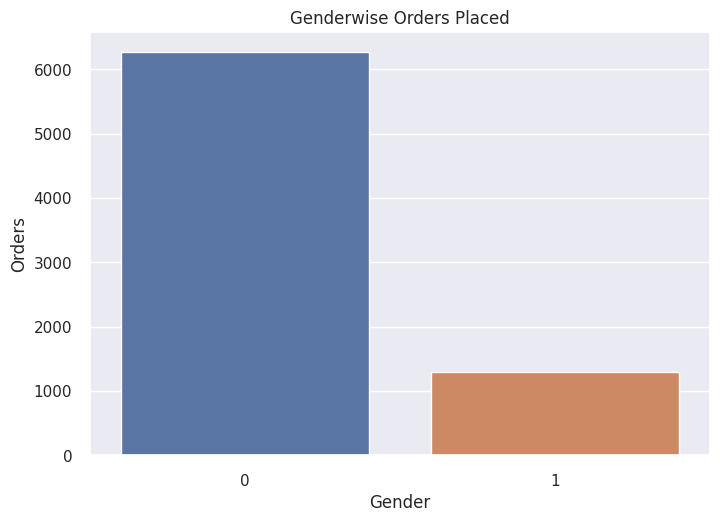

In [295]:
sns.barplot(data= clust_1 , x='Gender', y='Orders')
plt.title('Genderwise Orders Placed')


In [296]:
import plotly.graph_objects as go

# Create bar plot using Plotly
fig = go.Figure(data=go.Bar(x=clust_1['Gender'],
                           y=clust_1['Orders']))

# Update layout
fig.update_layout(title='Genderwise Orders Placed',
                  xaxis_title='Gender',
                  yaxis_title='Orders')

# Show the figure
fig.show()


Text(0.5, 1.0, 'Genderwise Total Brands Searched')

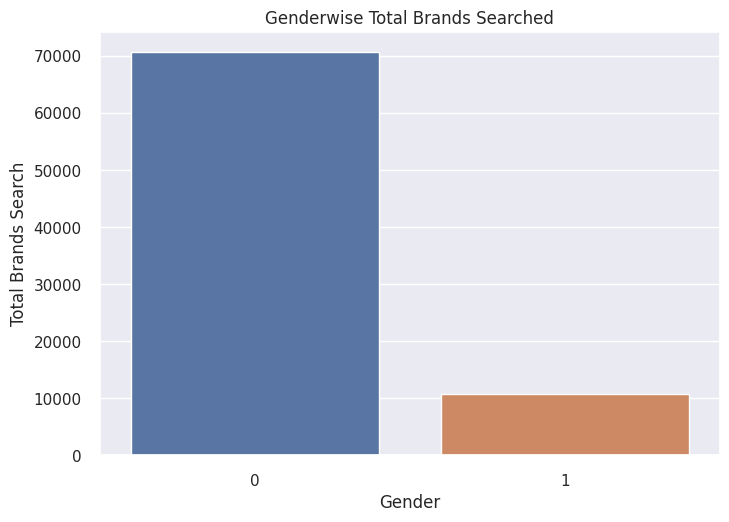

In [297]:
sns.barplot(data=clust_1 , x='Gender', y='Total Brands Search')
plt.title('Genderwise Total Brands Searched')


In [298]:
import plotly.graph_objects as go

# Create bar plot using Plotly
fig = go.Figure(data=go.Bar(x=clust_1['Gender'],
                           y=clust_1['Total Brands Search']))

# Update layout
fig.update_layout(title='Genderwise Total Brands Searched',
                  xaxis_title='Gender',
                  yaxis_title='Total Brands Search')

# Show the figure
fig.show()


In [299]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Genderwise Total Brands Searched', 'Genderwise Orders Placed'])

# Add bar plot for Total Brands Searched
fig.add_trace(go.Bar(x=clust_1['Gender'],
                     y=clust_1['Total Brands Search']),
              row=1, col=1)

# Add bar plot for Orders Placed
fig.add_trace(go.Bar(x=clust_1['Gender'],
                     y=clust_1['Orders']),
              row=1, col=2)

# Update layout
fig.update_layout(height=500, width=900, title='Genderwise Total Brands Searched and Orders Placed')
fig.update_xaxes(title_text='Gender', row=1, col=1)
fig.update_xaxes(title_text='Gender', row=1, col=2)
fig.update_yaxes(title_text='Total Brands Search', row=1, col=1)
fig.update_yaxes(title_text='Orders', row=1, col=2)

# Show the figure
fig.show()


**CLUSTER 2**

In [300]:
clust_2 = df3.groupby(['Cluster_A','Gender'],as_index=False).sum()
clust_2 = clust_2.loc[clust_2['Cluster_A'] == 2]

In [301]:
clust_2

Cluster_A  Gender    Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  \
4          2       0  106470376   30755    1923      1603     1725  1414   
5          2       1   21374453    6894     521       748      321    22   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
4  1185                    1108       937   517   581     876  2782   
5    55                     147        10   444   173     276   114   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
4         1492   1102             1221     829   2231      317          5476   
5          218    142              123      98    594       89          1106   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry   Mi   LG  Dior  Scabal  \
4       1718     3482    2003     804  225      3492  982  730  2039    3092   
5        386      670     344     179   64       304   67   57   246     104   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
4            1196        649         463      1335        865        665   
5             117         56          41       294        193        110   

   Kraft  Total Brands Search  
4    491                51550  
5    110                 8543

Text(0.5, 1.0, 'Customers count')

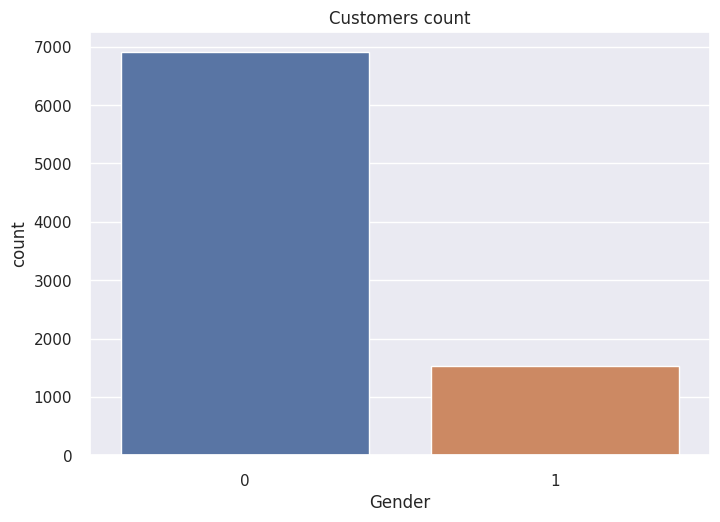

In [302]:
sns.countplot(data=df3.query('Cluster_A == 2') , x='Gender')
plt.title('Customers count')


Text(0.5, 1.0, 'Genderwise Orders Placed')

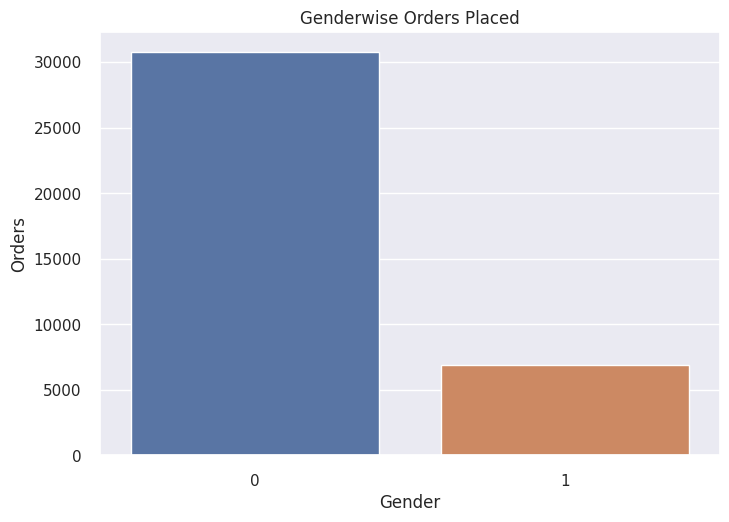

In [303]:
sns.barplot(data= clust_2 , x='Gender', y='Orders')
plt.title('Genderwise Orders Placed')


In [304]:
import plotly.graph_objects as go

# Create bar plot using Plotly
fig = go.Figure(data=go.Bar(x=clust_2['Gender'],
                           y=clust_2['Orders']))

# Update layout
fig.update_layout(title='Genderwise Orders Placed',
                  xaxis_title='Gender',
                  yaxis_title='Orders')

# Show the figure
fig.show()


Text(0.5, 1.0, 'Genderwise Total Brands Searched')

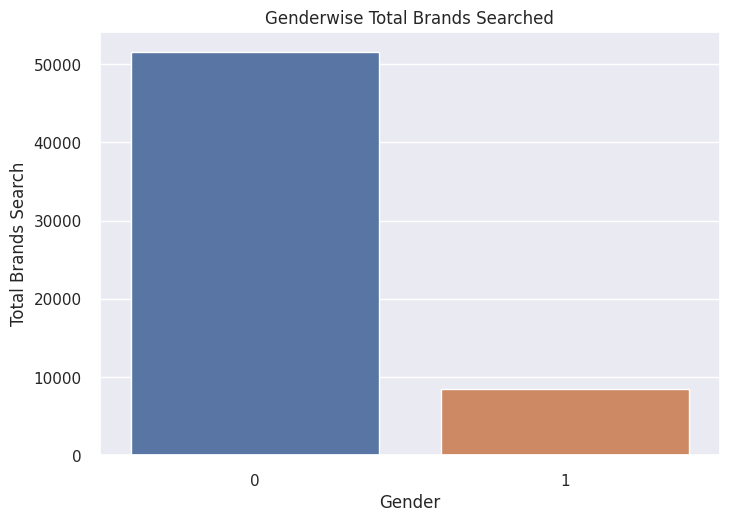

In [305]:
sns.barplot(data=clust_2 , x='Gender', y='Total Brands Search')
plt.title('Genderwise Total Brands Searched')


In [306]:
import plotly.graph_objects as go

# Create bar plot using Plotly
fig = go.Figure(data=go.Bar(x=clust_2['Gender'],
                           y=clust_2['Total Brands Search']))

# Update layout
fig.update_layout(title='Genderwise Total Brands Searched',
                  xaxis_title='Gender',
                  yaxis_title='Total Brands Search')

# Show the figure
fig.show()


In [307]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=['Customers Count', 'Genderwise Orders Placed', 'Genderwise Total Brands Searched'])

# First subplot - Customers Count
fig.add_trace(go.Bar(x=df3.query('Cluster_A == 2')['Gender'].value_counts().index,
                     y=df3.query('Cluster_A == 2')['Gender'].value_counts().values),
              row=1, col=1)
fig.update_xaxes(title_text='Gender', row=1, col=1)
fig.update_yaxes(title_text='Count', row=1, col=1)

# Second subplot - Genderwise Orders Placed
fig.add_trace(go.Bar(x=clust_2['Gender'],
                     y=clust_2['Orders']),
              row=1, col=2)
fig.update_xaxes(title_text='Gender', row=1, col=2)
fig.update_yaxes(title_text='Orders', row=1, col=2)

# Third subplot - Genderwise Total Brands Searched
fig.add_trace(go.Bar(x=clust_2['Gender'],
                     y=clust_2['Total Brands Search']),
              row=1, col=3)
fig.update_xaxes(title_text='Gender', row=1, col=3)
fig.update_yaxes(title_text='Total Brands Search', row=1, col=3)

# Update layout
fig.update_layout(height=400, width=900, title='Customers Count, Genderwise Orders Placed, and Genderwise Total Brands Searched')

# Show the figure
fig.show()


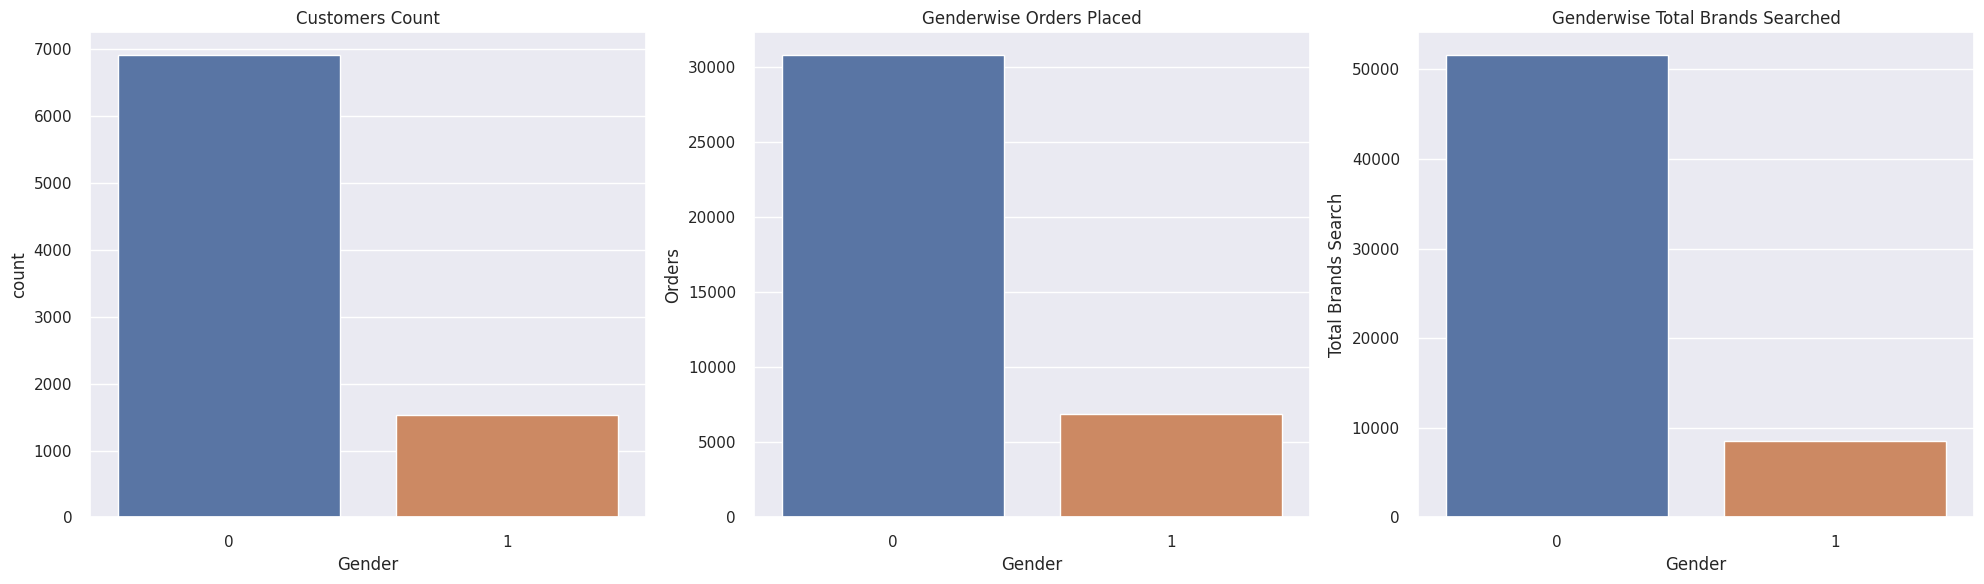

In [308]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# First subplot - Countplot
sns.countplot(data=df3.query('Cluster_A == 2'), x='Gender', ax=axes[0])
axes[0].set_title('Customers Count')

# Second subplot - Barplot for Orders Placed
sns.barplot(data=clust_2, x='Gender', y='Orders', ax=axes[1])
axes[1].set_title('Genderwise Orders Placed')

# Third subplot - Barplot for Total Brands Searched
sns.barplot(data=clust_2, x='Gender', y='Total Brands Search', ax=axes[2])
axes[2].set_title('Genderwise Total Brands Searched')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


Group 0: Customers with Least Orders and Highest Total Brands Search

These customers have placed the least number of orders but have shown a high level of interest in exploring different brands.
They are likely to be highly engaged in product research and comparison.
Strategies for this group could include targeted marketing of trendy and popular products to encourage conversions and purchases.
Offering personalized recommendations based on their brand search history can also be effective in driving their engagement and purchase behavior.

***CLUSTERED ANALYSIS BASED ON ORDERS***

In [309]:
clust_a = df3.groupby(['Cluster_A','Gender'],as_index=False).sum()
clust_a

Cluster_A  Gender    Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0       0  154699357    6269    2470      1947     2086  1813   
1          0       1   28245384    1291     601       777      435    12   
2          1       0  116501910   65606    1982      1678     1780  1565   
3          1       1   22723520   14279     526       817      341    14   
4          2       0  106470376   30755    1923      1603     1725  1414   
5          2       1   21374453    6894     521       748      321    22   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  1632                    1480      1266   802   999    1265  3534   
1    75                     162        17   515   267     419   159   
2  1308                    1145       958   569   654    1019  3131   
3    51                     151        20   496   154     349   126   
4  1185                    1108       937   517   581     876  2782   
5    55                     147        10   444   173     276   114   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         2372   1463             1744    1190   2682      454          7497   
1          368    169              216     130    610       95          1319   
2         1571   1246             1389     835   2252      375          5943   
3          259    122              140     101    638      112          1303   
4         1492   1102             1221     829   2231      317          5476   
5          218    142              123      98    594       89          1106   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       2421     4902    2584    1184  323      4690  1349  1239  3041   
1        506      902     437     269   89       382    88   126   283   
2       1954     3489    2079     848  181      3684  1073   864  2241   
3        452      680     293     279   77       289    81    60   284   
4       1718     3482    2003     804  225      3492   982   730  2039   
5        386      670     344     179   64       304    67    57   246   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    4194            1807        847         654      1960       1153   
1     175             172         83          55       386        186   
2    3440            1322        605         465      1465        918   
3      97             155         90          42       326        176   
4    3092            1196        649         463      1335        865   
5     104             117         56          41       294        193   

   Jiffy mix  Kraft  Total Brands Search  
0        870    776                70690  
1        160    142                10787  
2        713    510                55251  
3        123     98                 9322  
4        665    491                51550  
5        110    110                 8543

In [310]:
clust_a1 = df3.groupby(['Cluster_A'],as_index=False).sum()
clust_a1

Cluster_A    Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0  182944741    2070    7560    3071      2724     2521  1825   
1          1  139225430    1620   79885    2508      2495     2121  1579   
2          2  127844829    1532   37649    2444      2351     2046  1436   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  1707                    1642      1283  1317  1266    1684  3693   
1  1359                    1296       978  1065   808    1368  3257   
2  1240                    1255       947   961   754    1152  2896   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         2740   1632             1960    1320   3292      549          8816   
1         1830   1368             1529     936   2890      487          7246   
2         1710   1244             1344     927   2825      406          6582   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       2927     5804    3021    1453  412      5072  1437  1365  3324   
1       2406     4169    2372    1127  258      3973  1154   924  2525   
2       2104     4152    2347     983  289      3796  1049   787  2285   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    4369            1979        930         709      2346       1339   
1    3537            1477        695         507      1791       1094   
2    3196            1313        705         504      1629       1058   

   Jiffy mix  Kraft  Total Brands Search  
0       1030    918                81477  
1        836    608                64573  
2        775    601                60093

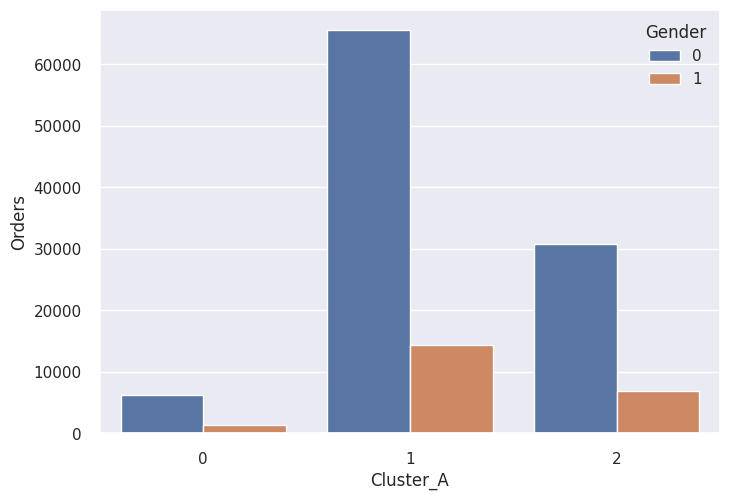

In [311]:
sns.barplot(data=clust_a , x='Cluster_A', y='Orders', hue = 'Gender')
plt.show()

In [312]:
import plotly.express as px

fig = px.bar(clust_a, x='Cluster_A', y='Orders', color='Gender')
fig.show()


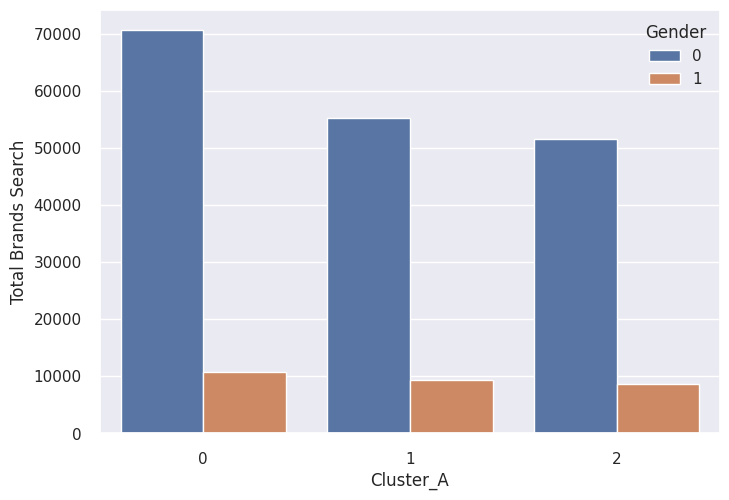

In [313]:
sns.barplot(data=clust_a , x='Cluster_A', y='Total Brands Search', hue = 'Gender')
plt.show()

In [314]:
import plotly.express as px

fig = px.bar(clust_a, x='Cluster_A', y='Total Brands Search', color='Gender')
fig.show()


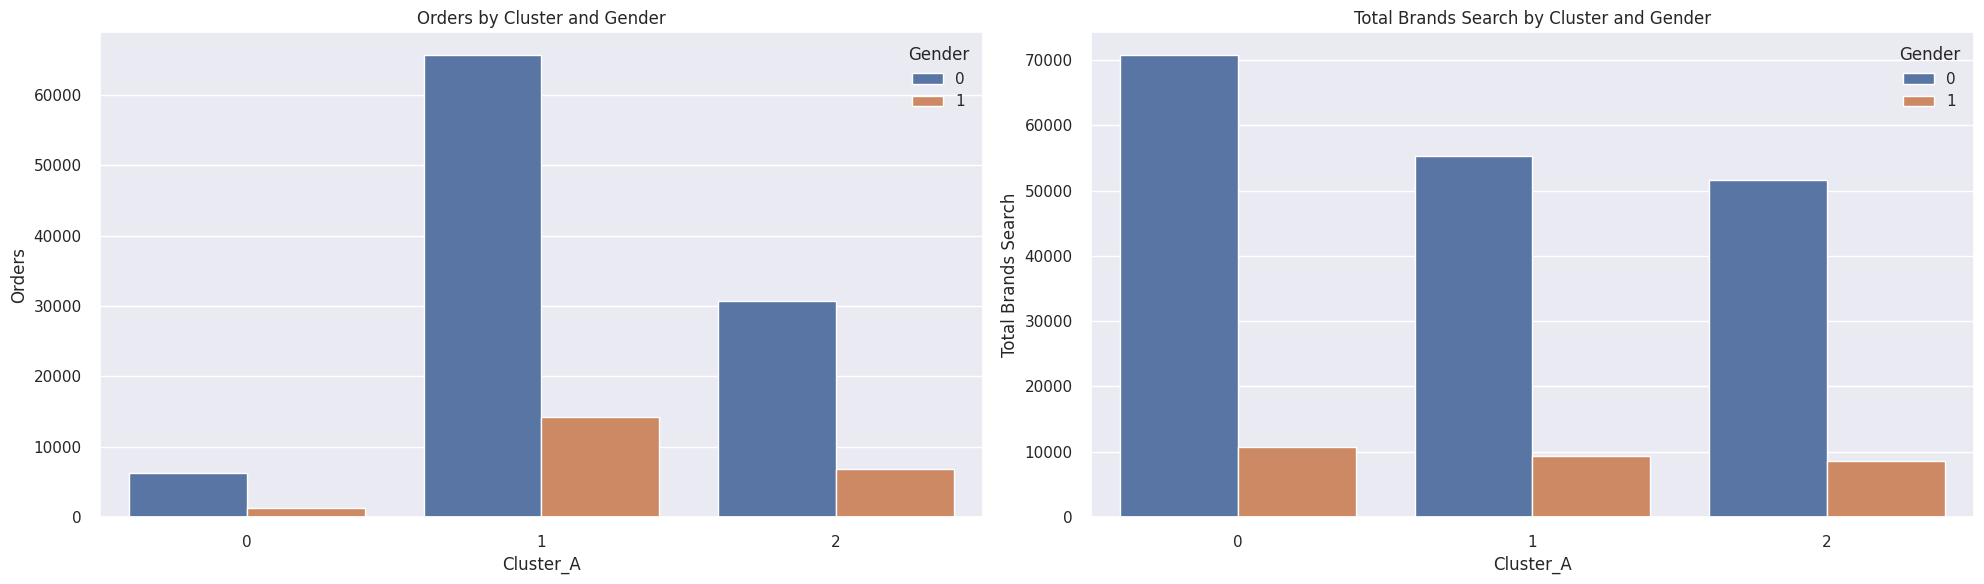

In [315]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(data=clust_a, x='Cluster_A', y='Orders', hue='Gender', ax=axes[0])
axes[0].set_title('Orders by Cluster and Gender')

sns.barplot(data=clust_a, x='Cluster_A', y='Total Brands Search', hue='Gender', ax=axes[1])
axes[1].set_title('Total Brands Search by Cluster and Gender')

plt.tight_layout()
plt.show()


In [316]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2, subplot_titles=('Orders by Cluster and Gender', 'Total Brands Search by Cluster and Gender'))

# Add the first subplot (Orders by Cluster and Gender)
fig.add_trace(go.Bar(x=clust_a['Cluster_A'], y=clust_a['Orders'], marker_color=clust_a['Gender'], legendgroup='Gender', name='Orders'),
              row=1, col=1)

# Add the second subplot (Total Brands Search by Cluster and Gender)
fig.add_trace(go.Bar(x=clust_a['Cluster_A'], y=clust_a['Total Brands Search'], marker_color=clust_a['Gender'], legendgroup='Gender', name='Total Brands Search'),
              row=1, col=2)

# Update the layout
fig.update_layout(showlegend=False, height=500, width=900)

# Show the plot
fig.show()


In [317]:
clust_a1

Cluster_A    Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0  182944741    2070    7560    3071      2724     2521  1825   
1          1  139225430    1620   79885    2508      2495     2121  1579   
2          2  127844829    1532   37649    2444      2351     2046  1436   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0  1707                    1642      1283  1317  1266    1684  3693   
1  1359                    1296       978  1065   808    1368  3257   
2  1240                    1255       947   961   754    1152  2896   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         2740   1632             1960    1320   3292      549          8816   
1         1830   1368             1529     936   2890      487          7246   
2         1710   1244             1344     927   2825      406          6582   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       2927     5804    3021    1453  412      5072  1437  1365  3324   
1       2406     4169    2372    1127  258      3973  1154   924  2525   
2       2104     4152    2347     983  289      3796  1049   787  2285   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    4369            1979        930         709      2346       1339   
1    3537            1477        695         507      1791       1094   
2    3196            1313        705         504      1629       1058   

   Jiffy mix  Kraft  Total Brands Search  
0       1030    918                81477  
1        836    608                64573  
2        775    601                60093

# CONCLUSION
## ANALYSIS BASED ON ORDERS

Group 0: 
      Customers with Least Orders and Highest Total Brands Search

* Orders : 7560
* Total Brands Search : 81477
*  These customers have placed the least number of orders but have shown a high level of interest in exploring different brands.
*  They are likely to be highly engaged in product research and comparison.
*  Strategies for this group could include targeted marketing of trendy and popular products to encourage conversions and purchases.
*  Offering personalized recommendations based on their brand search history can also be effective in driving their engagement and purchase behavior.

Group 1: Customers with Highest Orders and Less Total Brands Search compared to Group 0

* Orders : 79885
* Total Brands Search : 64573
* This group consists of customers who have placed the highest number of orders but have relatively fewer brand searches.
* They may have established preferences and loyalty towards certain brands, leading to fewer brand exploration activities.
* Strategies for this group can focus on enhancing customer loyalty, such as providing exclusive offers and rewards for repeat purchases.
* Upselling and cross-selling techniques can be employed to introduce them to new brands and products that align with their preferences.

Group 2: Customers with Orders Higher than Group 0 and Less than Group 1, and Least Total Brands Search

* Orders : 37649
* Total Brands Search : 60093
* These customers fall in between Group 0 and Group 1 in terms of order frequency and brand search activity.
* They have placed more orders compared to Group 0 but still fewer than Group 1, and they show less interest in exploring a wide range of brands.
* Targeting this group might involve a balanced approach, emphasizing both product recommendations based on their existing preferences and introducing them to new brands and products.
* Providing incentives, such as limited-time discounts and promotions, can encourage them to try out new brands and increase their brand exploration activities.




# ANALYSIS BASED ON ORDERS AND TOTAL BRANDS SEARCH


In [318]:
df2.head()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1       1       7       0         0        0     0     0   
1        2       0       0       0         1        0     0     0   
2        3       1       7       0         1        0     0     0   
3        4       0       0       0         0        0     0     0   
4        5       0      10       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
0                       0         0     2     0       0    0            0   
1                       0         0     0     0       0    1            0   
2                       0         0     0     0       0    0            0   
3                       0         0     0     0       0    1            0   
4                       0         0     0     0       0    0            1   

   Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  Pop Chips  \
0      0                0       0      0        0             0          0   
1      0                0       0      0        0             2          2   
2      0                0       0      2        0             1          0   
3      0                0       0      0        0             0          1   
4      0                0       5      1        0             3          0   

   Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  Scabal  \
0        0       0       0    0         0   0   0     0       0   
1        1       0       0    0         6   4   0     1       0   
2        0       0       0    0         0   0   0     0       0   
3        0       0       0    0         0   0   0     0       0   
4        1       0       0    0         1   0   0     0       2   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0               0          0           0         0          0          0   
1               0          0           0         0          0          0   
2               0          0           0         0          1          0   
3               0          0           0         0          0          0   
4               0          0           0         0          0          1   

   Kraft  Total Brands Search  Cluster_A  
0      0                    2          1  
1      0                   18          0  
2      0                    5          1  
3      0                    2          0  
4      1                   16          1

In [319]:
df_ord_tb = df2.copy()

In [320]:
df_ord_tb.head()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1       1       7       0         0        0     0     0   
1        2       0       0       0         1        0     0     0   
2        3       1       7       0         1        0     0     0   
3        4       0       0       0         0        0     0     0   
4        5       0      10       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
0                       0         0     2     0       0    0            0   
1                       0         0     0     0       0    1            0   
2                       0         0     0     0       0    0            0   
3                       0         0     0     0       0    1            0   
4                       0         0     0     0       0    0            1   

   Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  Pop Chips  \
0      0                0       0      0        0             0          0   
1      0                0       0      0        0             2          2   
2      0                0       0      2        0             1          0   
3      0                0       0      0        0             0          1   
4      0                0       5      1        0             3          0   

   Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  Scabal  \
0        0       0       0    0         0   0   0     0       0   
1        1       0       0    0         6   4   0     1       0   
2        0       0       0    0         0   0   0     0       0   
3        0       0       0    0         0   0   0     0       0   
4        1       0       0    0         1   0   0     0       2   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0               0          0           0         0          0          0   
1               0          0           0         0          0          0   
2               0          0           0         0          1          0   
3               0          0           0         0          0          0   
4               0          0           0         0          0          1   

   Kraft  Total Brands Search  Cluster_A  
0      0                    2          1  
1      0                   18          0  
2      0                    5          1  
3      0                    2          0  
4      1                   16          1

In [321]:
df_ord_tb = df_ord_tb.iloc[:, [2, 38]]
# The meaning of this code is to create a new DataFrame (df_ord_tb) that contains only the columns at index 2 and 38 from the original DataFrame df_ord_tb. 

In [322]:
df_ord_tb.head()

Orders  Total Brands Search
0       7                    2
1       0                   18
2       7                    5
3       0                    2
4      10                   16

In [323]:
Y = df_ord_tb.values

In [324]:
Y

array([[ 7,  2],
       [ 0, 18],
       [ 7,  5],
       ...,
       [ 0,  2],
       [ 0,  1],
       [ 3,  5]])

**ELBOW METHOD**

In [325]:
inertia_1=[]
for n in range(1,16):
  algorithm_1=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  algorithm_1.fit(Y)
  inertia_1.append(algorithm_1.inertia_)

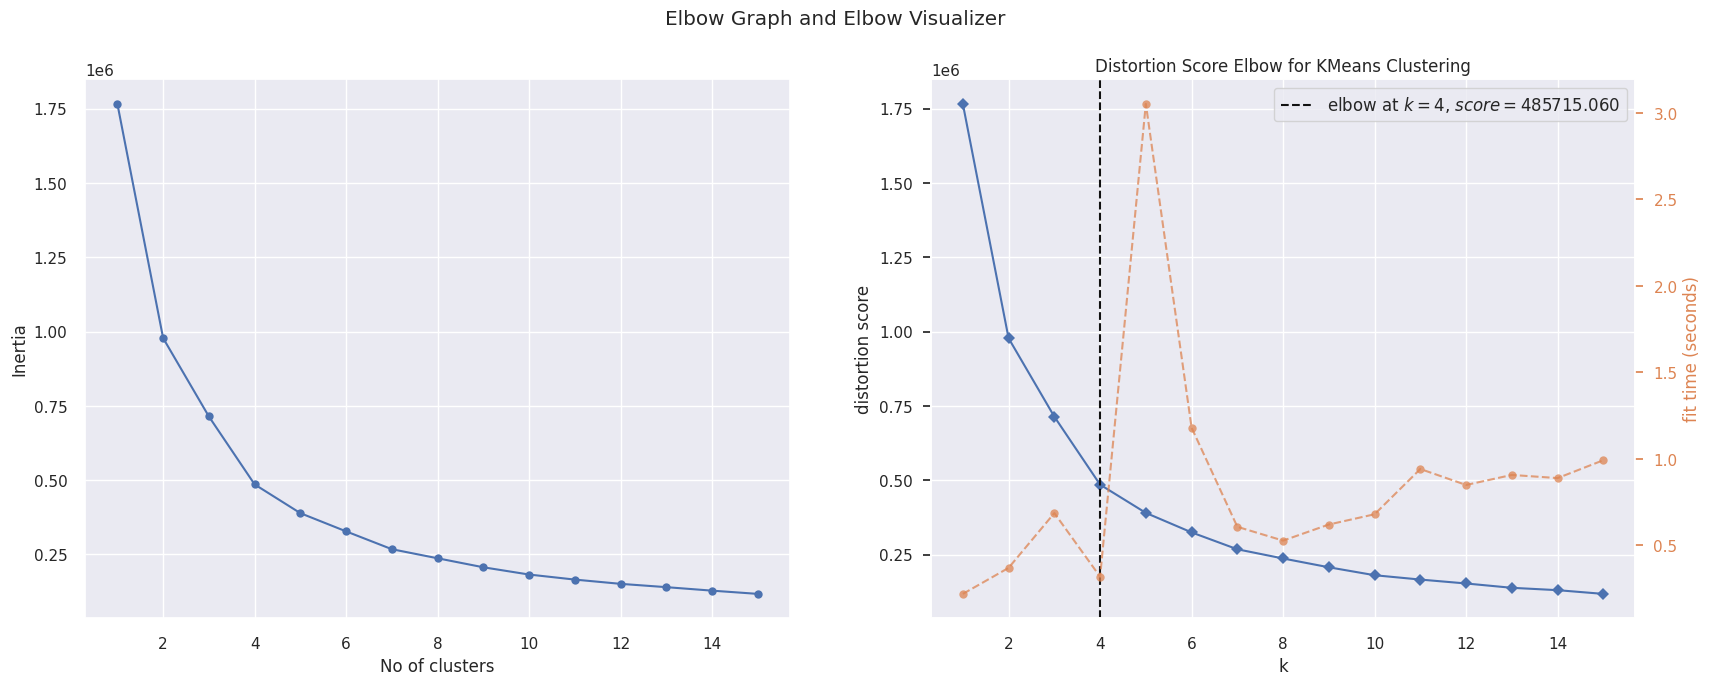

In [326]:
# elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,16), inertia_1, 'bo-')
plt.xlabel('No of clusters'), plt.ylabel('Inertia')

# Kelbow visualizer
plt.subplot(1,2,2)
kmeans = KMeans()
visualize = KElbowVisualizer(kmeans,k=(1,16))
visualize.fit(Y)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()
     

SILHOUTTE ANALYSIS FOR OPTIMAL K VALUE


In [327]:
from sklearn.metrics import silhouette_score

silhouette_avg_1 = []
for n in range(2,6):
  cluster_labels_1=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  cluster_labels_1=cluster_labels_1.fit_predict(Y)
  silhouette_avg_1.append(silhouette_score(Y,cluster_labels_1))


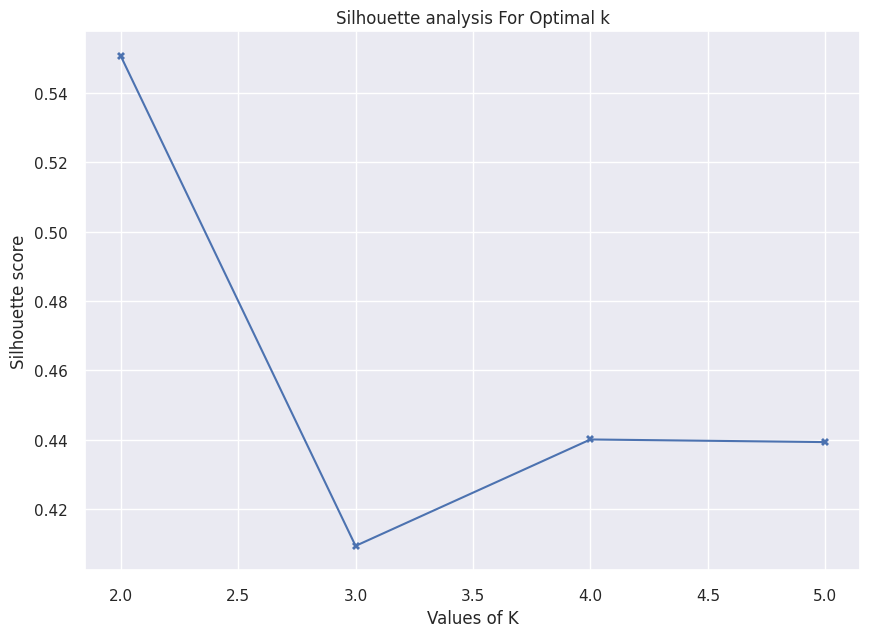

In [328]:
plt.figure(figsize=(10,7))
plt.plot(range(2,6),silhouette_avg_1,'bX-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [329]:
model_1 = KMeans(n_clusters=4)
model_1 = model_1.fit(Y)
mp2 = model_1.predict(Y)
centers = model_1.cluster_centers_ 

df2['Cluster_B'] = pd.DataFrame(mp2)



In [330]:
df2['Cluster_B'].value_counts()

0    12925
3     9969
1     6130
2      976
Name: Cluster_B, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

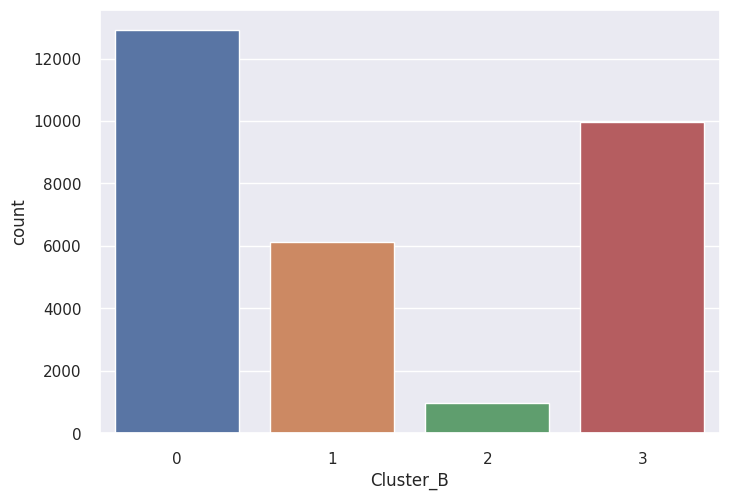

In [331]:
sns.countplot(data=df2,x='Cluster_B')
plt.show

In [332]:
clust_b = df2.groupby(['Cluster_B','Gender'],as_index=False).sum()

In [333]:
clust_b

Cluster_B  Gender    Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0       0  153405982   13285    1407      1120     1089   973   
1          0       1   32734644    3269     516       769      404     9   
2          1       0   88861841   23105    2796      2336     2648  2374   
3          1       1   10484238    3064     552       712      270    20   
4          2       0   15222346    3769    1014       771      760   553   
5          2       1    1313061     424      96       101      120     4   
6          3       0  120181474   62471    1158      1001     1094   892   
7          3       1   27811414   15707     484       760      303    15   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0   901                    1036       731   444   638     714  2297   
1    72                     169        16   392   190     342   137   
2  1948                    1485      1403   768   889    1275  3818   
3    60                     123        12   576   246     323    99   
4   513                     411       407   377   253     576  1194   
5     5                      19        10    88    24      58    42   
6   763                     801       620   299   454     595  2138   
7    44                     149         9   399   134     321   121   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0          800   1007             1334     403   1402      303          5387   
1          204    137              226      53    447       74          1231   
2         1985   1433             1539    1184   3332      492          6530   
3          331    140               94     155    665      102          1020   
4         1996    500              434     963   1220      139          2501   
5          163     36               16      73    252       43           254   
6          654    871             1047     304   1211      212          4498   
7          147    120              143      48    478       77          1223   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       1453     2952    1474     725  249      2113   876   644  1887   
1        426      545     294     166   72       213    86    87   246   
2       2174     4942    3135    1163  248      5094  1415  1039  3070   
3        435      776     465     243   65       409    65    55   233   
4       1275     1683     862     389   83      2766   393   741   862   
5        137      432      83     168   47       157    16    52    68   
6       1191     2296    1195     559  149      1893   720   409  1502   
7        346      499     232     150   46       196    69    49   266   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    3095            1008        522         395      1215        755   
1     169             146         71          51       291        155   
2    4126            1808        886         645      1785       1104   
3      74             141         55          38       398        201   
4     950             750        333         272       814        423   
5      21              46          8           8        71         61   
6    2555             759        360         270       946        654   
7     112             111         95          41       246        138   

   Jiffy mix  Kraft  Total Brands Search  Cluster_A  
0        443    393                42185       5030  
1        122     82                 8610       1244  
2        926    709                72504       5299  
3        147    147                 9447        704  
4        421    439                28038        779  
5         36     53                 2868         91  
6        458    236                34764      10216  
7         88     68                 7727       2645

In [334]:
clust_b1 = df2.groupby(['Cluster_B'],as_index=False).sum()
clust_b1

Cluster_B    Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0  186140626    2392   16554    1923      1889     1493   982   
1          1   99346079     725   26169    3348      3048     2918  2394   
2          2   16535407      92    4193    1110       872      880   557   
3          3  147992888    2013   78178    1642      1761     1397   907   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0   973                    1205       747   836   828    1056  2434   
1  2008                    1608      1415  1344  1135    1598  3917   
2   518                     430       417   465   277     634  1236   
3   807                     950       629   698   588     916  2259   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         1004   1144             1560     456   1849      377          6618   
1         2316   1573             1633    1339   3997      594          7550   
2         2159    536              450    1036   1472      182          2755   
3          801    991             1190     352   1689      289          5721   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       1879     3497    1768     891  321      2326   962   731  2133   
1       2609     5718    3600    1406  313      5503  1480  1094  3303   
2       1412     2115     945     557  130      2923   409   793   930   
3       1537     2795    1427     709  195      2089   789   458  1768   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    3264            1154        593         446      1506        910   
1    4200            1949        941         683      2183       1305   
2     971             796        341         280       885        484   
3    2667             870        455         311      1192        792   

   Jiffy mix  Kraft  Total Brands Search  Cluster_A  
0        565    475                50795       6274  
1       1073    856                81951       6003  
2        457    492                30906        870  
3        546    304                42491      12861

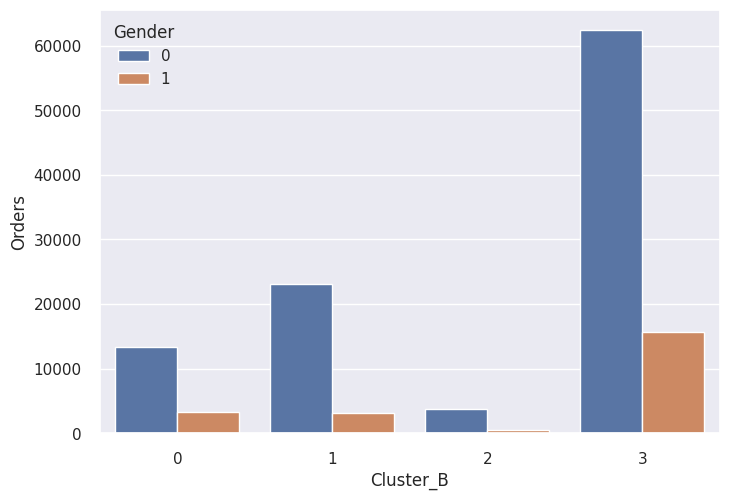

In [335]:
sns.barplot(data=clust_b , x='Cluster_B', y='Orders', hue = 'Gender')
plt.show()

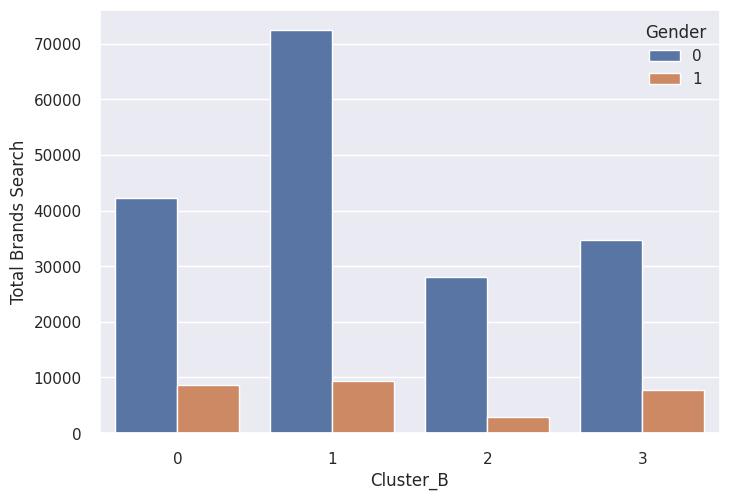

In [336]:
sns.barplot(data=clust_b , x='Cluster_B', y='Total Brands Search', hue = 'Gender')
plt.show()

<Axes: xlabel='Orders', ylabel='count'>

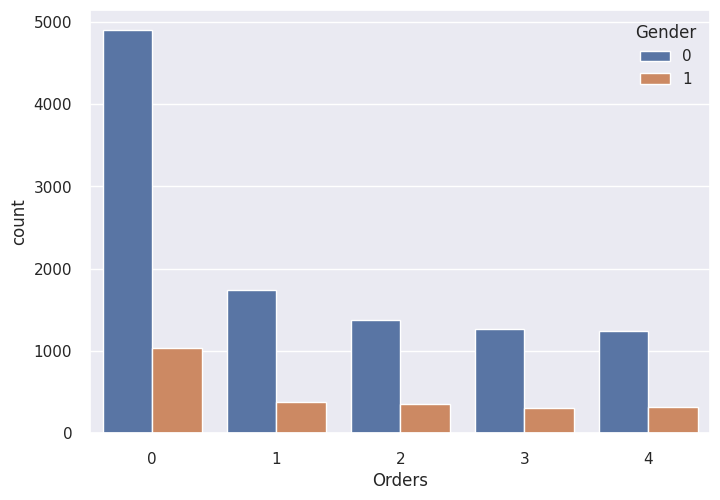

In [337]:
sns.countplot(data=df2.query('Cluster_B == 0') , x='Orders', hue = 'Gender')

<Axes: xlabel='Orders', ylabel='count'>

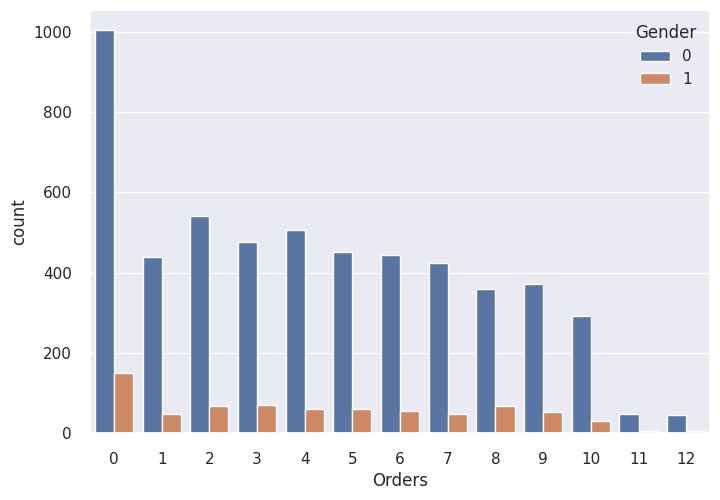

In [338]:
sns.countplot(data=df2.query('Cluster_B == 1') , x='Orders', hue = 'Gender')

<Axes: xlabel='Orders', ylabel='count'>

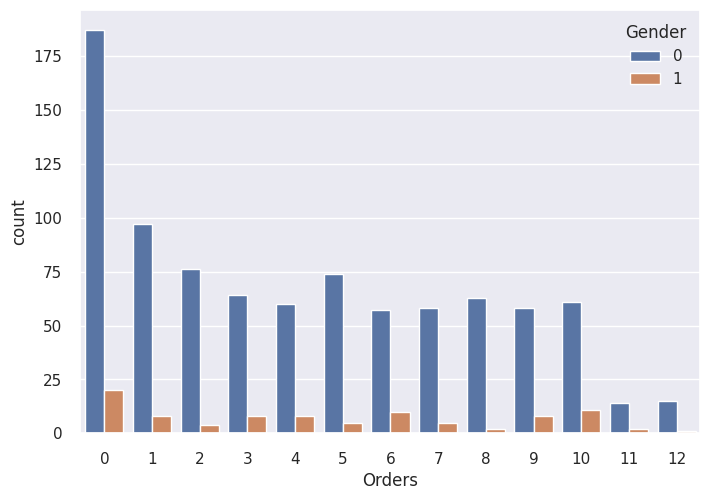

In [339]:
sns.countplot(data=df2.query('Cluster_B == 2') , x='Orders', hue = 'Gender')

<Axes: xlabel='Orders', ylabel='count'>

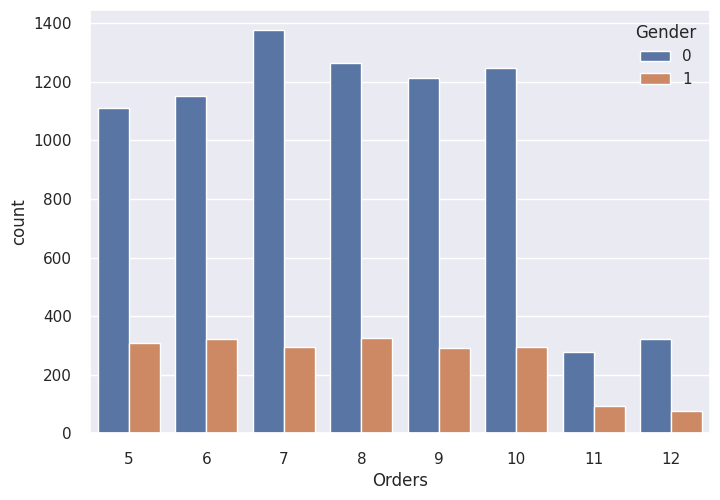

In [340]:
sns.countplot(data=df2.query('Cluster_B == 3') , x='Orders', hue = 'Gender')

<Axes: xlabel='Total Brands Search', ylabel='count'>

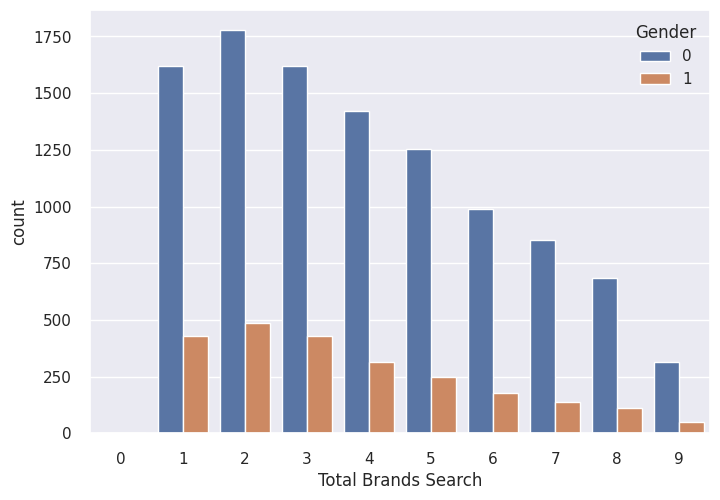

In [341]:
sns.countplot(data=df2.query('Cluster_B == 0') , x='Total Brands Search', hue = 'Gender')

<Axes: xlabel='Total Brands Search', ylabel='count'>

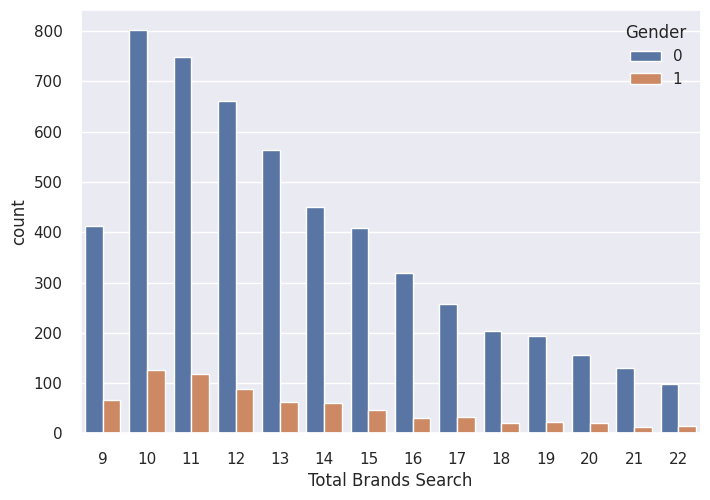

In [342]:
sns.countplot(data=df2.query('Cluster_B == 1') , x='Total Brands Search', hue = 'Gender')

<Axes: xlabel='Total Brands Search', ylabel='count'>

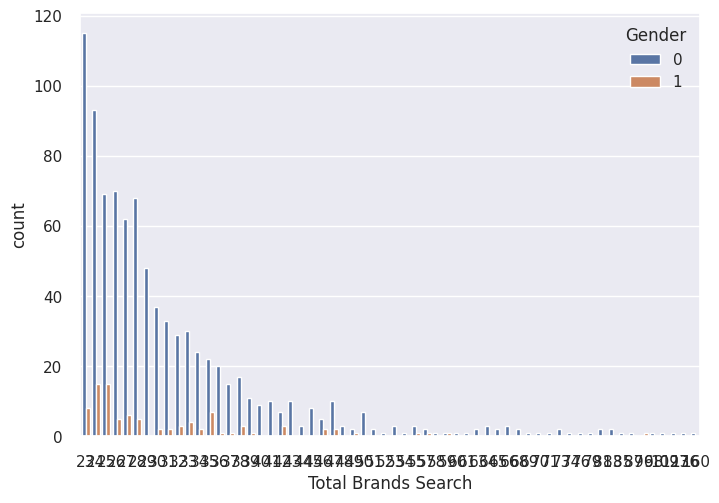

In [343]:
sns.countplot(data=df2.query('Cluster_B == 2') , x='Total Brands Search', hue = 'Gender')

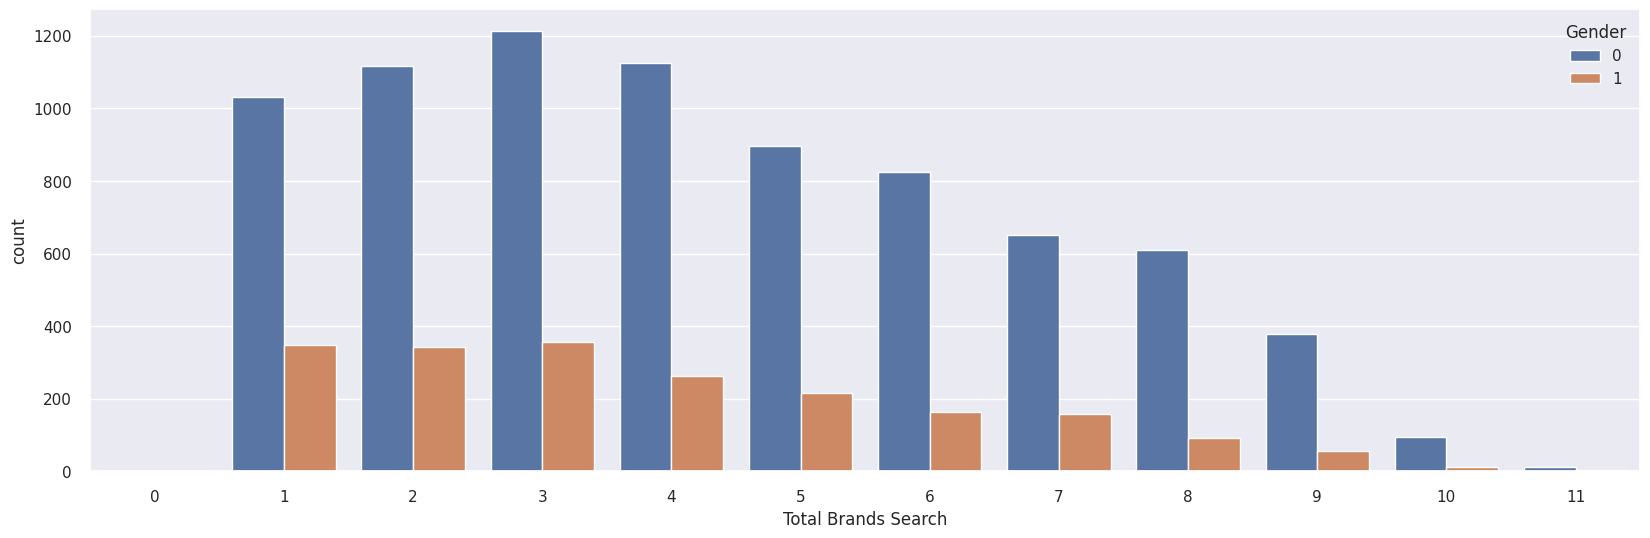

In [344]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df2.query('Cluster_B == 3') , x='Total Brands Search', hue = 'Gender')

plt.show()

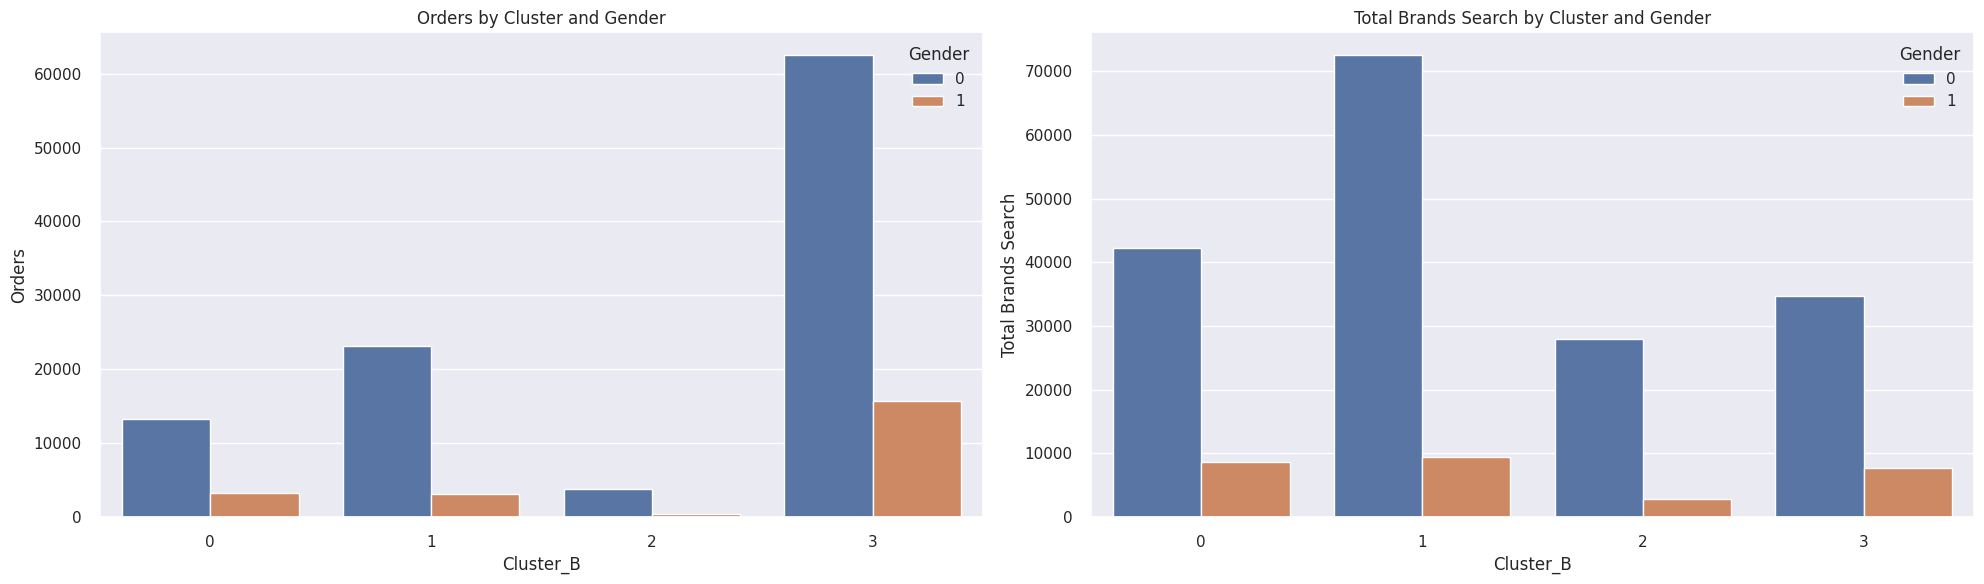

In [345]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(data=clust_b, x='Cluster_B', y='Orders', hue='Gender', ax=axes[0])
axes[0].set_title('Orders by Cluster and Gender')

sns.barplot(data=clust_b, x='Cluster_B', y='Total Brands Search', hue='Gender', ax=axes[1])
axes[1].set_title('Total Brands Search by Cluster and Gender')

plt.tight_layout()
plt.show()


In [346]:
clust_b1

Cluster_B    Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0  186140626    2392   16554    1923      1889     1493   982   
1          1   99346079     725   26169    3348      3048     2918  2394   
2          2   16535407      92    4193    1110       872      880   557   
3          3  147992888    2013   78178    1642      1761     1397   907   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0   973                    1205       747   836   828    1056  2434   
1  2008                    1608      1415  1344  1135    1598  3917   
2   518                     430       417   465   277     634  1236   
3   807                     950       629   698   588     916  2259   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0         1004   1144             1560     456   1849      377          6618   
1         2316   1573             1633    1339   3997      594          7550   
2         2159    536              450    1036   1472      182          2755   
3          801    991             1190     352   1689      289          5721   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0       1879     3497    1768     891  321      2326   962   731  2133   
1       2609     5718    3600    1406  313      5503  1480  1094  3303   
2       1412     2115     945     557  130      2923   409   793   930   
3       1537     2795    1427     709  195      2089   789   458  1768   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0    3264            1154        593         446      1506        910   
1    4200            1949        941         683      2183       1305   
2     971             796        341         280       885        484   
3    2667             870        455         311      1192        792   

   Jiffy mix  Kraft  Total Brands Search  Cluster_A  
0        565    475                50795       6274  
1       1073    856                81951       6003  
2        457    492                30906        870  
3        546    304                42491      12861

# CONCLUSION

##  ANALYSIS BASED ON ORDERS AND TOTAL BRANDS SEARCHES

Cluster 0:
* Orders: 25458
* Total Brands Searched: 81161 [ Highest ] 

Cluster 1:
* Orders:16554
* Total Brands Searched: 50795

Cluster 2:
* Orders: 78889 [ Highest ]
* Total Brands Searched: 43281

Cluster 3:
* Orders: 4193 [ Least ]
* Total Brands Searched: 30906 [ Least ]

# ANALYSIS BASED ON BRANDS

In [347]:
df4 = df2.copy()

In [348]:
df4.head()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
0        1       1       7       0         0        0     0     0   
1        2       0       0       0         1        0     0     0   
2        3       1       7       0         1        0     0     0   
3        4       0       0       0         0        0     0     0   
4        5       0      10       0         0        0     0     0   

   Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
0                       0         0     2     0       0    0            0   
1                       0         0     0     0       0    1            0   
2                       0         0     0     0       0    0            0   
3                       0         0     0     0       0    1            0   
4                       0         0     0     0       0    0            1   

   Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  Pop Chips  \
0      0                0       0      0        0             0          0   
1      0                0       0      0        0             2          2   
2      0                0       0      2        0             1          0   
3      0                0       0      0        0             0          1   
4      0                0       5      1        0             3          0   

   Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  Scabal  \
0        0       0       0    0         0   0   0     0       0   
1        1       0       0    0         6   4   0     1       0   
2        0       0       0    0         0   0   0     0       0   
3        0       0       0    0         0   0   0     0       0   
4        1       0       0    0         1   0   0     0       2   

   Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  Jiffy mix  \
0               0          0           0         0          0          0   
1               0          0           0         0          0          0   
2               0          0           0         0          1          0   
3               0          0           0         0          0          0   
4               0          0           0         0          0          1   

   Kraft  Total Brands Search  Cluster_A  Cluster_B  
0      0                    2          1          3  
1      0                   18          0          1  
2      0                    5          1          3  
3      0                    2          0          0  
4      1                   16          1          1

In [349]:
df4.tail()

Cust_ID  Gender  Orders  Jordan  Gatorade  Samsung  Asus  Udis  \
29995    29996       1       0       0         0        0     0     0   
29996    29997       1       1       0         1        0     0     0   
29997    29998       1       0       0         1        0     0     0   
29998    29999       1       0       0         0        0     0     0   
29999    30000       0       3       2         0        0     1     0   

       Mondelez International  Wrangler  Vans  Fila  Brooks  H&M  Dairy Queen  \
29995                       0         0     0     0       1    0            0   
29996                       0         0     0     0       0    0            0   
29997                       0         0     1     0       0    0            0   
29998                       0         0     0     0       0    0            0   
29999                       0         0     0     0       0    0            0   

       Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
29995      0                0       0      0        0             0   
29996      0                0       0      0        0             0   
29997      0                0       0      0        0             0   
29998      0                0       0      0        0             0   
29999      0                0       0      0        0             2   

       Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry  Mi  LG  Dior  \
29995          0        0       0       0    0         0   0   0     0   
29996          0        0       0       0    0         0   0   0     0   
29997          0        0       0       0    0         0   0   0     0   
29998          1        0       0       0    0         0   0   0     0   
29999          0        0       0       0    0         0   0   0     0   

       Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
29995       0               0          0           0         0          0   
29996       0               0          0           0         0          0   
29997       0               0          0           0         0          0   
29998       0               0          0           0         0          0   
29999       0               0          0           0         0          0   

       Jiffy mix  Kraft  Total Brands Search  Cluster_A  Cluster_B  
29995          0      0                    1          0          0  
29996          0      0                    1          0          0  
29997          0      0                    2          0          0  
29998          0      0                    1          0          0  
29999          0      0                    5          2          0

In [350]:
Z = df4.iloc[:,3:-3].values

In [351]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]])

ELBOW METHOD

In [352]:
inertia3=[]
for n in range(1,10):
  algorithm3=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  algorithm3.fit(Z)
  inertia3.append(algorithm3.inertia_)

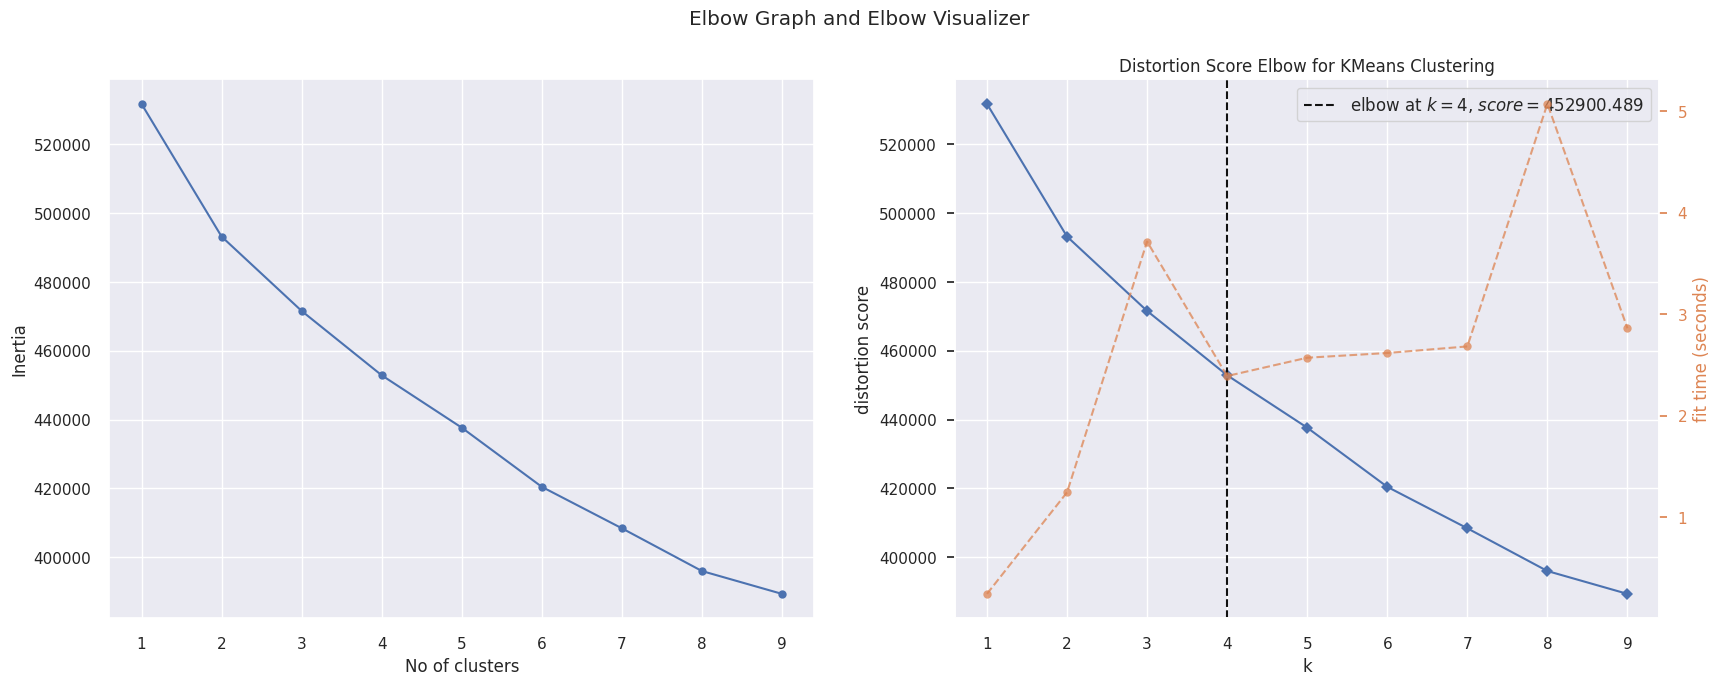

In [353]:
#elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,10), inertia3, 'bo-')
plt.xlabel('No of clusters'), plt.ylabel('Inertia')

#elbow visualizer
plt.subplot(1,2,2)
visualize = KElbowVisualizer(algorithm3,k=(1,10))
visualize.fit(Z)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()

SILHOUTTE ANALYSIS 

In [354]:
silhouette_avg_2 = []
for n in range(2,10):
  cluster_labels_2=(KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,random_state=100))
  cluster_labels_2=cluster_labels_2.fit_predict(Z)
  silhouette_avg_2.append(silhouette_score(Z,cluster_labels_2))
     

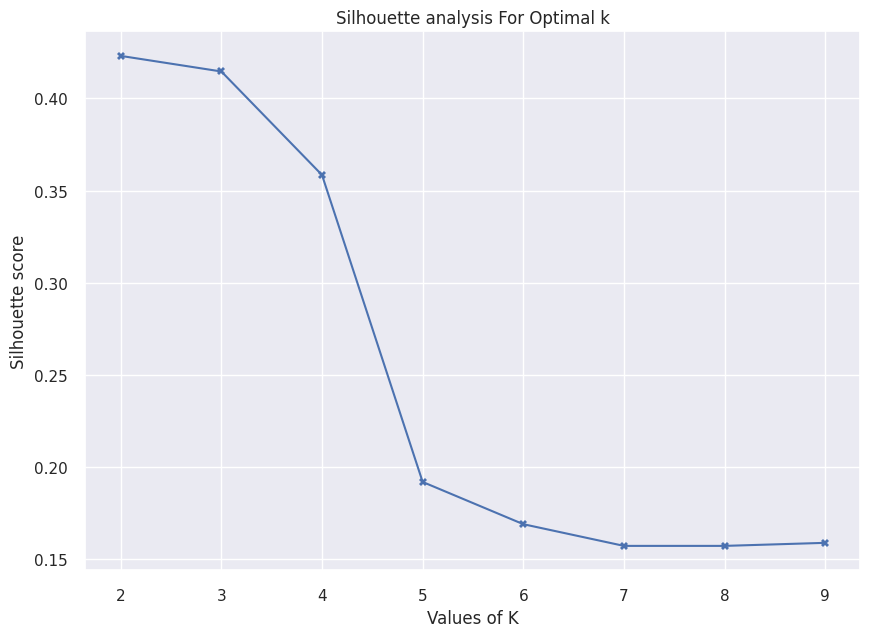

In [355]:
plt.figure(figsize=(10,7))
plt.plot(range(2,10),silhouette_avg_2,'bX-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()
     

In [356]:
model_2 = KMeans(n_clusters=4)
model_2 = model_2.fit(Z)
mp3 = model_2.predict(Z)
centers = model_2.cluster_centers_ 

df2['Cluster_C'] = pd.DataFrame(mp3)



In [357]:
clust_c = df2.groupby(['Cluster_C','Gender'],as_index=False).sum()
clust_c

Cluster_C  Gender    Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0       0   10668869    3182     177       208      167   193   
1          0       1    2791467     949      49        80       24     1   
2          1       0  323796863   87903    4757      3787     4335  3836   
3          1       1   65010044   20151    1426      2077      968    38   
4          2       0   30376161    7791    1179       995      870   560   
5          2       1    2292022     695     124       110       84     7   
6          3       0   12829750    3754     262       238      219   203   
7          3       1    2249824     669      49        75       21     2   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0    96                     115        58    40    92      86   289   
1     4                      21         1    32    45      26    26   
2  3305                    2913      2521  1300  1747    2168  6872   
3   163                     400        31  1278   515     895   303   
4   547                     552       453   477   302     762  1898   
5     9                      20        13    81    21      78    55   
6   177                     153       129    71    93     144   388   
7     5                      19         2    64    13      45    15   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0          121    106               90      72   3462      536           911   
1           33     17               13      13    991      159           353   
2         2055   2821             3477    1182   2506      523         12779   
3          460    353              433     166    706      127          2792   
4         3102    732              632    1509    949       61          4424   
5          300     50               20     133     96        8           431   
6          157    152              155      91    248       26           802   
7           52     13               13      17     49        2           152   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0        230      319     263      92   24       297   148    62   182   
1         93       91      58      40    3        35     7     2    23   
2       3811     5927    4516    1843  514      5441  2513  1612  5430   
3       1003     1022     791     426  150       499   189   162   659   
4       1789     1292     768     238   62      5721   584  1051  1452   
5        189      125      59      33    4       384    30    70    96   
6        263     4335    1119     663  129       407   159   108   257   
7         59     1014     166     228   73        57    10     9    35   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0     298             131         29          19       156        104   
1      13              14          4           4        44         43   
2    8621            2851       1595        1170      3021       2054   
3     325             339        209         120       732        381   
4    1385            1147        422         347      1245        571   
5      27              63         10          11       129         47   
6     422             196         55          46       338        207   
7      11              28          6           3       101         84   

   Jiffy mix  Kraft  Total Brands Search  Cluster_A  Cluster_B  
0         46     42                 9261        676        872  
1         15      5                 2382        205        272  
2       1428    930               116161      18179      26544  
3        281    223                20642       4192       6253  
4        682    752                39512       1652       2544  
5         63     95                 3075        136        210  
6         92     53                12557        817       1081  
7         34     27                 2553        151        213

In [358]:
clust_c1 = clust_c.groupby(['Cluster_C'],as_index=False).sum()
clust_c1

Cluster_C  Gender    Cust_ID  Orders  Jordan  Gatorade  Samsung  Asus  \
0          0       1   13460336    4131     226       288      191   194   
1          1       1  388806907  108054    6183      5864     5303  3874   
2          2       1   32668183    8486    1303      1105      954   567   
3          3       1   15079574    4423     311       313      240   205   

   Udis  Mondelez International  Wrangler  Vans  Fila  Brooks   H&M  \
0   100                     136        59    72   137     112   315   
1  3468                    3313      2552  2578  2262    3063  7175   
2   556                     572       466   558   323     840  1953   
3   182                     172       131   135   106     189   403   

   Dairy Queen  Fendi  Hewlett Packard  Pladis  Asics  Siemens  J.M. Smucker  \
0          154    123              103      85   4453      695          1264   
1         2515   3174             3910    1348   3212      650         15571   
2         3402    782              652    1642   1045       69          4855   
3          209    165              168     108    297       28           954   

   Pop Chips  Juniper  Huawei  Compaq  IBM  Burberry    Mi    LG  Dior  \
0        323      410     321     132   27       332   155    64   205   
1       4814     6949    5307    2269  664      5940  2702  1774  6089   
2       1978     1417     827     271   66      6105   614  1121  1548   
3        322     5349    1285     891  202       464   169   117   292   

   Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  Microsoft  \
0     311             145         33          23       200        147   
1    8946            3190       1804        1290      3753       2435   
2    1412            1210        432         358      1374        618   
3     433             224         61          49       439        291   

   Jiffy mix  Kraft  Total Brands Search  Cluster_A  Cluster_B  
0         61     47                11643        881       1144  
1       1709   1153               136803      22371      32797  
2        745    847                42587       1788       2754  
3        126     80                15110        968       1294

In [359]:
df_br = df2.copy()
df_br = df_br.iloc[:, list(range(3, 38)) + [-1]]


The code df_br = df_br.iloc[:, list(range(3, 38)) + [-1]] selects a subset of columns from the DataFrame df_br and assigns the result to the variable df_br. Here's an explanation of what each part of the code means:

df_br: This is the DataFrame object that we are working with.

.iloc[:, list(range(3, 38)) + [-1]]: This uses the iloc indexer to select all rows (:) and specific columns by index. In this case, it selects columns ranging from index 3 to 37 (list(range(3, 38))) and also includes the last column ([-1]).

df_br = ...: This assigns the selected columns to the variable df_br. The variable df_br now holds the subset of data with only the specified columns.

The meaning of this code is to create a new DataFrame (df_br) that contains a subset of columns from the original DataFrame df_br. The selected columns range from index 3 to 37, and the last column is also included. The

In [360]:
df_br.head()

Jordan  Gatorade  Samsung  Asus  Udis  Mondelez International  Wrangler  \
0       0         0        0     0     0                       0         0   
1       0         1        0     0     0                       0         0   
2       0         1        0     0     0                       0         0   
3       0         0        0     0     0                       0         0   
4       0         0        0     0     0                       0         0   

   Vans  Fila  Brooks  H&M  Dairy Queen  Fendi  Hewlett Packard  Pladis  \
0     2     0       0    0            0      0                0       0   
1     0     0       0    1            0      0                0       0   
2     0     0       0    0            0      0                0       0   
3     0     0       0    1            0      0                0       0   
4     0     0       0    0            1      0                0       5   

   Asics  Siemens  J.M. Smucker  Pop Chips  Juniper  Huawei  Compaq  IBM  \
0      0        0             0          0        0       0       0    0   
1      0        0             2          2        1       0       0    0   
2      2        0             1          0        0       0       0    0   
3      0        0             0          1        0       0       0    0   
4      1        0             3          0        1       0       0    0   

   Burberry  Mi  LG  Dior  Scabal  Tommy Hilfiger  Hollister  Forever 21  \
0         0   0   0     0       0               0          0           0   
1         6   4   0     1       0               0          0           0   
2         0   0   0     0       0               0          0           0   
3         0   0   0     0       0               0          0           0   
4         1   0   0     0       2               0          0           0   

   Colavita  Microsoft  Jiffy mix  Kraft  Cluster_C  
0         0          0          0      0          1  
1         0          0          0      0          2  
2         0          1          0      0          1  
3         0          0          0      0          1  
4         0          0          1      1          2

In [361]:
df_br.groupby(['Cluster_C'])['Cluster_C'].count()

Cluster_C
0      913
1    26014
2     1977
3     1096
Name: Cluster_C, dtype: int64

In [362]:
clust_c = df_br.groupby(['Cluster_C'],as_index=False).sum()
clust_c

Cluster_C  Jordan  Gatorade  Samsung  Asus  Udis  Mondelez International  \
0          0     226       288      191   194   100                     136   
1          1    6183      5864     5303  3874  3468                    3313   
2          2    1303      1105      954   567   556                     572   
3          3     311       313      240   205   182                     172   

   Wrangler  Vans  Fila  Brooks   H&M  Dairy Queen  Fendi  Hewlett Packard  \
0        59    72   137     112   315          154    123              103   
1      2552  2578  2262    3063  7175         2515   3174             3910   
2       466   558   323     840  1953         3402    782              652   
3       131   135   106     189   403          209    165              168   

   Pladis  Asics  Siemens  J.M. Smucker  Pop Chips  Juniper  Huawei  Compaq  \
0      85   4453      695          1264        323      410     321     132   
1    1348   3212      650         15571       4814     6949    5307    2269   
2    1642   1045       69          4855       1978     1417     827     271   
3     108    297       28           954        322     5349    1285     891   

   IBM  Burberry    Mi    LG  Dior  Scabal  Tommy Hilfiger  Hollister  \
0   27       332   155    64   205     311             145         33   
1  664      5940  2702  1774  6089    8946            3190       1804   
2   66      6105   614  1121  1548    1412            1210        432   
3  202       464   169   117   292     433             224         61   

   Forever 21  Colavita  Microsoft  Jiffy mix  Kraft  
0          23       200        147         61     47  
1        1290      3753       2435       1709   1153  
2         358      1374        618        745    847  
3          49       439        291        126     80

In [363]:
clc = clust_c.T
clc.reset_index(inplace=True)
clc = clc.rename(columns = {'index':'brands'})
clc

brands     0      1     2     3
0                Cluster_C     0      1     2     3
1                   Jordan   226   6183  1303   311
2                 Gatorade   288   5864  1105   313
3                  Samsung   191   5303   954   240
4                     Asus   194   3874   567   205
5                     Udis   100   3468   556   182
6   Mondelez International   136   3313   572   172
7                 Wrangler    59   2552   466   131
8                     Vans    72   2578   558   135
9                     Fila   137   2262   323   106
10                  Brooks   112   3063   840   189
11                     H&M   315   7175  1953   403
12             Dairy Queen   154   2515  3402   209
13                   Fendi   123   3174   782   165
14         Hewlett Packard   103   3910   652   168
15                  Pladis    85   1348  1642   108
16                   Asics  4453   3212  1045   297
17                 Siemens   695    650    69    28
18            J.M. Smucker  1264  15571  4855   954
19               Pop Chips   323   4814  1978   322
20                 Juniper   410   6949  1417  5349
21                  Huawei   321   5307   827  1285
22                  Compaq   132   2269   271   891
23                     IBM    27    664    66   202
24                Burberry   332   5940  6105   464
25                      Mi   155   2702   614   169
26                      LG    64   1774  1121   117
27                    Dior   205   6089  1548   292
28                  Scabal   311   8946  1412   433
29          Tommy Hilfiger   145   3190  1210   224
30               Hollister    33   1804   432    61
31              Forever 21    23   1290   358    49
32                Colavita   200   3753  1374   439
33               Microsoft   147   2435   618   291
34               Jiffy mix    61   1709   745   126
35                   Kraft    47   1153   847    80

The provided code performs the following operations on the DataFrame clust_c:

clc = clust_c.T: Transposes the DataFrame clust_c, swapping the rows and columns. The resulting transposed DataFrame is assigned to the variable clc.

clc.reset_index(inplace=True): Resets the index of the DataFrame clc, assigning a new default numerical index. The inplace=True parameter ensures that the changes are applied directly to the DataFrame clc itself.

clc = clc.rename(columns={'index':'brands'}): Renames the column with the label 'index' to 'brands' using the rename method. The updated DataFrame is assigned back to the variable clc.

clc: Prints the resulting DataFrame clc.

The meaning of these operations is to transpose the DataFrame, reset the index, and rename a column. By transposing the DataFrame, the original rows become columns and vice versa. Resetting the index provides a new numerical index to the DataFrame. Renaming the column with 'index' to 'brands' provides a more descriptive column name. The resulting DataFrame clc represents the transposed, reset, and renamed DataFrame after these operations.

In [364]:
clc = clc.drop(clc.index[0])

In [365]:
clc

brands     0      1     2     3
1                   Jordan   226   6183  1303   311
2                 Gatorade   288   5864  1105   313
3                  Samsung   191   5303   954   240
4                     Asus   194   3874   567   205
5                     Udis   100   3468   556   182
6   Mondelez International   136   3313   572   172
7                 Wrangler    59   2552   466   131
8                     Vans    72   2578   558   135
9                     Fila   137   2262   323   106
10                  Brooks   112   3063   840   189
11                     H&M   315   7175  1953   403
12             Dairy Queen   154   2515  3402   209
13                   Fendi   123   3174   782   165
14         Hewlett Packard   103   3910   652   168
15                  Pladis    85   1348  1642   108
16                   Asics  4453   3212  1045   297
17                 Siemens   695    650    69    28
18            J.M. Smucker  1264  15571  4855   954
19               Pop Chips   323   4814  1978   322
20                 Juniper   410   6949  1417  5349
21                  Huawei   321   5307   827  1285
22                  Compaq   132   2269   271   891
23                     IBM    27    664    66   202
24                Burberry   332   5940  6105   464
25                      Mi   155   2702   614   169
26                      LG    64   1774  1121   117
27                    Dior   205   6089  1548   292
28                  Scabal   311   8946  1412   433
29          Tommy Hilfiger   145   3190  1210   224
30               Hollister    33   1804   432    61
31              Forever 21    23   1290   358    49
32                Colavita   200   3753  1374   439
33               Microsoft   147   2435   618   291
34               Jiffy mix    61   1709   745   126
35                   Kraft    47   1153   847    80

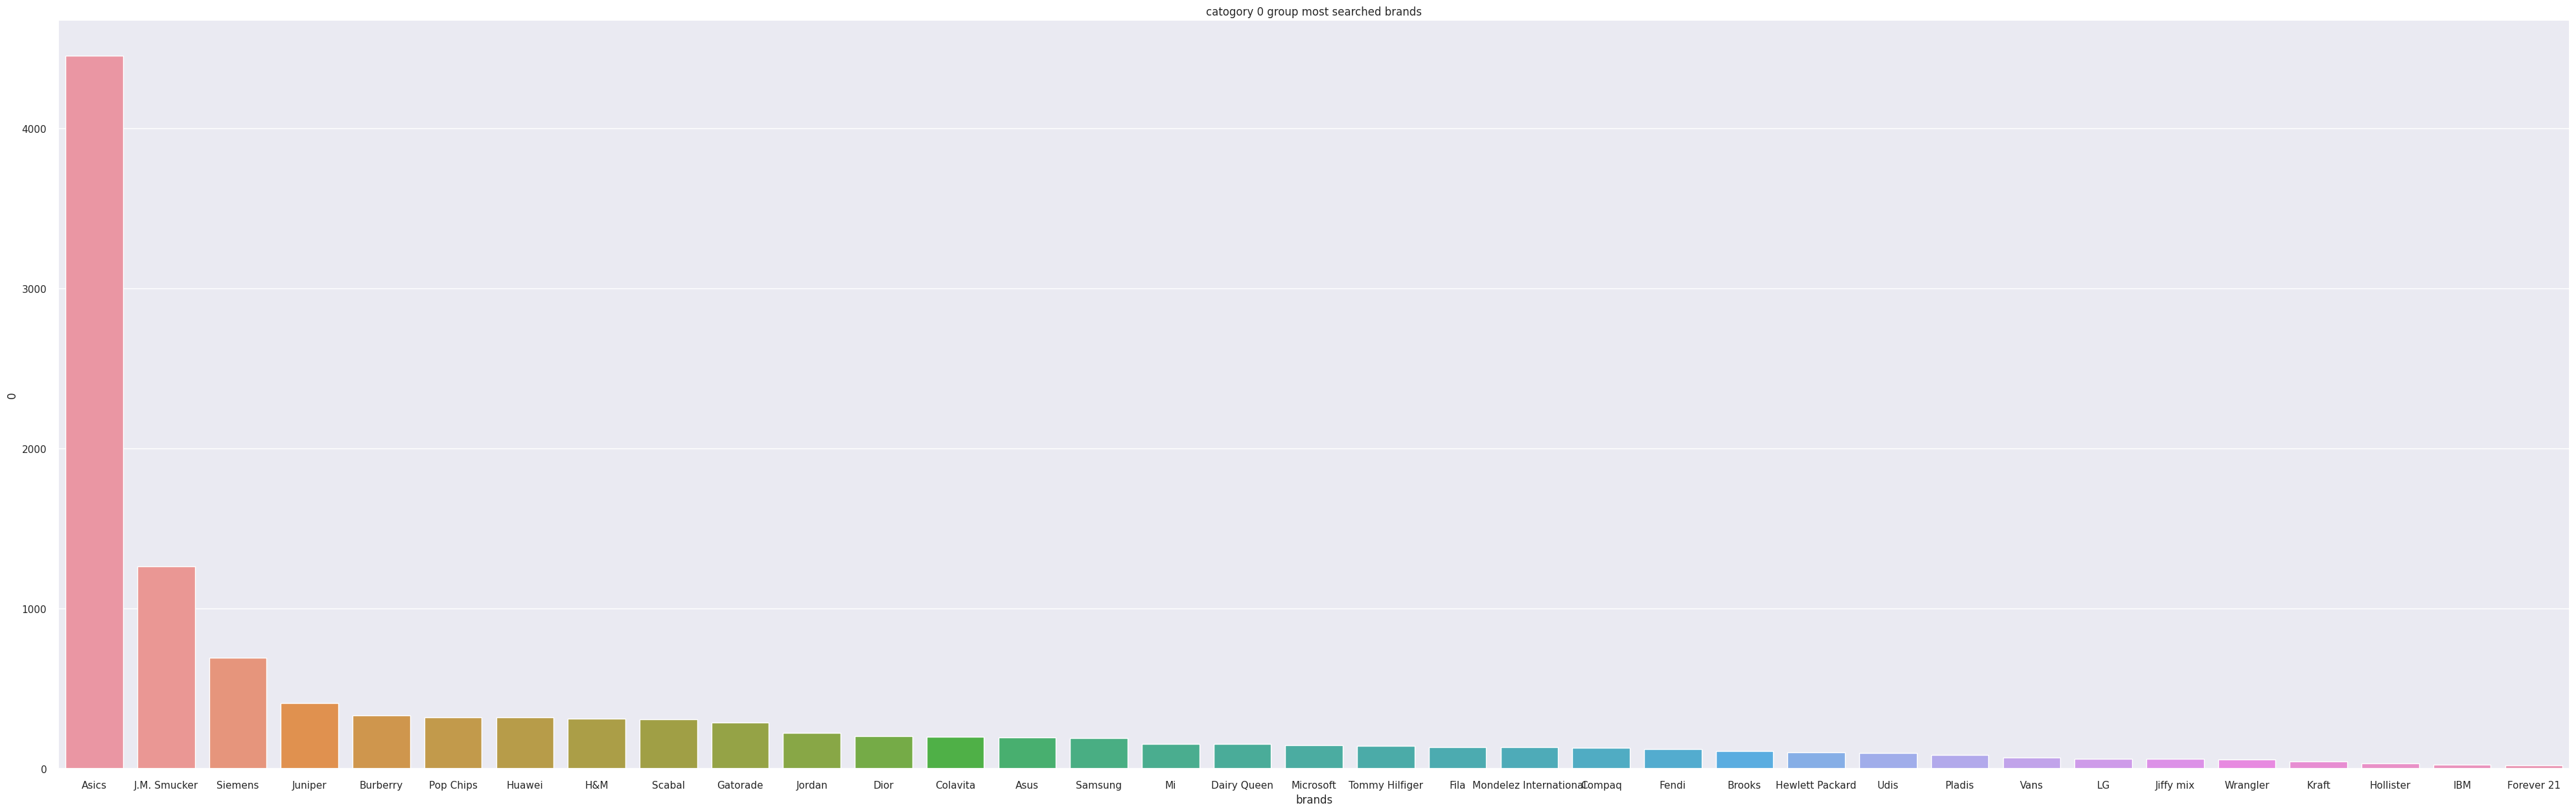

In [366]:
plt.figure(figsize=(50,15))
sns.barplot(data=clc,
            x='brands',
            y=0,
            order=clc.sort_values(0,ascending = False).brands)
plt.title("catogory 0 group most searched brands")
plt.show()

The code generates a bar plot using Seaborn to visualize the most searched brands in category 0. It sets the figure size, specifies the data, and assigns the 'brands' column to the x-axis and the column labeled 0 to the y-axis. The bars are ordered in descending order based on the values in column 0. The plot title is set as "Category 0 Group Most Searched Brands". This plot helps identify the most popular brands in category 0 based on search frequency.

In [367]:
clc.sort_values(0,ascending = False)


brands     0      1     2     3
16                   Asics  4453   3212  1045   297
18            J.M. Smucker  1264  15571  4855   954
17                 Siemens   695    650    69    28
20                 Juniper   410   6949  1417  5349
24                Burberry   332   5940  6105   464
19               Pop Chips   323   4814  1978   322
21                  Huawei   321   5307   827  1285
11                     H&M   315   7175  1953   403
28                  Scabal   311   8946  1412   433
2                 Gatorade   288   5864  1105   313
1                   Jordan   226   6183  1303   311
27                    Dior   205   6089  1548   292
32                Colavita   200   3753  1374   439
4                     Asus   194   3874   567   205
3                  Samsung   191   5303   954   240
25                      Mi   155   2702   614   169
12             Dairy Queen   154   2515  3402   209
33               Microsoft   147   2435   618   291
29          Tommy Hilfiger   145   3190  1210   224
9                     Fila   137   2262   323   106
6   Mondelez International   136   3313   572   172
22                  Compaq   132   2269   271   891
13                   Fendi   123   3174   782   165
10                  Brooks   112   3063   840   189
14         Hewlett Packard   103   3910   652   168
5                     Udis   100   3468   556   182
15                  Pladis    85   1348  1642   108
8                     Vans    72   2578   558   135
26                      LG    64   1774  1121   117
34               Jiffy mix    61   1709   745   126
7                 Wrangler    59   2552   466   131
35                   Kraft    47   1153   847    80
30               Hollister    33   1804   432    61
23                     IBM    27    664    66   202
31              Forever 21    23   1290   358    49

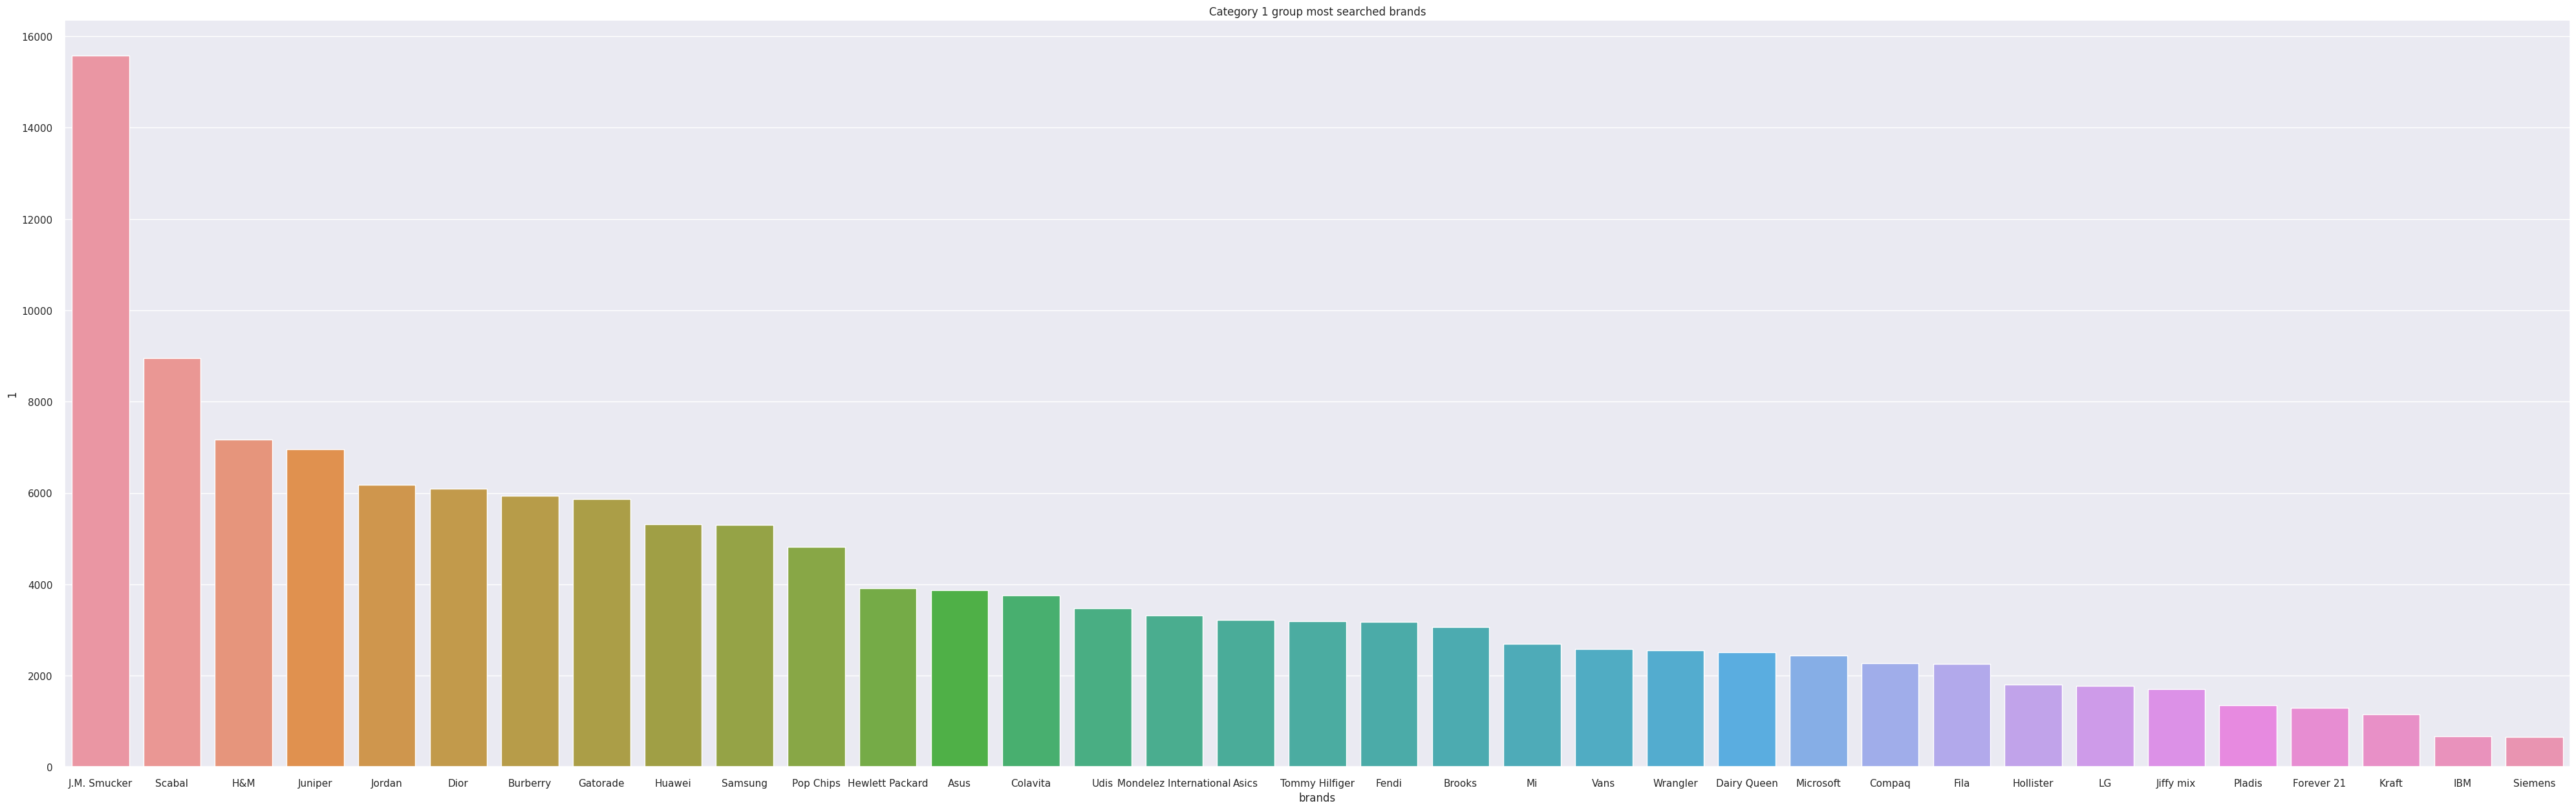

In [368]:
plt.figure(figsize=(50,15))
sns.barplot(data=clc,
            x='brands',
            y=1,
            order=clc.sort_values(1,ascending = False).brands)
plt.title("Category 1 group most searched brands")
plt.show()

In [369]:
clc.sort_values(1,ascending = False)


brands     0      1     2     3
18            J.M. Smucker  1264  15571  4855   954
28                  Scabal   311   8946  1412   433
11                     H&M   315   7175  1953   403
20                 Juniper   410   6949  1417  5349
1                   Jordan   226   6183  1303   311
27                    Dior   205   6089  1548   292
24                Burberry   332   5940  6105   464
2                 Gatorade   288   5864  1105   313
21                  Huawei   321   5307   827  1285
3                  Samsung   191   5303   954   240
19               Pop Chips   323   4814  1978   322
14         Hewlett Packard   103   3910   652   168
4                     Asus   194   3874   567   205
32                Colavita   200   3753  1374   439
5                     Udis   100   3468   556   182
6   Mondelez International   136   3313   572   172
16                   Asics  4453   3212  1045   297
29          Tommy Hilfiger   145   3190  1210   224
13                   Fendi   123   3174   782   165
10                  Brooks   112   3063   840   189
25                      Mi   155   2702   614   169
8                     Vans    72   2578   558   135
7                 Wrangler    59   2552   466   131
12             Dairy Queen   154   2515  3402   209
33               Microsoft   147   2435   618   291
22                  Compaq   132   2269   271   891
9                     Fila   137   2262   323   106
30               Hollister    33   1804   432    61
26                      LG    64   1774  1121   117
34               Jiffy mix    61   1709   745   126
15                  Pladis    85   1348  1642   108
31              Forever 21    23   1290   358    49
35                   Kraft    47   1153   847    80
23                     IBM    27    664    66   202
17                 Siemens   695    650    69    28

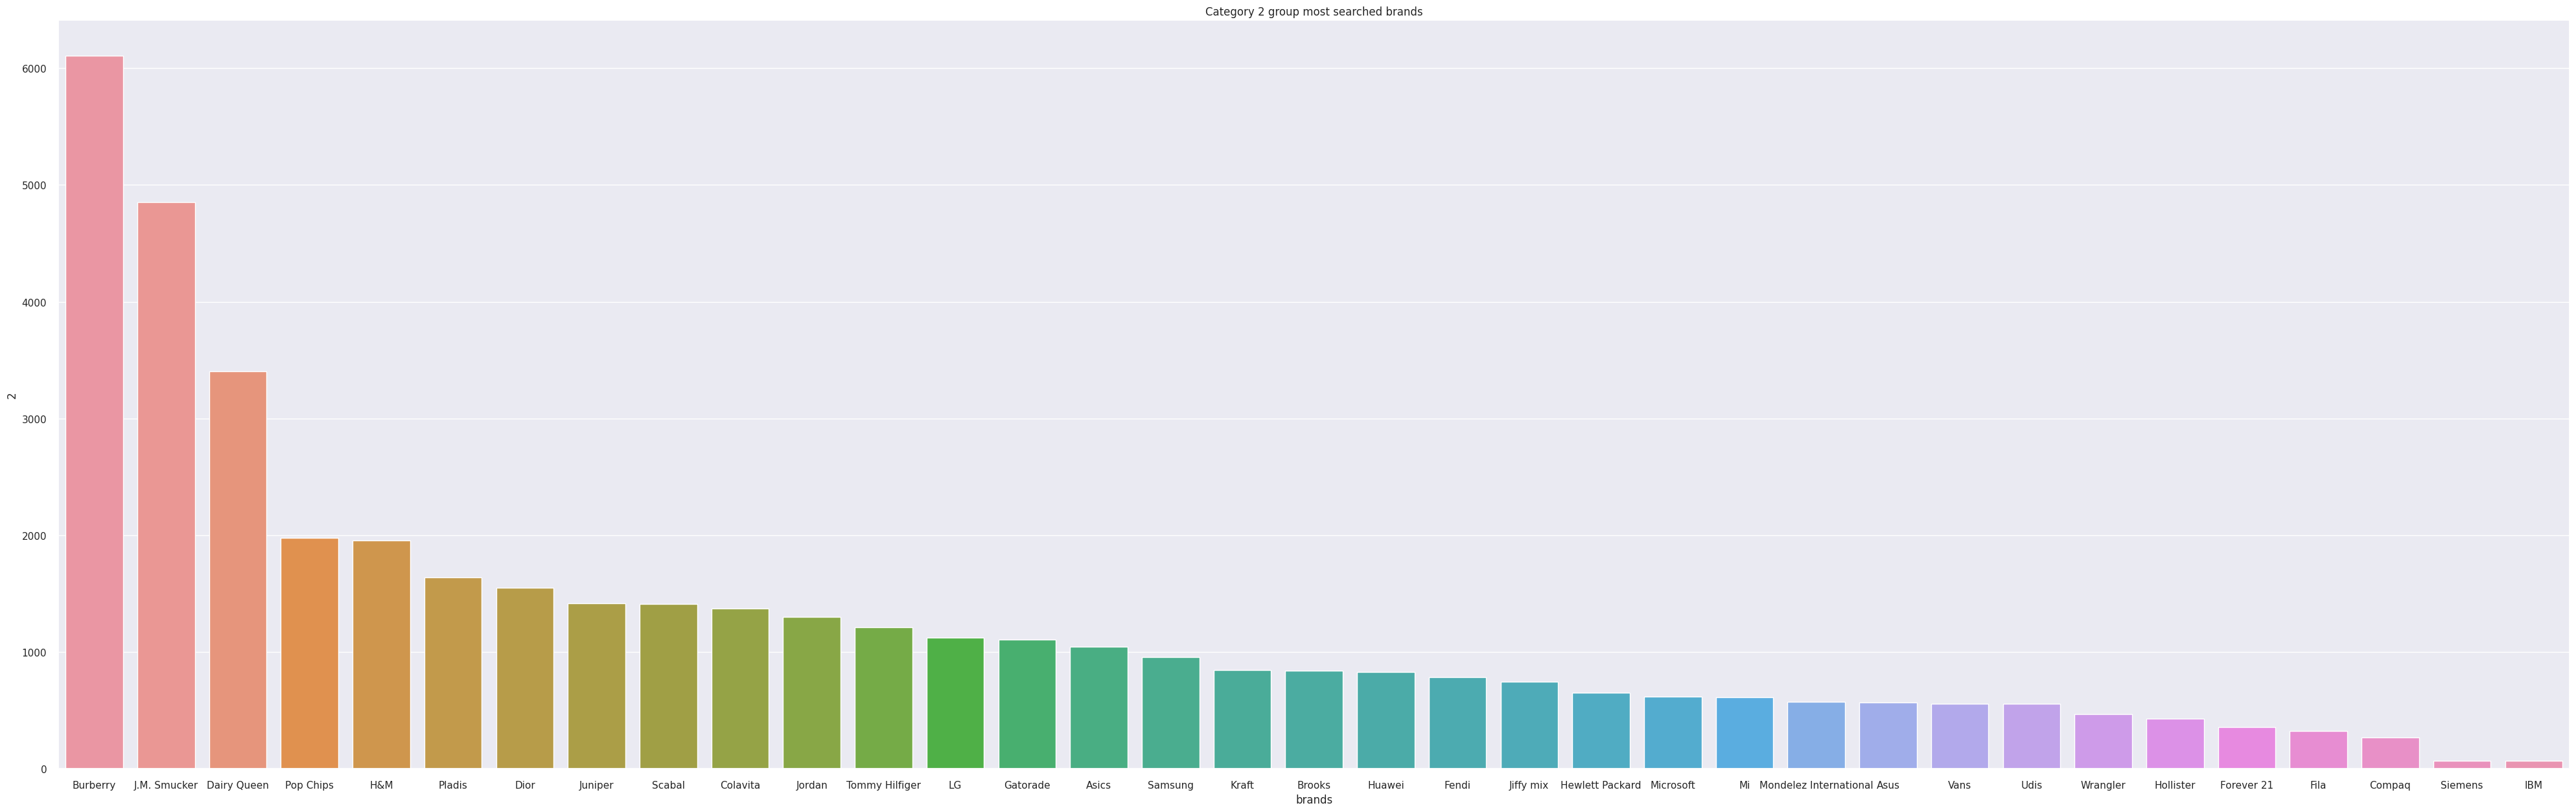

In [370]:
plt.figure(figsize=(50,15))
sns.barplot(data=clc,
            x='brands',
            y=2,
            order=clc.sort_values(2,ascending = False).brands)
plt.title("Category 2 group most searched brands")
plt.show()

In [371]:
clc.sort_values(2,ascending = False)


brands     0      1     2     3
24                Burberry   332   5940  6105   464
18            J.M. Smucker  1264  15571  4855   954
12             Dairy Queen   154   2515  3402   209
19               Pop Chips   323   4814  1978   322
11                     H&M   315   7175  1953   403
15                  Pladis    85   1348  1642   108
27                    Dior   205   6089  1548   292
20                 Juniper   410   6949  1417  5349
28                  Scabal   311   8946  1412   433
32                Colavita   200   3753  1374   439
1                   Jordan   226   6183  1303   311
29          Tommy Hilfiger   145   3190  1210   224
26                      LG    64   1774  1121   117
2                 Gatorade   288   5864  1105   313
16                   Asics  4453   3212  1045   297
3                  Samsung   191   5303   954   240
35                   Kraft    47   1153   847    80
10                  Brooks   112   3063   840   189
21                  Huawei   321   5307   827  1285
13                   Fendi   123   3174   782   165
34               Jiffy mix    61   1709   745   126
14         Hewlett Packard   103   3910   652   168
33               Microsoft   147   2435   618   291
25                      Mi   155   2702   614   169
6   Mondelez International   136   3313   572   172
4                     Asus   194   3874   567   205
8                     Vans    72   2578   558   135
5                     Udis   100   3468   556   182
7                 Wrangler    59   2552   466   131
30               Hollister    33   1804   432    61
31              Forever 21    23   1290   358    49
9                     Fila   137   2262   323   106
22                  Compaq   132   2269   271   891
17                 Siemens   695    650    69    28
23                     IBM    27    664    66   202

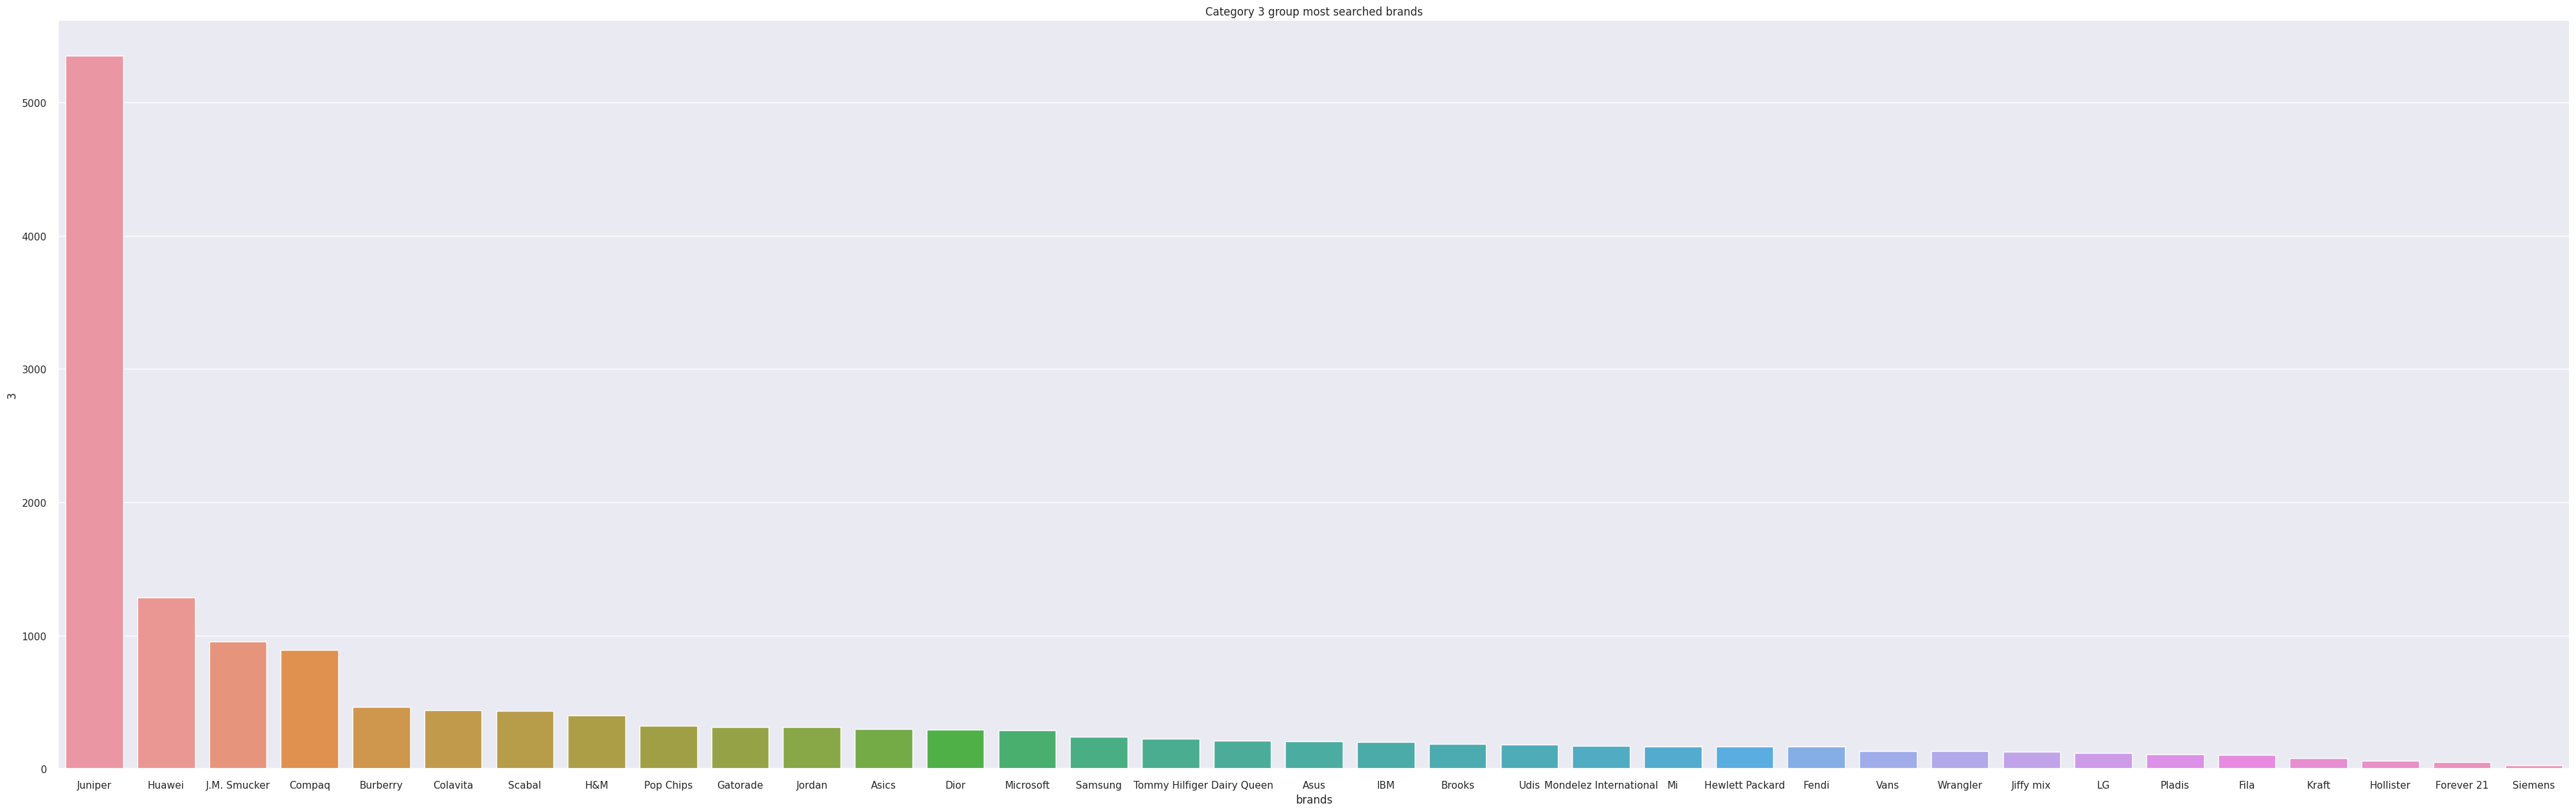

In [372]:
plt.figure(figsize=(50,15))
sns.barplot(data=clc,
            x='brands',
            y=3,
            order=clc.sort_values(3,ascending = False).brands)
plt.title("Category 3 group most searched brands")
plt.show()

In [373]:
clc.sort_values(3,ascending = False)


brands     0      1     2     3
20                 Juniper   410   6949  1417  5349
21                  Huawei   321   5307   827  1285
18            J.M. Smucker  1264  15571  4855   954
22                  Compaq   132   2269   271   891
24                Burberry   332   5940  6105   464
32                Colavita   200   3753  1374   439
28                  Scabal   311   8946  1412   433
11                     H&M   315   7175  1953   403
19               Pop Chips   323   4814  1978   322
2                 Gatorade   288   5864  1105   313
1                   Jordan   226   6183  1303   311
16                   Asics  4453   3212  1045   297
27                    Dior   205   6089  1548   292
33               Microsoft   147   2435   618   291
3                  Samsung   191   5303   954   240
29          Tommy Hilfiger   145   3190  1210   224
12             Dairy Queen   154   2515  3402   209
4                     Asus   194   3874   567   205
23                     IBM    27    664    66   202
10                  Brooks   112   3063   840   189
5                     Udis   100   3468   556   182
6   Mondelez International   136   3313   572   172
25                      Mi   155   2702   614   169
14         Hewlett Packard   103   3910   652   168
13                   Fendi   123   3174   782   165
8                     Vans    72   2578   558   135
7                 Wrangler    59   2552   466   131
34               Jiffy mix    61   1709   745   126
26                      LG    64   1774  1121   117
15                  Pladis    85   1348  1642   108
9                     Fila   137   2262   323   106
35                   Kraft    47   1153   847    80
30               Hollister    33   1804   432    61
31              Forever 21    23   1290   358    49
17                 Siemens   695    650    69    28

In [374]:

df2.groupby(['Cluster_C'])['Cluster_C'].count()

Cluster_C
0      913
1    26014
2     1977
3     1096
Name: Cluster_C, dtype: int64

# CONCLUSION

##  ANALYSIS BASED ON BRANDS

* CLUSTER 0 : 
      Customer Count: 26028

  TOP SEARCHED  BRANDS :   
      J.M. Smucker, Scabal	, H&M	, Juniper, Jordan		


* CLUSTER 1 : 
      Customer Count: 1958
  
  TOP SEARCHED  BRANDS :   
      Burberry, J.M. Smucker, Dairy Queen	, Pop Chips , H&M	


* CLUSTER 2 : 
      Customer Count: 1100

  TOP SEARCHED  BRANDS :   
      Juniper, Huawei, J.M. Smucker, Compaq, Burberry	



* CLUSTER 3 : 
      Customer Count: 914

  TOP SEARCHED  BRANDS :   
  
      Asics, J.M. Smucker,	Siemens,	Juniper,	Burberry